# Obtaining adversarials

## Dataset: GTSRB

## Output:
- Augmented training set: Train and adversary 
    * Train set + adversarial examples obtained from train set
    
        ```python
        x_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/train_and_images_fgsm_5000.npy"
        y_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/train_and_labels_fgsm_5000.npy" 
        ```

- Augmented test set: Test set and adversary
    * Test set + adversarial examples obtained from test set
        
        ```python
        x_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/test_and_images_fgsm.npy"
        y_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/test_and_labels_fgsm.npy"
        ```
        


In [1]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras

import time

from tqdm import tqdm
from keras.models import load_model, Model

from datetime import datetime



In [2]:
def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    # Reduce size
    resized = cv2.resize(img, (img_width, img_height))
    return resized

def load_train():
    X_train = []
    y_train = []
    print('Read train images')
    for j in range(43):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'train', '0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'train', '000' + str(j), '*.jpg')
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j)

    return X_train, y_train

def load_test():
    X_test = []
    y_test = []
    print('Read test images')
    for j in range(43):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'test','0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'test', '000' + str(j), '*.jpg')
        print(path)
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_test.append(img)
            y_test.append(j)

    return X_test, y_test

def load_val():
    X_val = []
    y_val = []
    print('Read test images')
    for j in range(43):
        print('Load folder c{}'.format(j))
        if(j<10):
            path = os.path.join('..', 'val','0000' + str(j), '*.jpg')
        else:
            path = os.path.join('..', 'val', '000' + str(j), '*.jpg')
        print(path)
        files = glob.glob(path)
        print(files)
        for fl in files:
            print(fl)
            img = get_im(fl)
            X_val.append(img)
            y_val.append(j)

    return X_val, y_val

In [3]:
cd "C:\Users\fjdur\Desktop\upc\project_notebooks\github_project\data\final\train"

C:\Users\fjdur\Desktop\upc\project_notebooks\github_project\data\final\train


In [4]:
img_width = 48
img_height = 48
x_train, y_train = load_train()


Read train images
Load folder c0
['..\\train\\00000\\prefix_00000_00000.jpg', '..\\train\\00000\\prefix_00000_00002.jpg', '..\\train\\00000\\prefix_00000_00003.jpg', '..\\train\\00000\\prefix_00000_00004.jpg', '..\\train\\00000\\prefix_00000_00005.jpg', '..\\train\\00000\\prefix_00000_00009.jpg', '..\\train\\00000\\prefix_00000_00010.jpg', '..\\train\\00000\\prefix_00000_00011.jpg', '..\\train\\00000\\prefix_00000_00012.jpg', '..\\train\\00000\\prefix_00000_00013.jpg', '..\\train\\00000\\prefix_00000_00014.jpg', '..\\train\\00000\\prefix_00000_00015.jpg', '..\\train\\00000\\prefix_00000_00016.jpg', '..\\train\\00000\\prefix_00000_00017.jpg', '..\\train\\00000\\prefix_00000_00018.jpg', '..\\train\\00000\\prefix_00000_00019.jpg', '..\\train\\00000\\prefix_00000_00020.jpg', '..\\train\\00000\\prefix_00000_00021.jpg', '..\\train\\00000\\prefix_00000_00024.jpg', '..\\train\\00000\\prefix_00000_00025.jpg', '..\\train\\00000\\prefix_00000_00027.jpg', '..\\train\\00000\\prefix_00000_00029.jpg'

..\train\00001\prefix_00010_00002.jpg
..\train\00001\prefix_00010_00004.jpg
..\train\00001\prefix_00010_00006.jpg
..\train\00001\prefix_00010_00007.jpg
..\train\00001\prefix_00010_00008.jpg
..\train\00001\prefix_00010_00009.jpg
..\train\00001\prefix_00010_00010.jpg
..\train\00001\prefix_00010_00011.jpg
..\train\00001\prefix_00010_00012.jpg
..\train\00001\prefix_00010_00013.jpg
..\train\00001\prefix_00010_00014.jpg
..\train\00001\prefix_00010_00015.jpg
..\train\00001\prefix_00010_00019.jpg
..\train\00001\prefix_00010_00020.jpg
..\train\00001\prefix_00010_00021.jpg
..\train\00001\prefix_00010_00024.jpg
..\train\00001\prefix_00010_00025.jpg
..\train\00001\prefix_00010_00027.jpg
..\train\00001\prefix_00010_00028.jpg
..\train\00001\prefix_00010_00029.jpg
..\train\00001\prefix_00011_00001.jpg
..\train\00001\prefix_00011_00002.jpg
..\train\00001\prefix_00011_00003.jpg
..\train\00001\prefix_00011_00004.jpg
..\train\00001\prefix_00011_00005.jpg
..\train\00001\prefix_00011_00006.jpg
..\train\000

..\train\00001\prefix_00030_00026.jpg
..\train\00001\prefix_00030_00027.jpg
..\train\00001\prefix_00030_00028.jpg
..\train\00001\prefix_00030_00029.jpg
..\train\00001\prefix_00031_00000.jpg
..\train\00001\prefix_00031_00002.jpg
..\train\00001\prefix_00031_00004.jpg
..\train\00001\prefix_00031_00005.jpg
..\train\00001\prefix_00031_00009.jpg
..\train\00001\prefix_00031_00010.jpg
..\train\00001\prefix_00031_00011.jpg
..\train\00001\prefix_00031_00013.jpg
..\train\00001\prefix_00031_00014.jpg
..\train\00001\prefix_00031_00015.jpg
..\train\00001\prefix_00031_00016.jpg
..\train\00001\prefix_00031_00018.jpg
..\train\00001\prefix_00031_00019.jpg
..\train\00001\prefix_00031_00020.jpg
..\train\00001\prefix_00031_00021.jpg
..\train\00001\prefix_00031_00024.jpg
..\train\00001\prefix_00031_00025.jpg
..\train\00001\prefix_00031_00027.jpg
..\train\00001\prefix_00031_00028.jpg
..\train\00001\prefix_00031_00029.jpg
..\train\00001\prefix_00032_00000.jpg
..\train\00001\prefix_00032_00001.jpg
..\train\000

..\train\00001\prefix_00054_00002.jpg
..\train\00001\prefix_00054_00003.jpg
..\train\00001\prefix_00054_00004.jpg
..\train\00001\prefix_00054_00005.jpg
..\train\00001\prefix_00054_00006.jpg
..\train\00001\prefix_00054_00007.jpg
..\train\00001\prefix_00054_00008.jpg
..\train\00001\prefix_00054_00009.jpg
..\train\00001\prefix_00054_00011.jpg
..\train\00001\prefix_00054_00012.jpg
..\train\00001\prefix_00054_00013.jpg
..\train\00001\prefix_00054_00016.jpg
..\train\00001\prefix_00054_00017.jpg
..\train\00001\prefix_00054_00018.jpg
..\train\00001\prefix_00054_00020.jpg
..\train\00001\prefix_00054_00021.jpg
..\train\00001\prefix_00054_00022.jpg
..\train\00001\prefix_00054_00024.jpg
..\train\00001\prefix_00054_00025.jpg
..\train\00001\prefix_00054_00026.jpg
..\train\00001\prefix_00054_00027.jpg
..\train\00001\prefix_00054_00028.jpg
..\train\00001\prefix_00054_00029.jpg
..\train\00001\prefix_00055_00000.jpg
..\train\00001\prefix_00055_00001.jpg
..\train\00001\prefix_00055_00005.jpg
..\train\000

..\train\00002\prefix_00001_00005.jpg
..\train\00002\prefix_00001_00006.jpg
..\train\00002\prefix_00001_00007.jpg
..\train\00002\prefix_00001_00008.jpg
..\train\00002\prefix_00001_00009.jpg
..\train\00002\prefix_00001_00010.jpg
..\train\00002\prefix_00001_00011.jpg
..\train\00002\prefix_00001_00012.jpg
..\train\00002\prefix_00001_00013.jpg
..\train\00002\prefix_00001_00014.jpg
..\train\00002\prefix_00001_00015.jpg
..\train\00002\prefix_00001_00016.jpg
..\train\00002\prefix_00001_00018.jpg
..\train\00002\prefix_00001_00019.jpg
..\train\00002\prefix_00001_00021.jpg
..\train\00002\prefix_00001_00022.jpg
..\train\00002\prefix_00001_00023.jpg
..\train\00002\prefix_00001_00024.jpg
..\train\00002\prefix_00001_00025.jpg
..\train\00002\prefix_00001_00026.jpg
..\train\00002\prefix_00001_00027.jpg
..\train\00002\prefix_00001_00028.jpg
..\train\00002\prefix_00001_00029.jpg
..\train\00002\prefix_00002_00000.jpg
..\train\00002\prefix_00002_00001.jpg
..\train\00002\prefix_00002_00002.jpg
..\train\000

..\train\00002\prefix_00024_00002.jpg
..\train\00002\prefix_00024_00003.jpg
..\train\00002\prefix_00024_00005.jpg
..\train\00002\prefix_00024_00006.jpg
..\train\00002\prefix_00024_00007.jpg
..\train\00002\prefix_00024_00008.jpg
..\train\00002\prefix_00024_00009.jpg
..\train\00002\prefix_00024_00010.jpg
..\train\00002\prefix_00024_00013.jpg
..\train\00002\prefix_00024_00014.jpg
..\train\00002\prefix_00024_00015.jpg
..\train\00002\prefix_00024_00016.jpg
..\train\00002\prefix_00024_00017.jpg
..\train\00002\prefix_00024_00018.jpg
..\train\00002\prefix_00024_00019.jpg
..\train\00002\prefix_00024_00020.jpg
..\train\00002\prefix_00024_00021.jpg
..\train\00002\prefix_00024_00022.jpg
..\train\00002\prefix_00024_00023.jpg
..\train\00002\prefix_00024_00024.jpg
..\train\00002\prefix_00024_00025.jpg
..\train\00002\prefix_00024_00027.jpg
..\train\00002\prefix_00024_00028.jpg
..\train\00002\prefix_00024_00029.jpg
..\train\00002\prefix_00025_00000.jpg
..\train\00002\prefix_00025_00002.jpg
..\train\000

..\train\00002\prefix_00047_00022.jpg
..\train\00002\prefix_00047_00023.jpg
..\train\00002\prefix_00047_00024.jpg
..\train\00002\prefix_00047_00025.jpg
..\train\00002\prefix_00047_00026.jpg
..\train\00002\prefix_00047_00027.jpg
..\train\00002\prefix_00047_00028.jpg
..\train\00002\prefix_00047_00029.jpg
..\train\00002\prefix_00048_00001.jpg
..\train\00002\prefix_00048_00002.jpg
..\train\00002\prefix_00048_00003.jpg
..\train\00002\prefix_00048_00004.jpg
..\train\00002\prefix_00048_00006.jpg
..\train\00002\prefix_00048_00007.jpg
..\train\00002\prefix_00048_00008.jpg
..\train\00002\prefix_00048_00009.jpg
..\train\00002\prefix_00048_00010.jpg
..\train\00002\prefix_00048_00012.jpg
..\train\00002\prefix_00048_00013.jpg
..\train\00002\prefix_00048_00014.jpg
..\train\00002\prefix_00048_00016.jpg
..\train\00002\prefix_00048_00017.jpg
..\train\00002\prefix_00048_00018.jpg
..\train\00002\prefix_00048_00019.jpg
..\train\00002\prefix_00048_00020.jpg
..\train\00002\prefix_00048_00021.jpg
..\train\000

..\train\00002\prefix_00071_00002.jpg
..\train\00002\prefix_00071_00003.jpg
..\train\00002\prefix_00071_00004.jpg
..\train\00002\prefix_00071_00006.jpg
..\train\00002\prefix_00071_00007.jpg
..\train\00002\prefix_00071_00008.jpg
..\train\00002\prefix_00071_00009.jpg
..\train\00002\prefix_00071_00010.jpg
..\train\00002\prefix_00071_00011.jpg
..\train\00002\prefix_00071_00012.jpg
..\train\00002\prefix_00071_00015.jpg
..\train\00002\prefix_00071_00016.jpg
..\train\00002\prefix_00071_00017.jpg
..\train\00002\prefix_00071_00018.jpg
..\train\00002\prefix_00071_00019.jpg
..\train\00002\prefix_00071_00021.jpg
..\train\00002\prefix_00071_00022.jpg
..\train\00002\prefix_00071_00023.jpg
..\train\00002\prefix_00071_00024.jpg
..\train\00002\prefix_00071_00025.jpg
..\train\00002\prefix_00071_00027.jpg
..\train\00002\prefix_00071_00028.jpg
..\train\00002\prefix_00071_00029.jpg
..\train\00002\prefix_00072_00000.jpg
..\train\00002\prefix_00072_00001.jpg
..\train\00002\prefix_00072_00002.jpg
..\train\000

..\train\00003\prefix_00020_00021.jpg
..\train\00003\prefix_00020_00022.jpg
..\train\00003\prefix_00020_00023.jpg
..\train\00003\prefix_00020_00024.jpg
..\train\00003\prefix_00020_00025.jpg
..\train\00003\prefix_00020_00026.jpg
..\train\00003\prefix_00020_00027.jpg
..\train\00003\prefix_00020_00028.jpg
..\train\00003\prefix_00021_00000.jpg
..\train\00003\prefix_00021_00001.jpg
..\train\00003\prefix_00021_00002.jpg
..\train\00003\prefix_00021_00003.jpg
..\train\00003\prefix_00021_00004.jpg
..\train\00003\prefix_00021_00005.jpg
..\train\00003\prefix_00021_00006.jpg
..\train\00003\prefix_00021_00007.jpg
..\train\00003\prefix_00021_00009.jpg
..\train\00003\prefix_00021_00010.jpg
..\train\00003\prefix_00021_00011.jpg
..\train\00003\prefix_00021_00012.jpg
..\train\00003\prefix_00021_00013.jpg
..\train\00003\prefix_00021_00015.jpg
..\train\00003\prefix_00021_00017.jpg
..\train\00003\prefix_00021_00018.jpg
..\train\00003\prefix_00021_00019.jpg
..\train\00003\prefix_00021_00020.jpg
..\train\000

..\train\00003\prefix_00043_00021.jpg
..\train\00003\prefix_00043_00022.jpg
..\train\00003\prefix_00043_00023.jpg
..\train\00003\prefix_00043_00025.jpg
..\train\00003\prefix_00043_00026.jpg
..\train\00003\prefix_00043_00027.jpg
..\train\00003\prefix_00043_00028.jpg
..\train\00003\prefix_00043_00029.jpg
..\train\00003\prefix_00044_00001.jpg
..\train\00003\prefix_00044_00003.jpg
..\train\00003\prefix_00044_00004.jpg
..\train\00003\prefix_00044_00005.jpg
..\train\00003\prefix_00044_00006.jpg
..\train\00003\prefix_00044_00008.jpg
..\train\00003\prefix_00044_00009.jpg
..\train\00003\prefix_00044_00012.jpg
..\train\00003\prefix_00044_00013.jpg
..\train\00003\prefix_00044_00015.jpg
..\train\00003\prefix_00044_00016.jpg
..\train\00003\prefix_00044_00017.jpg
..\train\00003\prefix_00044_00018.jpg
..\train\00003\prefix_00044_00019.jpg
..\train\00003\prefix_00044_00020.jpg
..\train\00003\prefix_00044_00021.jpg
..\train\00003\prefix_00044_00022.jpg
..\train\00003\prefix_00044_00023.jpg
..\train\000

..\train\00004\prefix_00017_00012.jpg
..\train\00004\prefix_00017_00013.jpg
..\train\00004\prefix_00017_00014.jpg
..\train\00004\prefix_00017_00015.jpg
..\train\00004\prefix_00017_00016.jpg
..\train\00004\prefix_00017_00017.jpg
..\train\00004\prefix_00017_00018.jpg
..\train\00004\prefix_00017_00019.jpg
..\train\00004\prefix_00017_00020.jpg
..\train\00004\prefix_00017_00021.jpg
..\train\00004\prefix_00017_00022.jpg
..\train\00004\prefix_00017_00023.jpg
..\train\00004\prefix_00017_00024.jpg
..\train\00004\prefix_00017_00025.jpg
..\train\00004\prefix_00017_00026.jpg
..\train\00004\prefix_00017_00027.jpg
..\train\00004\prefix_00018_00000.jpg
..\train\00004\prefix_00018_00004.jpg
..\train\00004\prefix_00018_00005.jpg
..\train\00004\prefix_00018_00007.jpg
..\train\00004\prefix_00018_00009.jpg
..\train\00004\prefix_00018_00010.jpg
..\train\00004\prefix_00018_00011.jpg
..\train\00004\prefix_00018_00013.jpg
..\train\00004\prefix_00018_00014.jpg
..\train\00004\prefix_00018_00015.jpg
..\train\000

..\train\00004\prefix_00040_00027.jpg
..\train\00004\prefix_00040_00028.jpg
..\train\00004\prefix_00040_00029.jpg
..\train\00004\prefix_00041_00000.jpg
..\train\00004\prefix_00041_00001.jpg
..\train\00004\prefix_00041_00003.jpg
..\train\00004\prefix_00041_00004.jpg
..\train\00004\prefix_00041_00005.jpg
..\train\00004\prefix_00041_00007.jpg
..\train\00004\prefix_00041_00008.jpg
..\train\00004\prefix_00041_00009.jpg
..\train\00004\prefix_00041_00010.jpg
..\train\00004\prefix_00041_00011.jpg
..\train\00004\prefix_00041_00013.jpg
..\train\00004\prefix_00041_00014.jpg
..\train\00004\prefix_00041_00015.jpg
..\train\00004\prefix_00041_00016.jpg
..\train\00004\prefix_00041_00018.jpg
..\train\00004\prefix_00041_00019.jpg
..\train\00004\prefix_00041_00020.jpg
..\train\00004\prefix_00041_00021.jpg
..\train\00004\prefix_00041_00022.jpg
..\train\00004\prefix_00041_00023.jpg
..\train\00004\prefix_00041_00024.jpg
..\train\00004\prefix_00041_00025.jpg
..\train\00004\prefix_00041_00026.jpg
..\train\000

..\train\00004\prefix_00064_00026.jpg
..\train\00004\prefix_00064_00028.jpg
..\train\00004\prefix_00064_00029.jpg
..\train\00004\prefix_00065_00000.jpg
..\train\00004\prefix_00065_00002.jpg
..\train\00004\prefix_00065_00005.jpg
..\train\00004\prefix_00065_00006.jpg
..\train\00004\prefix_00065_00007.jpg
..\train\00004\prefix_00065_00009.jpg
..\train\00004\prefix_00065_00011.jpg
..\train\00004\prefix_00065_00014.jpg
..\train\00004\prefix_00065_00015.jpg
..\train\00004\prefix_00065_00017.jpg
..\train\00004\prefix_00065_00018.jpg
..\train\00004\prefix_00065_00019.jpg
..\train\00004\prefix_00065_00021.jpg
..\train\00004\prefix_00065_00023.jpg
..\train\00004\prefix_00065_00025.jpg
..\train\00004\prefix_00065_00026.jpg
..\train\00004\prefix_00065_00027.jpg
..\train\00004\prefix_00065_00029.jpg
Load folder c5
['..\\train\\00005\\prefix_00000_00000.jpg', '..\\train\\00005\\prefix_00000_00002.jpg', '..\\train\\00005\\prefix_00000_00003.jpg', '..\\train\\00005\\prefix_00000_00005.jpg', '..\\train

..\train\00005\prefix_00000_00003.jpg
..\train\00005\prefix_00000_00005.jpg
..\train\00005\prefix_00000_00007.jpg
..\train\00005\prefix_00000_00008.jpg
..\train\00005\prefix_00000_00009.jpg
..\train\00005\prefix_00000_00010.jpg
..\train\00005\prefix_00000_00011.jpg
..\train\00005\prefix_00000_00012.jpg
..\train\00005\prefix_00000_00015.jpg
..\train\00005\prefix_00000_00016.jpg
..\train\00005\prefix_00000_00017.jpg
..\train\00005\prefix_00000_00018.jpg
..\train\00005\prefix_00000_00019.jpg
..\train\00005\prefix_00000_00020.jpg
..\train\00005\prefix_00000_00021.jpg
..\train\00005\prefix_00000_00022.jpg
..\train\00005\prefix_00000_00024.jpg
..\train\00005\prefix_00000_00025.jpg
..\train\00005\prefix_00000_00026.jpg
..\train\00005\prefix_00000_00027.jpg
..\train\00005\prefix_00000_00028.jpg
..\train\00005\prefix_00000_00029.jpg
..\train\00005\prefix_00001_00001.jpg
..\train\00005\prefix_00001_00002.jpg
..\train\00005\prefix_00001_00003.jpg
..\train\00005\prefix_00001_00004.jpg
..\train\000

..\train\00005\prefix_00023_00012.jpg
..\train\00005\prefix_00023_00013.jpg
..\train\00005\prefix_00023_00015.jpg
..\train\00005\prefix_00023_00016.jpg
..\train\00005\prefix_00023_00017.jpg
..\train\00005\prefix_00023_00018.jpg
..\train\00005\prefix_00023_00019.jpg
..\train\00005\prefix_00023_00020.jpg
..\train\00005\prefix_00023_00021.jpg
..\train\00005\prefix_00023_00022.jpg
..\train\00005\prefix_00023_00023.jpg
..\train\00005\prefix_00023_00024.jpg
..\train\00005\prefix_00023_00025.jpg
..\train\00005\prefix_00023_00026.jpg
..\train\00005\prefix_00023_00027.jpg
..\train\00005\prefix_00023_00028.jpg
..\train\00005\prefix_00023_00029.jpg
..\train\00005\prefix_00024_00000.jpg
..\train\00005\prefix_00024_00001.jpg
..\train\00005\prefix_00024_00002.jpg
..\train\00005\prefix_00024_00003.jpg
..\train\00005\prefix_00024_00004.jpg
..\train\00005\prefix_00024_00006.jpg
..\train\00005\prefix_00024_00008.jpg
..\train\00005\prefix_00024_00009.jpg
..\train\00005\prefix_00024_00010.jpg
..\train\000

..\train\00005\prefix_00045_00028.jpg
..\train\00005\prefix_00046_00000.jpg
..\train\00005\prefix_00046_00001.jpg
..\train\00005\prefix_00046_00002.jpg
..\train\00005\prefix_00046_00003.jpg
..\train\00005\prefix_00046_00004.jpg
..\train\00005\prefix_00046_00006.jpg
..\train\00005\prefix_00046_00007.jpg
..\train\00005\prefix_00046_00008.jpg
..\train\00005\prefix_00046_00009.jpg
..\train\00005\prefix_00046_00010.jpg
..\train\00005\prefix_00046_00011.jpg
..\train\00005\prefix_00046_00012.jpg
..\train\00005\prefix_00046_00014.jpg
..\train\00005\prefix_00046_00015.jpg
..\train\00005\prefix_00046_00017.jpg
..\train\00005\prefix_00046_00018.jpg
..\train\00005\prefix_00046_00020.jpg
..\train\00005\prefix_00046_00021.jpg
..\train\00005\prefix_00046_00023.jpg
..\train\00005\prefix_00046_00024.jpg
..\train\00005\prefix_00046_00025.jpg
..\train\00005\prefix_00046_00026.jpg
..\train\00005\prefix_00046_00027.jpg
..\train\00005\prefix_00046_00028.jpg
..\train\00005\prefix_00047_00000.jpg
..\train\000

..\train\00006\prefix_00009_00001.jpg
..\train\00006\prefix_00009_00002.jpg
..\train\00006\prefix_00009_00003.jpg
..\train\00006\prefix_00009_00004.jpg
..\train\00006\prefix_00009_00006.jpg
..\train\00006\prefix_00009_00007.jpg
..\train\00006\prefix_00009_00008.jpg
..\train\00006\prefix_00009_00009.jpg
..\train\00006\prefix_00009_00011.jpg
..\train\00006\prefix_00009_00012.jpg
..\train\00006\prefix_00009_00014.jpg
..\train\00006\prefix_00009_00015.jpg
..\train\00006\prefix_00009_00016.jpg
..\train\00006\prefix_00009_00017.jpg
..\train\00006\prefix_00009_00019.jpg
..\train\00006\prefix_00009_00020.jpg
..\train\00006\prefix_00009_00021.jpg
..\train\00006\prefix_00009_00022.jpg
..\train\00006\prefix_00009_00023.jpg
..\train\00006\prefix_00009_00024.jpg
..\train\00006\prefix_00009_00025.jpg
..\train\00006\prefix_00009_00027.jpg
..\train\00006\prefix_00009_00028.jpg
..\train\00006\prefix_00009_00029.jpg
..\train\00006\prefix_00010_00000.jpg
..\train\00006\prefix_00010_00001.jpg
..\train\000

..\train\00007\prefix_00019_00025.jpg
..\train\00007\prefix_00019_00026.jpg
..\train\00007\prefix_00019_00027.jpg
..\train\00007\prefix_00019_00028.jpg
..\train\00007\prefix_00019_00029.jpg
..\train\00007\prefix_00020_00002.jpg
..\train\00007\prefix_00020_00003.jpg
..\train\00007\prefix_00020_00004.jpg
..\train\00007\prefix_00020_00005.jpg
..\train\00007\prefix_00020_00006.jpg
..\train\00007\prefix_00020_00008.jpg
..\train\00007\prefix_00020_00009.jpg
..\train\00007\prefix_00020_00010.jpg
..\train\00007\prefix_00020_00012.jpg
..\train\00007\prefix_00020_00013.jpg
..\train\00007\prefix_00020_00014.jpg
..\train\00007\prefix_00020_00015.jpg
..\train\00007\prefix_00020_00016.jpg
..\train\00007\prefix_00020_00017.jpg
..\train\00007\prefix_00020_00018.jpg
..\train\00007\prefix_00020_00019.jpg
..\train\00007\prefix_00020_00020.jpg
..\train\00007\prefix_00020_00021.jpg
..\train\00007\prefix_00020_00022.jpg
..\train\00007\prefix_00020_00023.jpg
..\train\00007\prefix_00020_00024.jpg
..\train\000

..\train\00007\prefix_00044_00012.jpg
..\train\00007\prefix_00044_00013.jpg
..\train\00007\prefix_00044_00014.jpg
..\train\00007\prefix_00044_00015.jpg
..\train\00007\prefix_00044_00016.jpg
..\train\00007\prefix_00044_00017.jpg
..\train\00007\prefix_00044_00018.jpg
..\train\00007\prefix_00044_00020.jpg
..\train\00007\prefix_00044_00021.jpg
..\train\00007\prefix_00044_00022.jpg
..\train\00007\prefix_00044_00024.jpg
..\train\00007\prefix_00044_00025.jpg
..\train\00007\prefix_00044_00026.jpg
..\train\00007\prefix_00044_00027.jpg
..\train\00007\prefix_00044_00028.jpg
..\train\00007\prefix_00045_00000.jpg
..\train\00007\prefix_00045_00002.jpg
..\train\00007\prefix_00045_00003.jpg
..\train\00007\prefix_00045_00005.jpg
..\train\00007\prefix_00045_00006.jpg
..\train\00007\prefix_00045_00007.jpg
..\train\00007\prefix_00045_00008.jpg
..\train\00007\prefix_00045_00009.jpg
..\train\00007\prefix_00045_00011.jpg
..\train\00007\prefix_00045_00012.jpg
..\train\00007\prefix_00045_00014.jpg
..\train\000

..\train\00008\prefix_00019_00025.jpg
..\train\00008\prefix_00019_00026.jpg
..\train\00008\prefix_00019_00027.jpg
..\train\00008\prefix_00019_00028.jpg
..\train\00008\prefix_00019_00029.jpg
..\train\00008\prefix_00020_00002.jpg
..\train\00008\prefix_00020_00003.jpg
..\train\00008\prefix_00020_00004.jpg
..\train\00008\prefix_00020_00005.jpg
..\train\00008\prefix_00020_00006.jpg
..\train\00008\prefix_00020_00008.jpg
..\train\00008\prefix_00020_00009.jpg
..\train\00008\prefix_00020_00010.jpg
..\train\00008\prefix_00020_00012.jpg
..\train\00008\prefix_00020_00013.jpg
..\train\00008\prefix_00020_00014.jpg
..\train\00008\prefix_00020_00015.jpg
..\train\00008\prefix_00020_00016.jpg
..\train\00008\prefix_00020_00017.jpg
..\train\00008\prefix_00020_00018.jpg
..\train\00008\prefix_00020_00019.jpg
..\train\00008\prefix_00020_00020.jpg
..\train\00008\prefix_00020_00021.jpg
..\train\00008\prefix_00020_00022.jpg
..\train\00008\prefix_00020_00023.jpg
..\train\00008\prefix_00020_00024.jpg
..\train\000

..\train\00008\prefix_00044_00009.jpg
..\train\00008\prefix_00044_00012.jpg
..\train\00008\prefix_00044_00013.jpg
..\train\00008\prefix_00044_00015.jpg
..\train\00008\prefix_00044_00016.jpg
..\train\00008\prefix_00044_00017.jpg
..\train\00008\prefix_00044_00018.jpg
..\train\00008\prefix_00044_00019.jpg
..\train\00008\prefix_00044_00020.jpg
..\train\00008\prefix_00044_00021.jpg
..\train\00008\prefix_00044_00022.jpg
..\train\00008\prefix_00044_00023.jpg
..\train\00008\prefix_00044_00024.jpg
..\train\00008\prefix_00044_00025.jpg
..\train\00008\prefix_00044_00026.jpg
..\train\00008\prefix_00044_00027.jpg
..\train\00008\prefix_00044_00028.jpg
..\train\00008\prefix_00044_00029.jpg
..\train\00008\prefix_00045_00000.jpg
..\train\00008\prefix_00045_00001.jpg
..\train\00008\prefix_00045_00003.jpg
..\train\00008\prefix_00045_00004.jpg
..\train\00008\prefix_00045_00005.jpg
..\train\00008\prefix_00045_00006.jpg
..\train\00008\prefix_00045_00007.jpg
..\train\00008\prefix_00045_00009.jpg
..\train\000

..\train\00009\prefix_00021_00000.jpg
..\train\00009\prefix_00021_00001.jpg
..\train\00009\prefix_00021_00002.jpg
..\train\00009\prefix_00021_00003.jpg
..\train\00009\prefix_00021_00004.jpg
..\train\00009\prefix_00021_00005.jpg
..\train\00009\prefix_00021_00006.jpg
..\train\00009\prefix_00021_00007.jpg
..\train\00009\prefix_00021_00009.jpg
..\train\00009\prefix_00021_00010.jpg
..\train\00009\prefix_00021_00011.jpg
..\train\00009\prefix_00021_00012.jpg
..\train\00009\prefix_00021_00013.jpg
..\train\00009\prefix_00021_00015.jpg
..\train\00009\prefix_00021_00017.jpg
..\train\00009\prefix_00021_00018.jpg
..\train\00009\prefix_00021_00019.jpg
..\train\00009\prefix_00021_00020.jpg
..\train\00009\prefix_00021_00021.jpg
..\train\00009\prefix_00021_00022.jpg
..\train\00009\prefix_00021_00023.jpg
..\train\00009\prefix_00021_00024.jpg
..\train\00009\prefix_00021_00025.jpg
..\train\00009\prefix_00021_00026.jpg
..\train\00009\prefix_00021_00027.jpg
..\train\00009\prefix_00021_00028.jpg
..\train\000

..\train\00009\prefix_00042_00017.jpg
..\train\00009\prefix_00042_00018.jpg
..\train\00009\prefix_00042_00019.jpg
..\train\00009\prefix_00042_00021.jpg
..\train\00009\prefix_00042_00022.jpg
..\train\00009\prefix_00042_00023.jpg
..\train\00009\prefix_00042_00024.jpg
..\train\00009\prefix_00042_00026.jpg
..\train\00009\prefix_00042_00028.jpg
..\train\00009\prefix_00042_00029.jpg
..\train\00009\prefix_00043_00000.jpg
..\train\00009\prefix_00043_00001.jpg
..\train\00009\prefix_00043_00002.jpg
..\train\00009\prefix_00043_00003.jpg
..\train\00009\prefix_00043_00004.jpg
..\train\00009\prefix_00043_00005.jpg
..\train\00009\prefix_00043_00006.jpg
..\train\00009\prefix_00043_00007.jpg
..\train\00009\prefix_00043_00008.jpg
..\train\00009\prefix_00043_00009.jpg
..\train\00009\prefix_00043_00012.jpg
..\train\00009\prefix_00043_00013.jpg
..\train\00009\prefix_00043_00014.jpg
..\train\00009\prefix_00043_00015.jpg
..\train\00009\prefix_00043_00016.jpg
..\train\00009\prefix_00043_00017.jpg
..\train\000

..\train\00010\prefix_00017_00025.jpg
..\train\00010\prefix_00017_00026.jpg
..\train\00010\prefix_00017_00027.jpg
..\train\00010\prefix_00018_00000.jpg
..\train\00010\prefix_00018_00004.jpg
..\train\00010\prefix_00018_00005.jpg
..\train\00010\prefix_00018_00007.jpg
..\train\00010\prefix_00018_00009.jpg
..\train\00010\prefix_00018_00010.jpg
..\train\00010\prefix_00018_00011.jpg
..\train\00010\prefix_00018_00013.jpg
..\train\00010\prefix_00018_00014.jpg
..\train\00010\prefix_00018_00015.jpg
..\train\00010\prefix_00018_00016.jpg
..\train\00010\prefix_00018_00017.jpg
..\train\00010\prefix_00018_00018.jpg
..\train\00010\prefix_00018_00019.jpg
..\train\00010\prefix_00018_00020.jpg
..\train\00010\prefix_00018_00021.jpg
..\train\00010\prefix_00018_00022.jpg
..\train\00010\prefix_00018_00024.jpg
..\train\00010\prefix_00018_00025.jpg
..\train\00010\prefix_00018_00026.jpg
..\train\00010\prefix_00018_00027.jpg
..\train\00010\prefix_00018_00028.jpg
..\train\00010\prefix_00019_00001.jpg
..\train\000

..\train\00010\prefix_00042_00023.jpg
..\train\00010\prefix_00042_00024.jpg
..\train\00010\prefix_00042_00026.jpg
..\train\00010\prefix_00042_00028.jpg
..\train\00010\prefix_00042_00029.jpg
..\train\00010\prefix_00043_00000.jpg
..\train\00010\prefix_00043_00001.jpg
..\train\00010\prefix_00043_00003.jpg
..\train\00010\prefix_00043_00004.jpg
..\train\00010\prefix_00043_00005.jpg
..\train\00010\prefix_00043_00006.jpg
..\train\00010\prefix_00043_00007.jpg
..\train\00010\prefix_00043_00008.jpg
..\train\00010\prefix_00043_00009.jpg
..\train\00010\prefix_00043_00012.jpg
..\train\00010\prefix_00043_00013.jpg
..\train\00010\prefix_00043_00014.jpg
..\train\00010\prefix_00043_00015.jpg
..\train\00010\prefix_00043_00016.jpg
..\train\00010\prefix_00043_00017.jpg
..\train\00010\prefix_00043_00021.jpg
..\train\00010\prefix_00043_00023.jpg
..\train\00010\prefix_00043_00024.jpg
..\train\00010\prefix_00043_00025.jpg
..\train\00010\prefix_00043_00027.jpg
..\train\00010\prefix_00043_00028.jpg
..\train\000

..\train\00011\prefix_00001_00008.jpg
..\train\00011\prefix_00001_00010.jpg
..\train\00011\prefix_00001_00011.jpg
..\train\00011\prefix_00001_00012.jpg
..\train\00011\prefix_00001_00014.jpg
..\train\00011\prefix_00001_00015.jpg
..\train\00011\prefix_00001_00016.jpg
..\train\00011\prefix_00001_00017.jpg
..\train\00011\prefix_00001_00018.jpg
..\train\00011\prefix_00001_00019.jpg
..\train\00011\prefix_00001_00020.jpg
..\train\00011\prefix_00001_00022.jpg
..\train\00011\prefix_00001_00023.jpg
..\train\00011\prefix_00001_00025.jpg
..\train\00011\prefix_00001_00026.jpg
..\train\00011\prefix_00001_00027.jpg
..\train\00011\prefix_00001_00028.jpg
..\train\00011\prefix_00001_00029.jpg
..\train\00011\prefix_00002_00000.jpg
..\train\00011\prefix_00002_00002.jpg
..\train\00011\prefix_00002_00003.jpg
..\train\00011\prefix_00002_00006.jpg
..\train\00011\prefix_00002_00007.jpg
..\train\00011\prefix_00002_00008.jpg
..\train\00011\prefix_00002_00009.jpg
..\train\00011\prefix_00002_00010.jpg
..\train\000

..\train\00011\prefix_00022_00009.jpg
..\train\00011\prefix_00022_00010.jpg
..\train\00011\prefix_00022_00011.jpg
..\train\00011\prefix_00022_00012.jpg
..\train\00011\prefix_00022_00013.jpg
..\train\00011\prefix_00022_00014.jpg
..\train\00011\prefix_00022_00015.jpg
..\train\00011\prefix_00022_00017.jpg
..\train\00011\prefix_00022_00018.jpg
..\train\00011\prefix_00022_00019.jpg
..\train\00011\prefix_00022_00020.jpg
..\train\00011\prefix_00022_00021.jpg
..\train\00011\prefix_00022_00022.jpg
..\train\00011\prefix_00022_00023.jpg
..\train\00011\prefix_00022_00024.jpg
..\train\00011\prefix_00022_00025.jpg
..\train\00011\prefix_00022_00026.jpg
..\train\00011\prefix_00022_00027.jpg
..\train\00011\prefix_00022_00028.jpg
..\train\00011\prefix_00023_00000.jpg
..\train\00011\prefix_00023_00001.jpg
..\train\00011\prefix_00023_00003.jpg
..\train\00011\prefix_00023_00005.jpg
..\train\00011\prefix_00023_00007.jpg
..\train\00011\prefix_00023_00008.jpg
..\train\00011\prefix_00023_00009.jpg
..\train\000

..\train\00012\prefix_00000_00002.jpg
..\train\00012\prefix_00000_00003.jpg
..\train\00012\prefix_00000_00005.jpg
..\train\00012\prefix_00000_00007.jpg
..\train\00012\prefix_00000_00008.jpg
..\train\00012\prefix_00000_00009.jpg
..\train\00012\prefix_00000_00010.jpg
..\train\00012\prefix_00000_00011.jpg
..\train\00012\prefix_00000_00012.jpg
..\train\00012\prefix_00000_00013.jpg
..\train\00012\prefix_00000_00015.jpg
..\train\00012\prefix_00000_00016.jpg
..\train\00012\prefix_00000_00017.jpg
..\train\00012\prefix_00000_00018.jpg
..\train\00012\prefix_00000_00019.jpg
..\train\00012\prefix_00000_00020.jpg
..\train\00012\prefix_00000_00021.jpg
..\train\00012\prefix_00000_00022.jpg
..\train\00012\prefix_00000_00024.jpg
..\train\00012\prefix_00000_00025.jpg
..\train\00012\prefix_00000_00027.jpg
..\train\00012\prefix_00000_00028.jpg
..\train\00012\prefix_00000_00029.jpg
..\train\00012\prefix_00001_00001.jpg
..\train\00012\prefix_00001_00002.jpg
..\train\00012\prefix_00001_00003.jpg
..\train\000

..\train\00012\prefix_00023_00015.jpg
..\train\00012\prefix_00023_00016.jpg
..\train\00012\prefix_00023_00017.jpg
..\train\00012\prefix_00023_00018.jpg
..\train\00012\prefix_00023_00019.jpg
..\train\00012\prefix_00023_00020.jpg
..\train\00012\prefix_00023_00021.jpg
..\train\00012\prefix_00023_00022.jpg
..\train\00012\prefix_00023_00023.jpg
..\train\00012\prefix_00023_00024.jpg
..\train\00012\prefix_00023_00025.jpg
..\train\00012\prefix_00023_00026.jpg
..\train\00012\prefix_00023_00027.jpg
..\train\00012\prefix_00023_00028.jpg
..\train\00012\prefix_00023_00029.jpg
..\train\00012\prefix_00024_00000.jpg
..\train\00012\prefix_00024_00001.jpg
..\train\00012\prefix_00024_00002.jpg
..\train\00012\prefix_00024_00003.jpg
..\train\00012\prefix_00024_00004.jpg
..\train\00012\prefix_00024_00006.jpg
..\train\00012\prefix_00024_00008.jpg
..\train\00012\prefix_00024_00009.jpg
..\train\00012\prefix_00024_00010.jpg
..\train\00012\prefix_00024_00011.jpg
..\train\00012\prefix_00024_00012.jpg
..\train\000

..\train\00012\prefix_00045_00014.jpg
..\train\00012\prefix_00045_00015.jpg
..\train\00012\prefix_00045_00016.jpg
..\train\00012\prefix_00045_00017.jpg
..\train\00012\prefix_00045_00018.jpg
..\train\00012\prefix_00045_00019.jpg
..\train\00012\prefix_00045_00023.jpg
..\train\00012\prefix_00045_00024.jpg
..\train\00012\prefix_00045_00026.jpg
..\train\00012\prefix_00045_00027.jpg
..\train\00012\prefix_00046_00000.jpg
..\train\00012\prefix_00046_00001.jpg
..\train\00012\prefix_00046_00003.jpg
..\train\00012\prefix_00046_00004.jpg
..\train\00012\prefix_00046_00005.jpg
..\train\00012\prefix_00046_00006.jpg
..\train\00012\prefix_00046_00007.jpg
..\train\00012\prefix_00046_00008.jpg
..\train\00012\prefix_00046_00009.jpg
..\train\00012\prefix_00046_00010.jpg
..\train\00012\prefix_00046_00011.jpg
..\train\00012\prefix_00046_00012.jpg
..\train\00012\prefix_00046_00014.jpg
..\train\00012\prefix_00046_00015.jpg
..\train\00012\prefix_00046_00017.jpg
..\train\00012\prefix_00046_00018.jpg
..\train\000

..\train\00012\prefix_00068_00001.jpg
..\train\00012\prefix_00068_00002.jpg
..\train\00012\prefix_00068_00003.jpg
..\train\00012\prefix_00068_00004.jpg
..\train\00012\prefix_00068_00005.jpg
..\train\00012\prefix_00068_00006.jpg
..\train\00012\prefix_00068_00008.jpg
..\train\00012\prefix_00068_00009.jpg
..\train\00012\prefix_00068_00010.jpg
..\train\00012\prefix_00068_00011.jpg
..\train\00012\prefix_00068_00013.jpg
..\train\00012\prefix_00068_00014.jpg
..\train\00012\prefix_00068_00015.jpg
..\train\00012\prefix_00068_00016.jpg
..\train\00012\prefix_00068_00018.jpg
..\train\00012\prefix_00068_00020.jpg
..\train\00012\prefix_00068_00023.jpg
..\train\00012\prefix_00068_00025.jpg
..\train\00012\prefix_00068_00027.jpg
..\train\00012\prefix_00069_00001.jpg
..\train\00012\prefix_00069_00002.jpg
..\train\00012\prefix_00069_00003.jpg
..\train\00012\prefix_00069_00006.jpg
..\train\00012\prefix_00069_00007.jpg
..\train\00012\prefix_00069_00008.jpg
..\train\00012\prefix_00069_00009.jpg
..\train\000

..\train\00013\prefix_00019_00009.jpg
..\train\00013\prefix_00019_00010.jpg
..\train\00013\prefix_00019_00011.jpg
..\train\00013\prefix_00019_00012.jpg
..\train\00013\prefix_00019_00016.jpg
..\train\00013\prefix_00019_00017.jpg
..\train\00013\prefix_00019_00018.jpg
..\train\00013\prefix_00019_00019.jpg
..\train\00013\prefix_00019_00020.jpg
..\train\00013\prefix_00019_00021.jpg
..\train\00013\prefix_00019_00022.jpg
..\train\00013\prefix_00019_00023.jpg
..\train\00013\prefix_00019_00024.jpg
..\train\00013\prefix_00019_00025.jpg
..\train\00013\prefix_00019_00026.jpg
..\train\00013\prefix_00019_00027.jpg
..\train\00013\prefix_00019_00028.jpg
..\train\00013\prefix_00019_00029.jpg
..\train\00013\prefix_00020_00000.jpg
..\train\00013\prefix_00020_00001.jpg
..\train\00013\prefix_00020_00002.jpg
..\train\00013\prefix_00020_00003.jpg
..\train\00013\prefix_00020_00004.jpg
..\train\00013\prefix_00020_00005.jpg
..\train\00013\prefix_00020_00006.jpg
..\train\00013\prefix_00020_00008.jpg
..\train\000

..\train\00013\prefix_00041_00021.jpg
..\train\00013\prefix_00041_00023.jpg
..\train\00013\prefix_00041_00024.jpg
..\train\00013\prefix_00041_00025.jpg
..\train\00013\prefix_00041_00026.jpg
..\train\00013\prefix_00041_00027.jpg
..\train\00013\prefix_00041_00028.jpg
..\train\00013\prefix_00041_00029.jpg
..\train\00013\prefix_00042_00000.jpg
..\train\00013\prefix_00042_00001.jpg
..\train\00013\prefix_00042_00002.jpg
..\train\00013\prefix_00042_00003.jpg
..\train\00013\prefix_00042_00004.jpg
..\train\00013\prefix_00042_00005.jpg
..\train\00013\prefix_00042_00006.jpg
..\train\00013\prefix_00042_00007.jpg
..\train\00013\prefix_00042_00009.jpg
..\train\00013\prefix_00042_00010.jpg
..\train\00013\prefix_00042_00011.jpg
..\train\00013\prefix_00042_00013.jpg
..\train\00013\prefix_00042_00014.jpg
..\train\00013\prefix_00042_00015.jpg
..\train\00013\prefix_00042_00016.jpg
..\train\00013\prefix_00042_00017.jpg
..\train\00013\prefix_00042_00018.jpg
..\train\00013\prefix_00042_00019.jpg
..\train\000

..\train\00013\prefix_00063_00008.jpg
..\train\00013\prefix_00063_00009.jpg
..\train\00013\prefix_00063_00011.jpg
..\train\00013\prefix_00063_00013.jpg
..\train\00013\prefix_00063_00014.jpg
..\train\00013\prefix_00063_00015.jpg
..\train\00013\prefix_00063_00016.jpg
..\train\00013\prefix_00063_00017.jpg
..\train\00013\prefix_00063_00018.jpg
..\train\00013\prefix_00063_00019.jpg
..\train\00013\prefix_00063_00020.jpg
..\train\00013\prefix_00063_00021.jpg
..\train\00013\prefix_00063_00022.jpg
..\train\00013\prefix_00063_00023.jpg
..\train\00013\prefix_00063_00024.jpg
..\train\00013\prefix_00063_00028.jpg
..\train\00013\prefix_00063_00029.jpg
..\train\00013\prefix_00064_00000.jpg
..\train\00013\prefix_00064_00001.jpg
..\train\00013\prefix_00064_00003.jpg
..\train\00013\prefix_00064_00004.jpg
..\train\00013\prefix_00064_00005.jpg
..\train\00013\prefix_00064_00006.jpg
..\train\00013\prefix_00064_00007.jpg
..\train\00013\prefix_00064_00008.jpg
..\train\00013\prefix_00064_00009.jpg
..\train\000

..\train\00014\prefix_00012_00017.jpg
..\train\00014\prefix_00012_00018.jpg
..\train\00014\prefix_00012_00020.jpg
..\train\00014\prefix_00012_00021.jpg
..\train\00014\prefix_00012_00022.jpg
..\train\00014\prefix_00012_00023.jpg
..\train\00014\prefix_00012_00024.jpg
..\train\00014\prefix_00012_00025.jpg
..\train\00014\prefix_00012_00026.jpg
..\train\00014\prefix_00013_00001.jpg
..\train\00014\prefix_00013_00002.jpg
..\train\00014\prefix_00013_00003.jpg
..\train\00014\prefix_00013_00005.jpg
..\train\00014\prefix_00013_00006.jpg
..\train\00014\prefix_00013_00007.jpg
..\train\00014\prefix_00013_00008.jpg
..\train\00014\prefix_00013_00009.jpg
..\train\00014\prefix_00013_00010.jpg
..\train\00014\prefix_00013_00011.jpg
..\train\00014\prefix_00013_00012.jpg
..\train\00014\prefix_00013_00013.jpg
..\train\00014\prefix_00013_00014.jpg
..\train\00014\prefix_00013_00016.jpg
..\train\00014\prefix_00013_00017.jpg
..\train\00014\prefix_00013_00019.jpg
..\train\00014\prefix_00013_00021.jpg
..\train\000

..\train\00015\prefix_00008_00014.jpg
..\train\00015\prefix_00008_00015.jpg
..\train\00015\prefix_00008_00016.jpg
..\train\00015\prefix_00008_00018.jpg
..\train\00015\prefix_00008_00019.jpg
..\train\00015\prefix_00008_00020.jpg
..\train\00015\prefix_00008_00021.jpg
..\train\00015\prefix_00008_00022.jpg
..\train\00015\prefix_00008_00023.jpg
..\train\00015\prefix_00008_00024.jpg
..\train\00015\prefix_00008_00025.jpg
..\train\00015\prefix_00008_00026.jpg
..\train\00015\prefix_00008_00027.jpg
..\train\00015\prefix_00008_00028.jpg
..\train\00015\prefix_00009_00002.jpg
..\train\00015\prefix_00009_00005.jpg
..\train\00015\prefix_00009_00007.jpg
..\train\00015\prefix_00009_00008.jpg
..\train\00015\prefix_00009_00009.jpg
..\train\00015\prefix_00009_00010.jpg
..\train\00015\prefix_00009_00012.jpg
..\train\00015\prefix_00009_00013.jpg
..\train\00015\prefix_00009_00015.jpg
..\train\00015\prefix_00009_00016.jpg
..\train\00015\prefix_00009_00017.jpg
..\train\00015\prefix_00009_00018.jpg
..\train\000

..\train\00016\prefix_00010_00012.jpg
..\train\00016\prefix_00010_00013.jpg
..\train\00016\prefix_00010_00014.jpg
..\train\00016\prefix_00010_00015.jpg
..\train\00016\prefix_00010_00017.jpg
..\train\00016\prefix_00010_00018.jpg
..\train\00016\prefix_00010_00019.jpg
..\train\00016\prefix_00010_00020.jpg
..\train\00016\prefix_00010_00022.jpg
..\train\00016\prefix_00010_00023.jpg
..\train\00016\prefix_00010_00024.jpg
..\train\00016\prefix_00010_00026.jpg
..\train\00016\prefix_00010_00028.jpg
..\train\00016\prefix_00010_00029.jpg
..\train\00016\prefix_00011_00000.jpg
..\train\00016\prefix_00011_00003.jpg
..\train\00016\prefix_00011_00004.jpg
..\train\00016\prefix_00011_00005.jpg
..\train\00016\prefix_00011_00006.jpg
..\train\00016\prefix_00011_00007.jpg
..\train\00016\prefix_00011_00009.jpg
..\train\00016\prefix_00011_00010.jpg
..\train\00016\prefix_00011_00011.jpg
..\train\00016\prefix_00011_00012.jpg
..\train\00016\prefix_00011_00013.jpg
..\train\00016\prefix_00011_00014.jpg
..\train\000

..\train\00017\prefix_00020_00019.jpg
..\train\00017\prefix_00020_00020.jpg
..\train\00017\prefix_00020_00022.jpg
..\train\00017\prefix_00020_00024.jpg
..\train\00017\prefix_00020_00025.jpg
..\train\00017\prefix_00020_00026.jpg
..\train\00017\prefix_00020_00027.jpg
..\train\00017\prefix_00020_00028.jpg
..\train\00017\prefix_00020_00029.jpg
..\train\00017\prefix_00021_00000.jpg
..\train\00017\prefix_00021_00001.jpg
..\train\00017\prefix_00021_00002.jpg
..\train\00017\prefix_00021_00003.jpg
..\train\00017\prefix_00021_00004.jpg
..\train\00017\prefix_00021_00005.jpg
..\train\00017\prefix_00021_00006.jpg
..\train\00017\prefix_00021_00007.jpg
..\train\00017\prefix_00021_00008.jpg
..\train\00017\prefix_00021_00009.jpg
..\train\00017\prefix_00021_00011.jpg
..\train\00017\prefix_00021_00013.jpg
..\train\00017\prefix_00021_00015.jpg
..\train\00017\prefix_00021_00017.jpg
..\train\00017\prefix_00021_00018.jpg
..\train\00017\prefix_00021_00019.jpg
..\train\00017\prefix_00021_00020.jpg
..\train\000

..\train\00018\prefix_00005_00029.jpg
..\train\00018\prefix_00006_00000.jpg
..\train\00018\prefix_00006_00001.jpg
..\train\00018\prefix_00006_00002.jpg
..\train\00018\prefix_00006_00003.jpg
..\train\00018\prefix_00006_00004.jpg
..\train\00018\prefix_00006_00005.jpg
..\train\00018\prefix_00006_00008.jpg
..\train\00018\prefix_00006_00010.jpg
..\train\00018\prefix_00006_00012.jpg
..\train\00018\prefix_00006_00013.jpg
..\train\00018\prefix_00006_00015.jpg
..\train\00018\prefix_00006_00017.jpg
..\train\00018\prefix_00006_00019.jpg
..\train\00018\prefix_00006_00020.jpg
..\train\00018\prefix_00006_00021.jpg
..\train\00018\prefix_00006_00022.jpg
..\train\00018\prefix_00006_00023.jpg
..\train\00018\prefix_00006_00024.jpg
..\train\00018\prefix_00006_00025.jpg
..\train\00018\prefix_00006_00027.jpg
..\train\00018\prefix_00006_00028.jpg
..\train\00018\prefix_00007_00000.jpg
..\train\00018\prefix_00007_00001.jpg
..\train\00018\prefix_00007_00002.jpg
..\train\00018\prefix_00007_00003.jpg
..\train\000

..\train\00018\prefix_00025_00012.jpg
..\train\00018\prefix_00025_00013.jpg
..\train\00018\prefix_00025_00016.jpg
..\train\00018\prefix_00025_00017.jpg
..\train\00018\prefix_00025_00018.jpg
..\train\00018\prefix_00025_00019.jpg
..\train\00018\prefix_00025_00020.jpg
..\train\00018\prefix_00025_00021.jpg
..\train\00018\prefix_00025_00022.jpg
..\train\00018\prefix_00025_00023.jpg
..\train\00018\prefix_00025_00024.jpg
..\train\00018\prefix_00025_00026.jpg
..\train\00018\prefix_00025_00029.jpg
..\train\00018\prefix_00026_00000.jpg
..\train\00018\prefix_00026_00002.jpg
..\train\00018\prefix_00026_00003.jpg
..\train\00018\prefix_00026_00004.jpg
..\train\00018\prefix_00026_00005.jpg
..\train\00018\prefix_00026_00006.jpg
..\train\00018\prefix_00026_00007.jpg
..\train\00018\prefix_00026_00009.jpg
..\train\00018\prefix_00026_00010.jpg
..\train\00018\prefix_00026_00011.jpg
..\train\00018\prefix_00026_00012.jpg
..\train\00018\prefix_00026_00013.jpg
..\train\00018\prefix_00026_00014.jpg
..\train\000

..\train\00020\prefix_00000_00009.jpg
..\train\00020\prefix_00000_00010.jpg
..\train\00020\prefix_00000_00011.jpg
..\train\00020\prefix_00000_00014.jpg
..\train\00020\prefix_00000_00017.jpg
..\train\00020\prefix_00000_00018.jpg
..\train\00020\prefix_00000_00019.jpg
..\train\00020\prefix_00000_00020.jpg
..\train\00020\prefix_00000_00021.jpg
..\train\00020\prefix_00000_00024.jpg
..\train\00020\prefix_00000_00025.jpg
..\train\00020\prefix_00000_00026.jpg
..\train\00020\prefix_00000_00027.jpg
..\train\00020\prefix_00000_00028.jpg
..\train\00020\prefix_00000_00029.jpg
..\train\00020\prefix_00001_00000.jpg
..\train\00020\prefix_00001_00001.jpg
..\train\00020\prefix_00001_00002.jpg
..\train\00020\prefix_00001_00003.jpg
..\train\00020\prefix_00001_00004.jpg
..\train\00020\prefix_00001_00006.jpg
..\train\00020\prefix_00001_00007.jpg
..\train\00020\prefix_00001_00008.jpg
..\train\00020\prefix_00001_00009.jpg
..\train\00020\prefix_00001_00011.jpg
..\train\00020\prefix_00001_00012.jpg
..\train\000

..\train\00021\prefix_00008_00015.jpg
..\train\00021\prefix_00008_00016.jpg
..\train\00021\prefix_00008_00017.jpg
..\train\00021\prefix_00008_00019.jpg
..\train\00021\prefix_00008_00020.jpg
..\train\00021\prefix_00008_00021.jpg
..\train\00021\prefix_00008_00022.jpg
..\train\00021\prefix_00008_00023.jpg
..\train\00021\prefix_00008_00024.jpg
..\train\00021\prefix_00008_00025.jpg
..\train\00021\prefix_00008_00026.jpg
..\train\00021\prefix_00008_00027.jpg
..\train\00021\prefix_00008_00028.jpg
..\train\00021\prefix_00008_00029.jpg
..\train\00021\prefix_00009_00000.jpg
..\train\00021\prefix_00009_00001.jpg
..\train\00021\prefix_00009_00002.jpg
..\train\00021\prefix_00009_00003.jpg
..\train\00021\prefix_00009_00005.jpg
..\train\00021\prefix_00009_00006.jpg
..\train\00021\prefix_00009_00007.jpg
..\train\00021\prefix_00009_00008.jpg
..\train\00021\prefix_00009_00010.jpg
..\train\00021\prefix_00009_00012.jpg
..\train\00021\prefix_00009_00013.jpg
..\train\00021\prefix_00009_00014.jpg
..\train\000

..\train\00023\prefix_00002_00010.jpg
..\train\00023\prefix_00002_00012.jpg
..\train\00023\prefix_00002_00013.jpg
..\train\00023\prefix_00002_00014.jpg
..\train\00023\prefix_00002_00015.jpg
..\train\00023\prefix_00002_00016.jpg
..\train\00023\prefix_00002_00017.jpg
..\train\00023\prefix_00002_00018.jpg
..\train\00023\prefix_00002_00020.jpg
..\train\00023\prefix_00002_00022.jpg
..\train\00023\prefix_00002_00024.jpg
..\train\00023\prefix_00002_00025.jpg
..\train\00023\prefix_00002_00026.jpg
..\train\00023\prefix_00002_00027.jpg
..\train\00023\prefix_00002_00028.jpg
..\train\00023\prefix_00002_00029.jpg
..\train\00023\prefix_00003_00000.jpg
..\train\00023\prefix_00003_00001.jpg
..\train\00023\prefix_00003_00002.jpg
..\train\00023\prefix_00003_00003.jpg
..\train\00023\prefix_00003_00004.jpg
..\train\00023\prefix_00003_00005.jpg
..\train\00023\prefix_00003_00006.jpg
..\train\00023\prefix_00003_00007.jpg
..\train\00023\prefix_00003_00009.jpg
..\train\00023\prefix_00003_00010.jpg
..\train\000

..\train\00024\prefix_00007_00007.jpg
..\train\00024\prefix_00007_00008.jpg
..\train\00024\prefix_00007_00009.jpg
..\train\00024\prefix_00007_00010.jpg
..\train\00024\prefix_00007_00011.jpg
..\train\00024\prefix_00007_00013.jpg
..\train\00024\prefix_00007_00014.jpg
..\train\00024\prefix_00007_00015.jpg
..\train\00024\prefix_00007_00016.jpg
..\train\00024\prefix_00007_00017.jpg
..\train\00024\prefix_00007_00018.jpg
..\train\00024\prefix_00007_00019.jpg
..\train\00024\prefix_00007_00020.jpg
..\train\00024\prefix_00007_00021.jpg
..\train\00024\prefix_00007_00022.jpg
..\train\00024\prefix_00007_00023.jpg
..\train\00024\prefix_00007_00024.jpg
..\train\00024\prefix_00007_00025.jpg
..\train\00024\prefix_00007_00026.jpg
..\train\00024\prefix_00007_00027.jpg
..\train\00024\prefix_00007_00028.jpg
..\train\00024\prefix_00008_00000.jpg
..\train\00024\prefix_00008_00001.jpg
..\train\00024\prefix_00008_00002.jpg
..\train\00024\prefix_00008_00003.jpg
..\train\00024\prefix_00008_00005.jpg
..\train\000

..\train\00025\prefix_00017_00022.jpg
..\train\00025\prefix_00017_00023.jpg
..\train\00025\prefix_00017_00024.jpg
..\train\00025\prefix_00017_00025.jpg
..\train\00025\prefix_00017_00026.jpg
..\train\00025\prefix_00017_00027.jpg
..\train\00025\prefix_00018_00000.jpg
..\train\00025\prefix_00018_00004.jpg
..\train\00025\prefix_00018_00005.jpg
..\train\00025\prefix_00018_00007.jpg
..\train\00025\prefix_00018_00009.jpg
..\train\00025\prefix_00018_00010.jpg
..\train\00025\prefix_00018_00011.jpg
..\train\00025\prefix_00018_00013.jpg
..\train\00025\prefix_00018_00014.jpg
..\train\00025\prefix_00018_00015.jpg
..\train\00025\prefix_00018_00016.jpg
..\train\00025\prefix_00018_00017.jpg
..\train\00025\prefix_00018_00018.jpg
..\train\00025\prefix_00018_00019.jpg
..\train\00025\prefix_00018_00020.jpg
..\train\00025\prefix_00018_00021.jpg
..\train\00025\prefix_00018_00022.jpg
..\train\00025\prefix_00018_00024.jpg
..\train\00025\prefix_00018_00025.jpg
..\train\00025\prefix_00018_00026.jpg
..\train\000

..\train\00025\prefix_00036_00025.jpg
..\train\00025\prefix_00036_00026.jpg
..\train\00025\prefix_00036_00028.jpg
..\train\00025\prefix_00036_00029.jpg
..\train\00025\prefix_00037_00001.jpg
..\train\00025\prefix_00037_00002.jpg
..\train\00025\prefix_00037_00003.jpg
..\train\00025\prefix_00037_00004.jpg
..\train\00025\prefix_00037_00005.jpg
..\train\00025\prefix_00037_00007.jpg
..\train\00025\prefix_00037_00008.jpg
..\train\00025\prefix_00037_00009.jpg
..\train\00025\prefix_00037_00010.jpg
..\train\00025\prefix_00037_00011.jpg
..\train\00025\prefix_00037_00012.jpg
..\train\00025\prefix_00037_00013.jpg
..\train\00025\prefix_00037_00014.jpg
..\train\00025\prefix_00037_00016.jpg
..\train\00025\prefix_00037_00018.jpg
..\train\00025\prefix_00037_00019.jpg
..\train\00025\prefix_00037_00021.jpg
..\train\00025\prefix_00037_00022.jpg
..\train\00025\prefix_00037_00025.jpg
..\train\00025\prefix_00037_00026.jpg
..\train\00025\prefix_00037_00027.jpg
..\train\00025\prefix_00037_00029.jpg
..\train\000

..\train\00026\prefix_00008_00006.jpg
..\train\00026\prefix_00008_00007.jpg
..\train\00026\prefix_00008_00008.jpg
..\train\00026\prefix_00008_00009.jpg
..\train\00026\prefix_00008_00011.jpg
..\train\00026\prefix_00008_00013.jpg
..\train\00026\prefix_00008_00014.jpg
..\train\00026\prefix_00008_00015.jpg
..\train\00026\prefix_00008_00016.jpg
..\train\00026\prefix_00008_00017.jpg
..\train\00026\prefix_00008_00018.jpg
..\train\00026\prefix_00008_00019.jpg
..\train\00026\prefix_00008_00021.jpg
..\train\00026\prefix_00008_00022.jpg
..\train\00026\prefix_00008_00023.jpg
..\train\00026\prefix_00008_00024.jpg
..\train\00026\prefix_00008_00025.jpg
..\train\00026\prefix_00008_00026.jpg
..\train\00026\prefix_00008_00027.jpg
..\train\00026\prefix_00008_00028.jpg
..\train\00026\prefix_00008_00029.jpg
..\train\00026\prefix_00009_00002.jpg
..\train\00026\prefix_00009_00007.jpg
..\train\00026\prefix_00009_00008.jpg
..\train\00026\prefix_00009_00009.jpg
..\train\00026\prefix_00009_00010.jpg
..\train\000

..\train\00028\prefix_00001_00012.jpg
..\train\00028\prefix_00001_00013.jpg
..\train\00028\prefix_00001_00014.jpg
..\train\00028\prefix_00001_00015.jpg
..\train\00028\prefix_00001_00016.jpg
..\train\00028\prefix_00001_00018.jpg
..\train\00028\prefix_00001_00020.jpg
..\train\00028\prefix_00001_00023.jpg
..\train\00028\prefix_00001_00024.jpg
..\train\00028\prefix_00001_00025.jpg
..\train\00028\prefix_00001_00026.jpg
..\train\00028\prefix_00001_00027.jpg
..\train\00028\prefix_00001_00028.jpg
..\train\00028\prefix_00001_00029.jpg
..\train\00028\prefix_00002_00000.jpg
..\train\00028\prefix_00002_00001.jpg
..\train\00028\prefix_00002_00002.jpg
..\train\00028\prefix_00002_00004.jpg
..\train\00028\prefix_00002_00005.jpg
..\train\00028\prefix_00002_00006.jpg
..\train\00028\prefix_00002_00007.jpg
..\train\00028\prefix_00002_00008.jpg
..\train\00028\prefix_00002_00009.jpg
..\train\00028\prefix_00002_00010.jpg
..\train\00028\prefix_00002_00011.jpg
..\train\00028\prefix_00002_00012.jpg
..\train\000

..\train\00029\prefix_00004_00002.jpg
..\train\00029\prefix_00004_00003.jpg
..\train\00029\prefix_00004_00004.jpg
..\train\00029\prefix_00004_00006.jpg
..\train\00029\prefix_00004_00007.jpg
..\train\00029\prefix_00004_00008.jpg
..\train\00029\prefix_00004_00009.jpg
..\train\00029\prefix_00004_00010.jpg
..\train\00029\prefix_00004_00011.jpg
..\train\00029\prefix_00004_00012.jpg
..\train\00029\prefix_00004_00013.jpg
..\train\00029\prefix_00004_00014.jpg
..\train\00029\prefix_00004_00015.jpg
..\train\00029\prefix_00004_00016.jpg
..\train\00029\prefix_00004_00018.jpg
..\train\00029\prefix_00004_00021.jpg
..\train\00029\prefix_00004_00022.jpg
..\train\00029\prefix_00004_00024.jpg
..\train\00029\prefix_00004_00025.jpg
..\train\00029\prefix_00004_00026.jpg
..\train\00029\prefix_00004_00027.jpg
..\train\00029\prefix_00004_00028.jpg
..\train\00029\prefix_00004_00029.jpg
..\train\00029\prefix_00005_00001.jpg
..\train\00029\prefix_00005_00002.jpg
..\train\00029\prefix_00005_00003.jpg
..\train\000

..\train\00031\prefix_00000_00010.jpg
..\train\00031\prefix_00000_00012.jpg
..\train\00031\prefix_00000_00013.jpg
..\train\00031\prefix_00000_00014.jpg
..\train\00031\prefix_00000_00015.jpg
..\train\00031\prefix_00000_00016.jpg
..\train\00031\prefix_00000_00017.jpg
..\train\00031\prefix_00000_00018.jpg
..\train\00031\prefix_00000_00019.jpg
..\train\00031\prefix_00000_00020.jpg
..\train\00031\prefix_00000_00021.jpg
..\train\00031\prefix_00000_00022.jpg
..\train\00031\prefix_00000_00023.jpg
..\train\00031\prefix_00000_00024.jpg
..\train\00031\prefix_00000_00026.jpg
..\train\00031\prefix_00000_00028.jpg
..\train\00031\prefix_00000_00029.jpg
..\train\00031\prefix_00001_00001.jpg
..\train\00031\prefix_00001_00003.jpg
..\train\00031\prefix_00001_00004.jpg
..\train\00031\prefix_00001_00005.jpg
..\train\00031\prefix_00001_00006.jpg
..\train\00031\prefix_00001_00007.jpg
..\train\00031\prefix_00001_00008.jpg
..\train\00031\prefix_00001_00009.jpg
..\train\00031\prefix_00001_00010.jpg
..\train\000

..\train\00031\prefix_00023_00017.jpg
..\train\00031\prefix_00023_00018.jpg
..\train\00031\prefix_00023_00019.jpg
..\train\00031\prefix_00023_00020.jpg
..\train\00031\prefix_00023_00021.jpg
..\train\00031\prefix_00023_00022.jpg
..\train\00031\prefix_00023_00023.jpg
..\train\00031\prefix_00023_00025.jpg
..\train\00031\prefix_00023_00026.jpg
..\train\00031\prefix_00023_00029.jpg
..\train\00031\prefix_00024_00001.jpg
..\train\00031\prefix_00024_00002.jpg
..\train\00031\prefix_00024_00003.jpg
..\train\00031\prefix_00024_00004.jpg
..\train\00031\prefix_00024_00006.jpg
..\train\00031\prefix_00024_00007.jpg
..\train\00031\prefix_00024_00008.jpg
..\train\00031\prefix_00024_00009.jpg
..\train\00031\prefix_00024_00010.jpg
..\train\00031\prefix_00024_00011.jpg
..\train\00031\prefix_00024_00012.jpg
..\train\00031\prefix_00024_00014.jpg
..\train\00031\prefix_00024_00015.jpg
..\train\00031\prefix_00024_00016.jpg
..\train\00031\prefix_00024_00017.jpg
..\train\00031\prefix_00024_00018.jpg
..\train\000

..\train\00033\prefix_00012_00012.jpg
..\train\00033\prefix_00012_00014.jpg
..\train\00033\prefix_00012_00015.jpg
..\train\00033\prefix_00012_00016.jpg
..\train\00033\prefix_00012_00017.jpg
..\train\00033\prefix_00012_00018.jpg
..\train\00033\prefix_00012_00020.jpg
..\train\00033\prefix_00012_00021.jpg
..\train\00033\prefix_00012_00022.jpg
..\train\00033\prefix_00012_00023.jpg
..\train\00033\prefix_00012_00024.jpg
..\train\00033\prefix_00012_00025.jpg
..\train\00033\prefix_00012_00026.jpg
..\train\00033\prefix_00013_00001.jpg
..\train\00033\prefix_00013_00002.jpg
..\train\00033\prefix_00013_00003.jpg
..\train\00033\prefix_00013_00005.jpg
..\train\00033\prefix_00013_00006.jpg
..\train\00033\prefix_00013_00007.jpg
..\train\00033\prefix_00013_00008.jpg
..\train\00033\prefix_00013_00009.jpg
..\train\00033\prefix_00013_00010.jpg
..\train\00033\prefix_00013_00011.jpg
..\train\00033\prefix_00013_00012.jpg
..\train\00033\prefix_00013_00013.jpg
..\train\00033\prefix_00013_00014.jpg
..\train\000

..\train\00034\prefix_00013_00007.jpg
..\train\00034\prefix_00013_00008.jpg
..\train\00034\prefix_00013_00010.jpg
..\train\00034\prefix_00013_00012.jpg
..\train\00034\prefix_00013_00013.jpg
..\train\00034\prefix_00013_00015.jpg
..\train\00034\prefix_00013_00016.jpg
..\train\00034\prefix_00013_00019.jpg
..\train\00034\prefix_00013_00021.jpg
..\train\00034\prefix_00013_00022.jpg
..\train\00034\prefix_00013_00023.jpg
..\train\00034\prefix_00013_00024.jpg
..\train\00034\prefix_00013_00025.jpg
..\train\00034\prefix_00013_00027.jpg
..\train\00034\prefix_00013_00028.jpg
..\train\00034\prefix_00013_00029.jpg
Load folder c35
['..\\train\\00035\\prefix_00000_00000.jpg', '..\\train\\00035\\prefix_00000_00002.jpg', '..\\train\\00035\\prefix_00000_00003.jpg', '..\\train\\00035\\prefix_00000_00004.jpg', '..\\train\\00035\\prefix_00000_00005.jpg', '..\\train\\00035\\prefix_00000_00007.jpg', '..\\train\\00035\\prefix_00000_00008.jpg', '..\\train\\00035\\prefix_00000_00009.jpg', '..\\train\\00035\\pref

..\train\00035\prefix_00000_00012.jpg
..\train\00035\prefix_00000_00015.jpg
..\train\00035\prefix_00000_00016.jpg
..\train\00035\prefix_00000_00017.jpg
..\train\00035\prefix_00000_00018.jpg
..\train\00035\prefix_00000_00019.jpg
..\train\00035\prefix_00000_00020.jpg
..\train\00035\prefix_00000_00021.jpg
..\train\00035\prefix_00000_00022.jpg
..\train\00035\prefix_00000_00024.jpg
..\train\00035\prefix_00000_00025.jpg
..\train\00035\prefix_00000_00026.jpg
..\train\00035\prefix_00000_00027.jpg
..\train\00035\prefix_00000_00028.jpg
..\train\00035\prefix_00000_00029.jpg
..\train\00035\prefix_00001_00000.jpg
..\train\00035\prefix_00001_00001.jpg
..\train\00035\prefix_00001_00002.jpg
..\train\00035\prefix_00001_00003.jpg
..\train\00035\prefix_00001_00004.jpg
..\train\00035\prefix_00001_00005.jpg
..\train\00035\prefix_00001_00006.jpg
..\train\00035\prefix_00001_00007.jpg
..\train\00035\prefix_00001_00008.jpg
..\train\00035\prefix_00001_00010.jpg
..\train\00035\prefix_00001_00011.jpg
..\train\000

..\train\00035\prefix_00022_00022.jpg
..\train\00035\prefix_00022_00023.jpg
..\train\00035\prefix_00022_00024.jpg
..\train\00035\prefix_00022_00026.jpg
..\train\00035\prefix_00022_00027.jpg
..\train\00035\prefix_00022_00028.jpg
..\train\00035\prefix_00023_00000.jpg
..\train\00035\prefix_00023_00001.jpg
..\train\00035\prefix_00023_00003.jpg
..\train\00035\prefix_00023_00004.jpg
..\train\00035\prefix_00023_00005.jpg
..\train\00035\prefix_00023_00007.jpg
..\train\00035\prefix_00023_00008.jpg
..\train\00035\prefix_00023_00009.jpg
..\train\00035\prefix_00023_00010.jpg
..\train\00035\prefix_00023_00011.jpg
..\train\00035\prefix_00023_00012.jpg
..\train\00035\prefix_00023_00013.jpg
..\train\00035\prefix_00023_00015.jpg
..\train\00035\prefix_00023_00016.jpg
..\train\00035\prefix_00023_00017.jpg
..\train\00035\prefix_00023_00018.jpg
..\train\00035\prefix_00023_00019.jpg
..\train\00035\prefix_00023_00020.jpg
..\train\00035\prefix_00023_00021.jpg
..\train\00035\prefix_00023_00022.jpg
..\train\000

..\train\00036\prefix_00005_00008.jpg
..\train\00036\prefix_00005_00009.jpg
..\train\00036\prefix_00005_00010.jpg
..\train\00036\prefix_00005_00011.jpg
..\train\00036\prefix_00005_00012.jpg
..\train\00036\prefix_00005_00013.jpg
..\train\00036\prefix_00005_00014.jpg
..\train\00036\prefix_00005_00015.jpg
..\train\00036\prefix_00005_00016.jpg
..\train\00036\prefix_00005_00017.jpg
..\train\00036\prefix_00005_00018.jpg
..\train\00036\prefix_00005_00019.jpg
..\train\00036\prefix_00005_00020.jpg
..\train\00036\prefix_00005_00021.jpg
..\train\00036\prefix_00005_00023.jpg
..\train\00036\prefix_00005_00025.jpg
..\train\00036\prefix_00005_00027.jpg
..\train\00036\prefix_00005_00028.jpg
..\train\00036\prefix_00005_00029.jpg
..\train\00036\prefix_00006_00000.jpg
..\train\00036\prefix_00006_00002.jpg
..\train\00036\prefix_00006_00004.jpg
..\train\00036\prefix_00006_00007.jpg
..\train\00036\prefix_00006_00008.jpg
..\train\00036\prefix_00006_00010.jpg
..\train\00036\prefix_00006_00011.jpg
..\train\000

..\train\00038\prefix_00005_00016.jpg
..\train\00038\prefix_00005_00018.jpg
..\train\00038\prefix_00005_00019.jpg
..\train\00038\prefix_00005_00020.jpg
..\train\00038\prefix_00005_00021.jpg
..\train\00038\prefix_00005_00022.jpg
..\train\00038\prefix_00005_00023.jpg
..\train\00038\prefix_00005_00024.jpg
..\train\00038\prefix_00005_00026.jpg
..\train\00038\prefix_00005_00027.jpg
..\train\00038\prefix_00005_00028.jpg
..\train\00038\prefix_00005_00029.jpg
..\train\00038\prefix_00006_00000.jpg
..\train\00038\prefix_00006_00001.jpg
..\train\00038\prefix_00006_00002.jpg
..\train\00038\prefix_00006_00003.jpg
..\train\00038\prefix_00006_00004.jpg
..\train\00038\prefix_00006_00005.jpg
..\train\00038\prefix_00006_00007.jpg
..\train\00038\prefix_00006_00008.jpg
..\train\00038\prefix_00006_00010.jpg
..\train\00038\prefix_00006_00012.jpg
..\train\00038\prefix_00006_00014.jpg
..\train\00038\prefix_00006_00015.jpg
..\train\00038\prefix_00006_00016.jpg
..\train\00038\prefix_00006_00017.jpg
..\train\000

..\train\00038\prefix_00028_00017.jpg
..\train\00038\prefix_00028_00019.jpg
..\train\00038\prefix_00028_00020.jpg
..\train\00038\prefix_00028_00021.jpg
..\train\00038\prefix_00028_00022.jpg
..\train\00038\prefix_00028_00023.jpg
..\train\00038\prefix_00028_00025.jpg
..\train\00038\prefix_00028_00028.jpg
..\train\00038\prefix_00028_00029.jpg
..\train\00038\prefix_00029_00000.jpg
..\train\00038\prefix_00029_00001.jpg
..\train\00038\prefix_00029_00002.jpg
..\train\00038\prefix_00029_00003.jpg
..\train\00038\prefix_00029_00004.jpg
..\train\00038\prefix_00029_00005.jpg
..\train\00038\prefix_00029_00006.jpg
..\train\00038\prefix_00029_00008.jpg
..\train\00038\prefix_00029_00009.jpg
..\train\00038\prefix_00029_00010.jpg
..\train\00038\prefix_00029_00011.jpg
..\train\00038\prefix_00029_00013.jpg
..\train\00038\prefix_00029_00014.jpg
..\train\00038\prefix_00029_00015.jpg
..\train\00038\prefix_00029_00016.jpg
..\train\00038\prefix_00029_00017.jpg
..\train\00038\prefix_00029_00018.jpg
..\train\000

..\train\00038\prefix_00053_00001.jpg
..\train\00038\prefix_00053_00002.jpg
..\train\00038\prefix_00053_00003.jpg
..\train\00038\prefix_00053_00005.jpg
..\train\00038\prefix_00053_00006.jpg
..\train\00038\prefix_00053_00007.jpg
..\train\00038\prefix_00053_00008.jpg
..\train\00038\prefix_00053_00009.jpg
..\train\00038\prefix_00053_00010.jpg
..\train\00038\prefix_00053_00011.jpg
..\train\00038\prefix_00053_00012.jpg
..\train\00038\prefix_00053_00013.jpg
..\train\00038\prefix_00053_00018.jpg
..\train\00038\prefix_00053_00019.jpg
..\train\00038\prefix_00053_00020.jpg
..\train\00038\prefix_00053_00021.jpg
..\train\00038\prefix_00053_00022.jpg
..\train\00038\prefix_00053_00023.jpg
..\train\00038\prefix_00053_00024.jpg
..\train\00038\prefix_00053_00025.jpg
..\train\00038\prefix_00053_00026.jpg
..\train\00038\prefix_00053_00027.jpg
..\train\00038\prefix_00053_00028.jpg
..\train\00038\prefix_00053_00029.jpg
..\train\00038\prefix_00054_00000.jpg
..\train\00038\prefix_00054_00001.jpg
..\train\000

..\train\00039\prefix_00004_00023.jpg
..\train\00039\prefix_00004_00024.jpg
..\train\00039\prefix_00004_00025.jpg
..\train\00039\prefix_00004_00026.jpg
..\train\00039\prefix_00004_00028.jpg
..\train\00039\prefix_00004_00029.jpg
..\train\00039\prefix_00005_00001.jpg
..\train\00039\prefix_00005_00002.jpg
..\train\00039\prefix_00005_00003.jpg
..\train\00039\prefix_00005_00004.jpg
..\train\00039\prefix_00005_00005.jpg
..\train\00039\prefix_00005_00006.jpg
..\train\00039\prefix_00005_00007.jpg
..\train\00039\prefix_00005_00008.jpg
..\train\00039\prefix_00005_00009.jpg
..\train\00039\prefix_00005_00010.jpg
..\train\00039\prefix_00005_00011.jpg
..\train\00039\prefix_00005_00012.jpg
..\train\00039\prefix_00005_00013.jpg
..\train\00039\prefix_00005_00014.jpg
..\train\00039\prefix_00005_00015.jpg
..\train\00039\prefix_00005_00016.jpg
..\train\00039\prefix_00005_00017.jpg
..\train\00039\prefix_00005_00018.jpg
..\train\00039\prefix_00005_00020.jpg
..\train\00039\prefix_00005_00021.jpg
..\train\000

..\train\00041\prefix_00003_00001.jpg
..\train\00041\prefix_00003_00002.jpg
..\train\00041\prefix_00003_00003.jpg
..\train\00041\prefix_00003_00004.jpg
..\train\00041\prefix_00003_00005.jpg
..\train\00041\prefix_00003_00006.jpg
..\train\00041\prefix_00003_00007.jpg
..\train\00041\prefix_00003_00008.jpg
..\train\00041\prefix_00003_00009.jpg
..\train\00041\prefix_00003_00010.jpg
..\train\00041\prefix_00003_00011.jpg
..\train\00041\prefix_00003_00012.jpg
..\train\00041\prefix_00003_00013.jpg
..\train\00041\prefix_00003_00014.jpg
..\train\00041\prefix_00003_00015.jpg
..\train\00041\prefix_00003_00016.jpg
..\train\00041\prefix_00003_00019.jpg
..\train\00041\prefix_00003_00020.jpg
..\train\00041\prefix_00003_00021.jpg
..\train\00041\prefix_00003_00022.jpg
..\train\00041\prefix_00003_00023.jpg
..\train\00041\prefix_00003_00025.jpg
..\train\00041\prefix_00003_00026.jpg
..\train\00041\prefix_00003_00027.jpg
..\train\00041\prefix_00003_00028.jpg
..\train\00041\prefix_00003_00029.jpg
..\train\000

In [5]:
_,y_train_labels=load_train()

Read train images
Load folder c0
['..\\train\\00000\\prefix_00000_00000.jpg', '..\\train\\00000\\prefix_00000_00002.jpg', '..\\train\\00000\\prefix_00000_00003.jpg', '..\\train\\00000\\prefix_00000_00004.jpg', '..\\train\\00000\\prefix_00000_00005.jpg', '..\\train\\00000\\prefix_00000_00009.jpg', '..\\train\\00000\\prefix_00000_00010.jpg', '..\\train\\00000\\prefix_00000_00011.jpg', '..\\train\\00000\\prefix_00000_00012.jpg', '..\\train\\00000\\prefix_00000_00013.jpg', '..\\train\\00000\\prefix_00000_00014.jpg', '..\\train\\00000\\prefix_00000_00015.jpg', '..\\train\\00000\\prefix_00000_00016.jpg', '..\\train\\00000\\prefix_00000_00017.jpg', '..\\train\\00000\\prefix_00000_00018.jpg', '..\\train\\00000\\prefix_00000_00019.jpg', '..\\train\\00000\\prefix_00000_00020.jpg', '..\\train\\00000\\prefix_00000_00021.jpg', '..\\train\\00000\\prefix_00000_00024.jpg', '..\\train\\00000\\prefix_00000_00025.jpg', '..\\train\\00000\\prefix_00000_00027.jpg', '..\\train\\00000\\prefix_00000_00029.jpg'

..\train\00001\prefix_00005_00028.jpg
..\train\00001\prefix_00005_00029.jpg
..\train\00001\prefix_00006_00000.jpg
..\train\00001\prefix_00006_00001.jpg
..\train\00001\prefix_00006_00002.jpg
..\train\00001\prefix_00006_00003.jpg
..\train\00001\prefix_00006_00004.jpg
..\train\00001\prefix_00006_00005.jpg
..\train\00001\prefix_00006_00006.jpg
..\train\00001\prefix_00006_00008.jpg
..\train\00001\prefix_00006_00010.jpg
..\train\00001\prefix_00006_00014.jpg
..\train\00001\prefix_00006_00015.jpg
..\train\00001\prefix_00006_00016.jpg
..\train\00001\prefix_00006_00017.jpg
..\train\00001\prefix_00006_00019.jpg
..\train\00001\prefix_00006_00022.jpg
..\train\00001\prefix_00006_00023.jpg
..\train\00001\prefix_00006_00025.jpg
..\train\00001\prefix_00006_00026.jpg
..\train\00001\prefix_00006_00027.jpg
..\train\00001\prefix_00006_00028.jpg
..\train\00001\prefix_00006_00029.jpg
..\train\00001\prefix_00007_00001.jpg
..\train\00001\prefix_00007_00003.jpg
..\train\00001\prefix_00007_00004.jpg
..\train\000

..\train\00001\prefix_00031_00002.jpg
..\train\00001\prefix_00031_00004.jpg
..\train\00001\prefix_00031_00005.jpg
..\train\00001\prefix_00031_00009.jpg
..\train\00001\prefix_00031_00010.jpg
..\train\00001\prefix_00031_00011.jpg
..\train\00001\prefix_00031_00013.jpg
..\train\00001\prefix_00031_00014.jpg
..\train\00001\prefix_00031_00015.jpg
..\train\00001\prefix_00031_00016.jpg
..\train\00001\prefix_00031_00018.jpg
..\train\00001\prefix_00031_00019.jpg
..\train\00001\prefix_00031_00020.jpg
..\train\00001\prefix_00031_00021.jpg
..\train\00001\prefix_00031_00024.jpg
..\train\00001\prefix_00031_00025.jpg
..\train\00001\prefix_00031_00027.jpg
..\train\00001\prefix_00031_00028.jpg
..\train\00001\prefix_00031_00029.jpg
..\train\00001\prefix_00032_00000.jpg
..\train\00001\prefix_00032_00001.jpg
..\train\00001\prefix_00032_00002.jpg
..\train\00001\prefix_00032_00003.jpg
..\train\00001\prefix_00032_00004.jpg
..\train\00001\prefix_00032_00005.jpg
..\train\00001\prefix_00032_00006.jpg
..\train\000

..\train\00001\prefix_00050_00028.jpg
..\train\00001\prefix_00051_00000.jpg
..\train\00001\prefix_00051_00002.jpg
..\train\00001\prefix_00051_00003.jpg
..\train\00001\prefix_00051_00005.jpg
..\train\00001\prefix_00051_00006.jpg
..\train\00001\prefix_00051_00007.jpg
..\train\00001\prefix_00051_00008.jpg
..\train\00001\prefix_00051_00010.jpg
..\train\00001\prefix_00051_00011.jpg
..\train\00001\prefix_00051_00012.jpg
..\train\00001\prefix_00051_00014.jpg
..\train\00001\prefix_00051_00015.jpg
..\train\00001\prefix_00051_00016.jpg
..\train\00001\prefix_00051_00017.jpg
..\train\00001\prefix_00051_00018.jpg
..\train\00001\prefix_00051_00019.jpg
..\train\00001\prefix_00051_00021.jpg
..\train\00001\prefix_00051_00022.jpg
..\train\00001\prefix_00051_00023.jpg
..\train\00001\prefix_00051_00025.jpg
..\train\00001\prefix_00051_00027.jpg
..\train\00001\prefix_00051_00028.jpg
..\train\00001\prefix_00051_00029.jpg
..\train\00001\prefix_00052_00000.jpg
..\train\00001\prefix_00052_00001.jpg
..\train\000

..\train\00002\prefix_00001_00023.jpg
..\train\00002\prefix_00001_00024.jpg
..\train\00002\prefix_00001_00025.jpg
..\train\00002\prefix_00001_00026.jpg
..\train\00002\prefix_00001_00027.jpg
..\train\00002\prefix_00001_00028.jpg
..\train\00002\prefix_00001_00029.jpg
..\train\00002\prefix_00002_00000.jpg
..\train\00002\prefix_00002_00001.jpg
..\train\00002\prefix_00002_00002.jpg
..\train\00002\prefix_00002_00003.jpg
..\train\00002\prefix_00002_00004.jpg
..\train\00002\prefix_00002_00005.jpg
..\train\00002\prefix_00002_00006.jpg
..\train\00002\prefix_00002_00007.jpg
..\train\00002\prefix_00002_00008.jpg
..\train\00002\prefix_00002_00009.jpg
..\train\00002\prefix_00002_00010.jpg
..\train\00002\prefix_00002_00011.jpg
..\train\00002\prefix_00002_00012.jpg
..\train\00002\prefix_00002_00014.jpg
..\train\00002\prefix_00002_00015.jpg
..\train\00002\prefix_00002_00016.jpg
..\train\00002\prefix_00002_00017.jpg
..\train\00002\prefix_00002_00018.jpg
..\train\00002\prefix_00002_00020.jpg
..\train\000

..\train\00002\prefix_00022_00027.jpg
..\train\00002\prefix_00022_00028.jpg
..\train\00002\prefix_00022_00029.jpg
..\train\00002\prefix_00023_00000.jpg
..\train\00002\prefix_00023_00001.jpg
..\train\00002\prefix_00023_00002.jpg
..\train\00002\prefix_00023_00003.jpg
..\train\00002\prefix_00023_00004.jpg
..\train\00002\prefix_00023_00005.jpg
..\train\00002\prefix_00023_00006.jpg
..\train\00002\prefix_00023_00007.jpg
..\train\00002\prefix_00023_00008.jpg
..\train\00002\prefix_00023_00009.jpg
..\train\00002\prefix_00023_00011.jpg
..\train\00002\prefix_00023_00013.jpg
..\train\00002\prefix_00023_00014.jpg
..\train\00002\prefix_00023_00015.jpg
..\train\00002\prefix_00023_00016.jpg
..\train\00002\prefix_00023_00017.jpg
..\train\00002\prefix_00023_00018.jpg
..\train\00002\prefix_00023_00019.jpg
..\train\00002\prefix_00023_00020.jpg
..\train\00002\prefix_00023_00021.jpg
..\train\00002\prefix_00023_00022.jpg
..\train\00002\prefix_00023_00023.jpg
..\train\00002\prefix_00023_00025.jpg
..\train\000

..\train\00002\prefix_00052_00010.jpg
..\train\00002\prefix_00052_00011.jpg
..\train\00002\prefix_00052_00012.jpg
..\train\00002\prefix_00052_00013.jpg
..\train\00002\prefix_00052_00014.jpg
..\train\00002\prefix_00052_00015.jpg
..\train\00002\prefix_00052_00017.jpg
..\train\00002\prefix_00052_00018.jpg
..\train\00002\prefix_00052_00020.jpg
..\train\00002\prefix_00052_00021.jpg
..\train\00002\prefix_00052_00022.jpg
..\train\00002\prefix_00052_00023.jpg
..\train\00002\prefix_00052_00024.jpg
..\train\00002\prefix_00052_00025.jpg
..\train\00002\prefix_00052_00026.jpg
..\train\00002\prefix_00052_00027.jpg
..\train\00002\prefix_00052_00028.jpg
..\train\00002\prefix_00052_00029.jpg
..\train\00002\prefix_00053_00000.jpg
..\train\00002\prefix_00053_00001.jpg
..\train\00002\prefix_00053_00002.jpg
..\train\00002\prefix_00053_00003.jpg
..\train\00002\prefix_00053_00004.jpg
..\train\00002\prefix_00053_00005.jpg
..\train\00002\prefix_00053_00006.jpg
..\train\00002\prefix_00053_00008.jpg
..\train\000

..\train\00002\prefix_00073_00013.jpg
..\train\00002\prefix_00073_00014.jpg
..\train\00002\prefix_00073_00015.jpg
..\train\00002\prefix_00073_00016.jpg
..\train\00002\prefix_00073_00018.jpg
..\train\00002\prefix_00073_00020.jpg
..\train\00002\prefix_00073_00021.jpg
..\train\00002\prefix_00073_00022.jpg
..\train\00002\prefix_00073_00024.jpg
..\train\00002\prefix_00073_00025.jpg
..\train\00002\prefix_00073_00026.jpg
..\train\00002\prefix_00073_00028.jpg
..\train\00002\prefix_00074_00000.jpg
..\train\00002\prefix_00074_00001.jpg
..\train\00002\prefix_00074_00002.jpg
..\train\00002\prefix_00074_00005.jpg
..\train\00002\prefix_00074_00006.jpg
..\train\00002\prefix_00074_00007.jpg
..\train\00002\prefix_00074_00008.jpg
..\train\00002\prefix_00074_00009.jpg
..\train\00002\prefix_00074_00011.jpg
..\train\00002\prefix_00074_00015.jpg
..\train\00002\prefix_00074_00016.jpg
..\train\00002\prefix_00074_00017.jpg
..\train\00002\prefix_00074_00018.jpg
..\train\00002\prefix_00074_00019.jpg
..\train\000

..\train\00003\prefix_00000_00029.jpg
..\train\00003\prefix_00001_00001.jpg
..\train\00003\prefix_00001_00002.jpg
..\train\00003\prefix_00001_00003.jpg
..\train\00003\prefix_00001_00004.jpg
..\train\00003\prefix_00001_00005.jpg
..\train\00003\prefix_00001_00006.jpg
..\train\00003\prefix_00001_00007.jpg
..\train\00003\prefix_00001_00008.jpg
..\train\00003\prefix_00001_00010.jpg
..\train\00003\prefix_00001_00011.jpg
..\train\00003\prefix_00001_00012.jpg
..\train\00003\prefix_00001_00014.jpg
..\train\00003\prefix_00001_00015.jpg
..\train\00003\prefix_00001_00016.jpg
..\train\00003\prefix_00001_00017.jpg
..\train\00003\prefix_00001_00018.jpg
..\train\00003\prefix_00001_00019.jpg
..\train\00003\prefix_00001_00020.jpg
..\train\00003\prefix_00001_00022.jpg
..\train\00003\prefix_00001_00023.jpg
..\train\00003\prefix_00001_00025.jpg
..\train\00003\prefix_00001_00026.jpg
..\train\00003\prefix_00001_00027.jpg
..\train\00003\prefix_00001_00028.jpg
..\train\00003\prefix_00001_00029.jpg
..\train\000

..\train\00003\prefix_00023_00013.jpg
..\train\00003\prefix_00023_00015.jpg
..\train\00003\prefix_00023_00016.jpg
..\train\00003\prefix_00023_00017.jpg
..\train\00003\prefix_00023_00018.jpg
..\train\00003\prefix_00023_00019.jpg
..\train\00003\prefix_00023_00020.jpg
..\train\00003\prefix_00023_00021.jpg
..\train\00003\prefix_00023_00022.jpg
..\train\00003\prefix_00023_00023.jpg
..\train\00003\prefix_00023_00024.jpg
..\train\00003\prefix_00023_00025.jpg
..\train\00003\prefix_00023_00026.jpg
..\train\00003\prefix_00023_00027.jpg
..\train\00003\prefix_00023_00028.jpg
..\train\00003\prefix_00023_00029.jpg
..\train\00003\prefix_00024_00000.jpg
..\train\00003\prefix_00024_00001.jpg
..\train\00003\prefix_00024_00002.jpg
..\train\00003\prefix_00024_00003.jpg
..\train\00003\prefix_00024_00004.jpg
..\train\00003\prefix_00024_00006.jpg
..\train\00003\prefix_00024_00008.jpg
..\train\00003\prefix_00024_00009.jpg
..\train\00003\prefix_00024_00010.jpg
..\train\00003\prefix_00024_00011.jpg
..\train\000

..\train\00003\prefix_00038_00018.jpg
..\train\00003\prefix_00038_00019.jpg
..\train\00003\prefix_00038_00020.jpg
..\train\00003\prefix_00038_00022.jpg
..\train\00003\prefix_00038_00023.jpg
..\train\00003\prefix_00038_00024.jpg
..\train\00003\prefix_00038_00025.jpg
..\train\00003\prefix_00038_00026.jpg
..\train\00003\prefix_00038_00027.jpg
..\train\00003\prefix_00038_00028.jpg
..\train\00003\prefix_00039_00000.jpg
..\train\00003\prefix_00039_00001.jpg
..\train\00003\prefix_00039_00002.jpg
..\train\00003\prefix_00039_00003.jpg
..\train\00003\prefix_00039_00004.jpg
..\train\00003\prefix_00039_00005.jpg
..\train\00003\prefix_00039_00006.jpg
..\train\00003\prefix_00039_00007.jpg
..\train\00003\prefix_00039_00008.jpg
..\train\00003\prefix_00039_00009.jpg
..\train\00003\prefix_00039_00011.jpg
..\train\00003\prefix_00039_00013.jpg
..\train\00003\prefix_00039_00014.jpg
..\train\00003\prefix_00039_00015.jpg
..\train\00003\prefix_00039_00017.jpg
..\train\00003\prefix_00039_00018.jpg
..\train\000

..\train\00004\prefix_00014_00024.jpg
..\train\00004\prefix_00014_00026.jpg
..\train\00004\prefix_00014_00028.jpg
..\train\00004\prefix_00015_00000.jpg
..\train\00004\prefix_00015_00002.jpg
..\train\00004\prefix_00015_00003.jpg
..\train\00004\prefix_00015_00004.jpg
..\train\00004\prefix_00015_00005.jpg
..\train\00004\prefix_00015_00006.jpg
..\train\00004\prefix_00015_00008.jpg
..\train\00004\prefix_00015_00009.jpg
..\train\00004\prefix_00015_00011.jpg
..\train\00004\prefix_00015_00012.jpg
..\train\00004\prefix_00015_00013.jpg
..\train\00004\prefix_00015_00014.jpg
..\train\00004\prefix_00015_00015.jpg
..\train\00004\prefix_00015_00017.jpg
..\train\00004\prefix_00015_00020.jpg
..\train\00004\prefix_00015_00022.jpg
..\train\00004\prefix_00015_00023.jpg
..\train\00004\prefix_00015_00024.jpg
..\train\00004\prefix_00015_00025.jpg
..\train\00004\prefix_00015_00027.jpg
..\train\00004\prefix_00015_00028.jpg
..\train\00004\prefix_00015_00029.jpg
..\train\00004\prefix_00016_00000.jpg
..\train\000

..\train\00004\prefix_00037_00002.jpg
..\train\00004\prefix_00037_00003.jpg
..\train\00004\prefix_00037_00004.jpg
..\train\00004\prefix_00037_00005.jpg
..\train\00004\prefix_00037_00007.jpg
..\train\00004\prefix_00037_00008.jpg
..\train\00004\prefix_00037_00009.jpg
..\train\00004\prefix_00037_00010.jpg
..\train\00004\prefix_00037_00011.jpg
..\train\00004\prefix_00037_00012.jpg
..\train\00004\prefix_00037_00013.jpg
..\train\00004\prefix_00037_00014.jpg
..\train\00004\prefix_00037_00016.jpg
..\train\00004\prefix_00037_00018.jpg
..\train\00004\prefix_00037_00019.jpg
..\train\00004\prefix_00037_00021.jpg
..\train\00004\prefix_00037_00022.jpg
..\train\00004\prefix_00037_00025.jpg
..\train\00004\prefix_00037_00026.jpg
..\train\00004\prefix_00037_00027.jpg
..\train\00004\prefix_00037_00029.jpg
..\train\00004\prefix_00038_00001.jpg
..\train\00004\prefix_00038_00002.jpg
..\train\00004\prefix_00038_00003.jpg
..\train\00004\prefix_00038_00004.jpg
..\train\00004\prefix_00038_00005.jpg
..\train\000

..\train\00004\prefix_00062_00023.jpg
..\train\00004\prefix_00062_00024.jpg
..\train\00004\prefix_00062_00025.jpg
..\train\00004\prefix_00062_00026.jpg
..\train\00004\prefix_00062_00027.jpg
..\train\00004\prefix_00062_00029.jpg
..\train\00004\prefix_00063_00000.jpg
..\train\00004\prefix_00063_00001.jpg
..\train\00004\prefix_00063_00002.jpg
..\train\00004\prefix_00063_00003.jpg
..\train\00004\prefix_00063_00004.jpg
..\train\00004\prefix_00063_00005.jpg
..\train\00004\prefix_00063_00006.jpg
..\train\00004\prefix_00063_00007.jpg
..\train\00004\prefix_00063_00008.jpg
..\train\00004\prefix_00063_00009.jpg
..\train\00004\prefix_00063_00010.jpg
..\train\00004\prefix_00063_00011.jpg
..\train\00004\prefix_00063_00012.jpg
..\train\00004\prefix_00063_00013.jpg
..\train\00004\prefix_00063_00014.jpg
..\train\00004\prefix_00063_00015.jpg
..\train\00004\prefix_00063_00016.jpg
..\train\00004\prefix_00063_00017.jpg
..\train\00004\prefix_00063_00018.jpg
..\train\00004\prefix_00063_00019.jpg
..\train\000

..\train\00005\prefix_00013_00028.jpg
..\train\00005\prefix_00013_00029.jpg
..\train\00005\prefix_00014_00000.jpg
..\train\00005\prefix_00014_00001.jpg
..\train\00005\prefix_00014_00002.jpg
..\train\00005\prefix_00014_00003.jpg
..\train\00005\prefix_00014_00004.jpg
..\train\00005\prefix_00014_00005.jpg
..\train\00005\prefix_00014_00006.jpg
..\train\00005\prefix_00014_00007.jpg
..\train\00005\prefix_00014_00008.jpg
..\train\00005\prefix_00014_00010.jpg
..\train\00005\prefix_00014_00011.jpg
..\train\00005\prefix_00014_00014.jpg
..\train\00005\prefix_00014_00016.jpg
..\train\00005\prefix_00014_00019.jpg
..\train\00005\prefix_00014_00021.jpg
..\train\00005\prefix_00014_00022.jpg
..\train\00005\prefix_00014_00023.jpg
..\train\00005\prefix_00014_00024.jpg
..\train\00005\prefix_00014_00026.jpg
..\train\00005\prefix_00014_00028.jpg
..\train\00005\prefix_00015_00000.jpg
..\train\00005\prefix_00015_00002.jpg
..\train\00005\prefix_00015_00003.jpg
..\train\00005\prefix_00015_00004.jpg
..\train\000

..\train\00005\prefix_00047_00001.jpg
..\train\00005\prefix_00047_00003.jpg
..\train\00005\prefix_00047_00004.jpg
..\train\00005\prefix_00047_00005.jpg
..\train\00005\prefix_00047_00006.jpg
..\train\00005\prefix_00047_00007.jpg
..\train\00005\prefix_00047_00008.jpg
..\train\00005\prefix_00047_00009.jpg
..\train\00005\prefix_00047_00010.jpg
..\train\00005\prefix_00047_00011.jpg
..\train\00005\prefix_00047_00012.jpg
..\train\00005\prefix_00047_00013.jpg
..\train\00005\prefix_00047_00014.jpg
..\train\00005\prefix_00047_00015.jpg
..\train\00005\prefix_00047_00017.jpg
..\train\00005\prefix_00047_00018.jpg
..\train\00005\prefix_00047_00020.jpg
..\train\00005\prefix_00047_00021.jpg
..\train\00005\prefix_00047_00022.jpg
..\train\00005\prefix_00047_00023.jpg
..\train\00005\prefix_00047_00024.jpg
..\train\00005\prefix_00047_00025.jpg
..\train\00005\prefix_00047_00028.jpg
..\train\00005\prefix_00047_00029.jpg
..\train\00005\prefix_00048_00000.jpg
..\train\00005\prefix_00048_00001.jpg
..\train\000

..\train\00006\prefix_00008_00008.jpg
..\train\00006\prefix_00008_00009.jpg
..\train\00006\prefix_00008_00010.jpg
..\train\00006\prefix_00008_00011.jpg
..\train\00006\prefix_00008_00012.jpg
..\train\00006\prefix_00008_00013.jpg
..\train\00006\prefix_00008_00014.jpg
..\train\00006\prefix_00008_00015.jpg
..\train\00006\prefix_00008_00016.jpg
..\train\00006\prefix_00008_00017.jpg
..\train\00006\prefix_00008_00018.jpg
..\train\00006\prefix_00008_00020.jpg
..\train\00006\prefix_00008_00021.jpg
..\train\00006\prefix_00008_00022.jpg
..\train\00006\prefix_00008_00023.jpg
..\train\00006\prefix_00008_00024.jpg
..\train\00006\prefix_00008_00025.jpg
..\train\00006\prefix_00008_00026.jpg
..\train\00006\prefix_00008_00027.jpg
..\train\00006\prefix_00008_00028.jpg
..\train\00006\prefix_00008_00029.jpg
..\train\00006\prefix_00009_00000.jpg
..\train\00006\prefix_00009_00001.jpg
..\train\00006\prefix_00009_00002.jpg
..\train\00006\prefix_00009_00003.jpg
..\train\00006\prefix_00009_00004.jpg
..\train\000

..\train\00007\prefix_00024_00014.jpg
..\train\00007\prefix_00024_00016.jpg
..\train\00007\prefix_00024_00017.jpg
..\train\00007\prefix_00024_00018.jpg
..\train\00007\prefix_00024_00019.jpg
..\train\00007\prefix_00024_00022.jpg
..\train\00007\prefix_00024_00024.jpg
..\train\00007\prefix_00024_00025.jpg
..\train\00007\prefix_00024_00026.jpg
..\train\00007\prefix_00024_00028.jpg
..\train\00007\prefix_00024_00029.jpg
..\train\00007\prefix_00025_00000.jpg
..\train\00007\prefix_00025_00001.jpg
..\train\00007\prefix_00025_00002.jpg
..\train\00007\prefix_00025_00003.jpg
..\train\00007\prefix_00025_00004.jpg
..\train\00007\prefix_00025_00005.jpg
..\train\00007\prefix_00025_00006.jpg
..\train\00007\prefix_00025_00007.jpg
..\train\00007\prefix_00025_00009.jpg
..\train\00007\prefix_00025_00010.jpg
..\train\00007\prefix_00025_00011.jpg
..\train\00007\prefix_00025_00012.jpg
..\train\00007\prefix_00025_00013.jpg
..\train\00007\prefix_00025_00016.jpg
..\train\00007\prefix_00025_00017.jpg
..\train\000

..\train\00008\prefix_00000_00002.jpg
..\train\00008\prefix_00000_00003.jpg
..\train\00008\prefix_00000_00005.jpg
..\train\00008\prefix_00000_00007.jpg
..\train\00008\prefix_00000_00008.jpg
..\train\00008\prefix_00000_00009.jpg
..\train\00008\prefix_00000_00010.jpg
..\train\00008\prefix_00000_00011.jpg
..\train\00008\prefix_00000_00012.jpg
..\train\00008\prefix_00000_00015.jpg
..\train\00008\prefix_00000_00016.jpg
..\train\00008\prefix_00000_00017.jpg
..\train\00008\prefix_00000_00018.jpg
..\train\00008\prefix_00000_00019.jpg
..\train\00008\prefix_00000_00020.jpg
..\train\00008\prefix_00000_00021.jpg
..\train\00008\prefix_00000_00022.jpg
..\train\00008\prefix_00000_00024.jpg
..\train\00008\prefix_00000_00025.jpg
..\train\00008\prefix_00000_00026.jpg
..\train\00008\prefix_00000_00027.jpg
..\train\00008\prefix_00000_00028.jpg
..\train\00008\prefix_00000_00029.jpg
..\train\00008\prefix_00001_00001.jpg
..\train\00008\prefix_00001_00002.jpg
..\train\00008\prefix_00001_00003.jpg
..\train\000

..\train\00008\prefix_00027_00002.jpg
..\train\00008\prefix_00027_00003.jpg
..\train\00008\prefix_00027_00004.jpg
..\train\00008\prefix_00027_00005.jpg
..\train\00008\prefix_00027_00006.jpg
..\train\00008\prefix_00027_00008.jpg
..\train\00008\prefix_00027_00009.jpg
..\train\00008\prefix_00027_00010.jpg
..\train\00008\prefix_00027_00012.jpg
..\train\00008\prefix_00027_00013.jpg
..\train\00008\prefix_00027_00015.jpg
..\train\00008\prefix_00027_00016.jpg
..\train\00008\prefix_00027_00017.jpg
..\train\00008\prefix_00027_00018.jpg
..\train\00008\prefix_00027_00019.jpg
..\train\00008\prefix_00027_00020.jpg
..\train\00008\prefix_00027_00021.jpg
..\train\00008\prefix_00027_00024.jpg
..\train\00008\prefix_00027_00025.jpg
..\train\00008\prefix_00027_00026.jpg
..\train\00008\prefix_00027_00027.jpg
..\train\00008\prefix_00027_00028.jpg
..\train\00008\prefix_00027_00029.jpg
..\train\00008\prefix_00028_00000.jpg
..\train\00008\prefix_00028_00002.jpg
..\train\00008\prefix_00028_00003.jpg
..\train\000

..\train\00009\prefix_00001_00029.jpg
..\train\00009\prefix_00002_00000.jpg
..\train\00009\prefix_00002_00002.jpg
..\train\00009\prefix_00002_00003.jpg
..\train\00009\prefix_00002_00006.jpg
..\train\00009\prefix_00002_00007.jpg
..\train\00009\prefix_00002_00008.jpg
..\train\00009\prefix_00002_00009.jpg
..\train\00009\prefix_00002_00010.jpg
..\train\00009\prefix_00002_00011.jpg
..\train\00009\prefix_00002_00012.jpg
..\train\00009\prefix_00002_00013.jpg
..\train\00009\prefix_00002_00014.jpg
..\train\00009\prefix_00002_00015.jpg
..\train\00009\prefix_00002_00016.jpg
..\train\00009\prefix_00002_00017.jpg
..\train\00009\prefix_00002_00018.jpg
..\train\00009\prefix_00002_00019.jpg
..\train\00009\prefix_00002_00020.jpg
..\train\00009\prefix_00002_00021.jpg
..\train\00009\prefix_00002_00022.jpg
..\train\00009\prefix_00002_00023.jpg
..\train\00009\prefix_00002_00024.jpg
..\train\00009\prefix_00002_00025.jpg
..\train\00009\prefix_00002_00026.jpg
..\train\00009\prefix_00002_00027.jpg
..\train\000

..\train\00009\prefix_00032_00005.jpg
..\train\00009\prefix_00032_00006.jpg
..\train\00009\prefix_00032_00007.jpg
..\train\00009\prefix_00032_00009.jpg
..\train\00009\prefix_00032_00010.jpg
..\train\00009\prefix_00032_00011.jpg
..\train\00009\prefix_00032_00012.jpg
..\train\00009\prefix_00032_00014.jpg
..\train\00009\prefix_00032_00015.jpg
..\train\00009\prefix_00032_00016.jpg
..\train\00009\prefix_00032_00017.jpg
..\train\00009\prefix_00032_00018.jpg
..\train\00009\prefix_00032_00019.jpg
..\train\00009\prefix_00032_00020.jpg
..\train\00009\prefix_00032_00021.jpg
..\train\00009\prefix_00032_00022.jpg
..\train\00009\prefix_00032_00023.jpg
..\train\00009\prefix_00032_00024.jpg
..\train\00009\prefix_00032_00026.jpg
..\train\00009\prefix_00032_00027.jpg
..\train\00009\prefix_00032_00028.jpg
..\train\00009\prefix_00032_00029.jpg
..\train\00009\prefix_00033_00000.jpg
..\train\00009\prefix_00033_00001.jpg
..\train\00009\prefix_00033_00002.jpg
..\train\00009\prefix_00033_00003.jpg
..\train\000

..\train\00010\prefix_00002_00010.jpg
..\train\00010\prefix_00002_00011.jpg
..\train\00010\prefix_00002_00012.jpg
..\train\00010\prefix_00002_00013.jpg
..\train\00010\prefix_00002_00014.jpg
..\train\00010\prefix_00002_00015.jpg
..\train\00010\prefix_00002_00016.jpg
..\train\00010\prefix_00002_00017.jpg
..\train\00010\prefix_00002_00018.jpg
..\train\00010\prefix_00002_00019.jpg
..\train\00010\prefix_00002_00020.jpg
..\train\00010\prefix_00002_00021.jpg
..\train\00010\prefix_00002_00022.jpg
..\train\00010\prefix_00002_00023.jpg
..\train\00010\prefix_00002_00024.jpg
..\train\00010\prefix_00002_00025.jpg
..\train\00010\prefix_00002_00026.jpg
..\train\00010\prefix_00002_00027.jpg
..\train\00010\prefix_00002_00029.jpg
..\train\00010\prefix_00003_00000.jpg
..\train\00010\prefix_00003_00001.jpg
..\train\00010\prefix_00003_00002.jpg
..\train\00010\prefix_00003_00004.jpg
..\train\00010\prefix_00003_00005.jpg
..\train\00010\prefix_00003_00007.jpg
..\train\00010\prefix_00003_00008.jpg
..\train\000

..\train\00010\prefix_00035_00014.jpg
..\train\00010\prefix_00035_00015.jpg
..\train\00010\prefix_00035_00016.jpg
..\train\00010\prefix_00035_00017.jpg
..\train\00010\prefix_00035_00018.jpg
..\train\00010\prefix_00035_00019.jpg
..\train\00010\prefix_00035_00020.jpg
..\train\00010\prefix_00035_00021.jpg
..\train\00010\prefix_00035_00022.jpg
..\train\00010\prefix_00035_00023.jpg
..\train\00010\prefix_00035_00024.jpg
..\train\00010\prefix_00035_00025.jpg
..\train\00010\prefix_00035_00026.jpg
..\train\00010\prefix_00035_00027.jpg
..\train\00010\prefix_00035_00028.jpg
..\train\00010\prefix_00035_00029.jpg
..\train\00010\prefix_00036_00001.jpg
..\train\00010\prefix_00036_00002.jpg
..\train\00010\prefix_00036_00004.jpg
..\train\00010\prefix_00036_00005.jpg
..\train\00010\prefix_00036_00008.jpg
..\train\00010\prefix_00036_00009.jpg
..\train\00010\prefix_00036_00011.jpg
..\train\00010\prefix_00036_00012.jpg
..\train\00010\prefix_00036_00014.jpg
..\train\00010\prefix_00036_00015.jpg
..\train\000

..\train\00010\prefix_00058_00029.jpg
..\train\00010\prefix_00059_00000.jpg
..\train\00010\prefix_00059_00001.jpg
..\train\00010\prefix_00059_00002.jpg
..\train\00010\prefix_00059_00003.jpg
..\train\00010\prefix_00059_00005.jpg
..\train\00010\prefix_00059_00006.jpg
..\train\00010\prefix_00059_00007.jpg
..\train\00010\prefix_00059_00008.jpg
..\train\00010\prefix_00059_00009.jpg
..\train\00010\prefix_00059_00011.jpg
..\train\00010\prefix_00059_00013.jpg
..\train\00010\prefix_00059_00014.jpg
..\train\00010\prefix_00059_00015.jpg
..\train\00010\prefix_00059_00016.jpg
..\train\00010\prefix_00059_00017.jpg
..\train\00010\prefix_00059_00018.jpg
..\train\00010\prefix_00059_00019.jpg
..\train\00010\prefix_00059_00020.jpg
..\train\00010\prefix_00059_00021.jpg
..\train\00010\prefix_00059_00022.jpg
..\train\00010\prefix_00059_00025.jpg
..\train\00010\prefix_00059_00027.jpg
..\train\00010\prefix_00059_00028.jpg
..\train\00010\prefix_00059_00029.jpg
..\train\00010\prefix_00060_00000.jpg
..\train\000

..\train\00011\prefix_00019_00012.jpg
..\train\00011\prefix_00019_00013.jpg
..\train\00011\prefix_00019_00015.jpg
..\train\00011\prefix_00019_00016.jpg
..\train\00011\prefix_00019_00017.jpg
..\train\00011\prefix_00019_00018.jpg
..\train\00011\prefix_00019_00019.jpg
..\train\00011\prefix_00019_00020.jpg
..\train\00011\prefix_00019_00021.jpg
..\train\00011\prefix_00019_00023.jpg
..\train\00011\prefix_00019_00024.jpg
..\train\00011\prefix_00019_00025.jpg
..\train\00011\prefix_00019_00026.jpg
..\train\00011\prefix_00019_00027.jpg
..\train\00011\prefix_00019_00028.jpg
..\train\00011\prefix_00019_00029.jpg
..\train\00011\prefix_00020_00002.jpg
..\train\00011\prefix_00020_00003.jpg
..\train\00011\prefix_00020_00004.jpg
..\train\00011\prefix_00020_00005.jpg
..\train\00011\prefix_00020_00006.jpg
..\train\00011\prefix_00020_00008.jpg
..\train\00011\prefix_00020_00009.jpg
..\train\00011\prefix_00020_00010.jpg
..\train\00011\prefix_00020_00012.jpg
..\train\00011\prefix_00020_00013.jpg
..\train\000

..\train\00011\prefix_00039_00016.jpg
..\train\00011\prefix_00039_00017.jpg
..\train\00011\prefix_00039_00018.jpg
..\train\00011\prefix_00039_00019.jpg
..\train\00011\prefix_00039_00020.jpg
..\train\00011\prefix_00039_00021.jpg
..\train\00011\prefix_00039_00022.jpg
..\train\00011\prefix_00039_00023.jpg
..\train\00011\prefix_00039_00024.jpg
..\train\00011\prefix_00039_00026.jpg
..\train\00011\prefix_00039_00028.jpg
..\train\00011\prefix_00039_00029.jpg
..\train\00011\prefix_00040_00000.jpg
..\train\00011\prefix_00040_00002.jpg
..\train\00011\prefix_00040_00004.jpg
..\train\00011\prefix_00040_00005.jpg
..\train\00011\prefix_00040_00007.jpg
..\train\00011\prefix_00040_00008.jpg
..\train\00011\prefix_00040_00010.jpg
..\train\00011\prefix_00040_00011.jpg
..\train\00011\prefix_00040_00013.jpg
..\train\00011\prefix_00040_00014.jpg
..\train\00011\prefix_00040_00015.jpg
..\train\00011\prefix_00040_00016.jpg
..\train\00011\prefix_00040_00017.jpg
..\train\00011\prefix_00040_00018.jpg
..\train\000

..\train\00012\prefix_00018_00027.jpg
..\train\00012\prefix_00018_00028.jpg
..\train\00012\prefix_00018_00029.jpg
..\train\00012\prefix_00019_00002.jpg
..\train\00012\prefix_00019_00003.jpg
..\train\00012\prefix_00019_00004.jpg
..\train\00012\prefix_00019_00005.jpg
..\train\00012\prefix_00019_00006.jpg
..\train\00012\prefix_00019_00007.jpg
..\train\00012\prefix_00019_00008.jpg
..\train\00012\prefix_00019_00009.jpg
..\train\00012\prefix_00019_00010.jpg
..\train\00012\prefix_00019_00011.jpg
..\train\00012\prefix_00019_00012.jpg
..\train\00012\prefix_00019_00013.jpg
..\train\00012\prefix_00019_00015.jpg
..\train\00012\prefix_00019_00016.jpg
..\train\00012\prefix_00019_00017.jpg
..\train\00012\prefix_00019_00018.jpg
..\train\00012\prefix_00019_00019.jpg
..\train\00012\prefix_00019_00020.jpg
..\train\00012\prefix_00019_00021.jpg
..\train\00012\prefix_00019_00022.jpg
..\train\00012\prefix_00019_00023.jpg
..\train\00012\prefix_00019_00024.jpg
..\train\00012\prefix_00019_00025.jpg
..\train\000

..\train\00012\prefix_00041_00010.jpg
..\train\00012\prefix_00041_00011.jpg
..\train\00012\prefix_00041_00013.jpg
..\train\00012\prefix_00041_00014.jpg
..\train\00012\prefix_00041_00015.jpg
..\train\00012\prefix_00041_00016.jpg
..\train\00012\prefix_00041_00018.jpg
..\train\00012\prefix_00041_00019.jpg
..\train\00012\prefix_00041_00020.jpg
..\train\00012\prefix_00041_00021.jpg
..\train\00012\prefix_00041_00022.jpg
..\train\00012\prefix_00041_00023.jpg
..\train\00012\prefix_00041_00024.jpg
..\train\00012\prefix_00041_00025.jpg
..\train\00012\prefix_00041_00026.jpg
..\train\00012\prefix_00041_00027.jpg
..\train\00012\prefix_00041_00028.jpg
..\train\00012\prefix_00041_00029.jpg
..\train\00012\prefix_00042_00000.jpg
..\train\00012\prefix_00042_00001.jpg
..\train\00012\prefix_00042_00002.jpg
..\train\00012\prefix_00042_00003.jpg
..\train\00012\prefix_00042_00004.jpg
..\train\00012\prefix_00042_00005.jpg
..\train\00012\prefix_00042_00006.jpg
..\train\00012\prefix_00042_00007.jpg
..\train\000

..\train\00013\prefix_00000_00002.jpg
..\train\00013\prefix_00000_00003.jpg
..\train\00013\prefix_00000_00005.jpg
..\train\00013\prefix_00000_00007.jpg
..\train\00013\prefix_00000_00008.jpg
..\train\00013\prefix_00000_00009.jpg
..\train\00013\prefix_00000_00010.jpg
..\train\00013\prefix_00000_00011.jpg
..\train\00013\prefix_00000_00012.jpg
..\train\00013\prefix_00000_00013.jpg
..\train\00013\prefix_00000_00015.jpg
..\train\00013\prefix_00000_00017.jpg
..\train\00013\prefix_00000_00018.jpg
..\train\00013\prefix_00000_00020.jpg
..\train\00013\prefix_00000_00021.jpg
..\train\00013\prefix_00000_00022.jpg
..\train\00013\prefix_00000_00023.jpg
..\train\00013\prefix_00000_00024.jpg
..\train\00013\prefix_00000_00025.jpg
..\train\00013\prefix_00000_00027.jpg
..\train\00013\prefix_00000_00028.jpg
..\train\00013\prefix_00000_00029.jpg
..\train\00013\prefix_00001_00001.jpg
..\train\00013\prefix_00001_00002.jpg
..\train\00013\prefix_00001_00003.jpg
..\train\00013\prefix_00001_00004.jpg
..\train\000

..\train\00013\prefix_00018_00006.jpg
..\train\00013\prefix_00018_00007.jpg
..\train\00013\prefix_00018_00008.jpg
..\train\00013\prefix_00018_00009.jpg
..\train\00013\prefix_00018_00010.jpg
..\train\00013\prefix_00018_00011.jpg
..\train\00013\prefix_00018_00012.jpg
..\train\00013\prefix_00018_00013.jpg
..\train\00013\prefix_00018_00014.jpg
..\train\00013\prefix_00018_00015.jpg
..\train\00013\prefix_00018_00016.jpg
..\train\00013\prefix_00018_00018.jpg
..\train\00013\prefix_00018_00019.jpg
..\train\00013\prefix_00018_00020.jpg
..\train\00013\prefix_00018_00021.jpg
..\train\00013\prefix_00018_00022.jpg
..\train\00013\prefix_00018_00023.jpg
..\train\00013\prefix_00018_00024.jpg
..\train\00013\prefix_00018_00025.jpg
..\train\00013\prefix_00018_00027.jpg
..\train\00013\prefix_00018_00028.jpg
..\train\00013\prefix_00018_00029.jpg
..\train\00013\prefix_00019_00002.jpg
..\train\00013\prefix_00019_00003.jpg
..\train\00013\prefix_00019_00004.jpg
..\train\00013\prefix_00019_00005.jpg
..\train\000

..\train\00013\prefix_00048_00012.jpg
..\train\00013\prefix_00048_00013.jpg
..\train\00013\prefix_00048_00014.jpg
..\train\00013\prefix_00048_00016.jpg
..\train\00013\prefix_00048_00017.jpg
..\train\00013\prefix_00048_00018.jpg
..\train\00013\prefix_00048_00019.jpg
..\train\00013\prefix_00048_00021.jpg
..\train\00013\prefix_00048_00022.jpg
..\train\00013\prefix_00048_00023.jpg
..\train\00013\prefix_00048_00024.jpg
..\train\00013\prefix_00048_00025.jpg
..\train\00013\prefix_00048_00027.jpg
..\train\00013\prefix_00048_00028.jpg
..\train\00013\prefix_00049_00002.jpg
..\train\00013\prefix_00049_00004.jpg
..\train\00013\prefix_00049_00005.jpg
..\train\00013\prefix_00049_00006.jpg
..\train\00013\prefix_00049_00007.jpg
..\train\00013\prefix_00049_00009.jpg
..\train\00013\prefix_00049_00010.jpg
..\train\00013\prefix_00049_00013.jpg
..\train\00013\prefix_00049_00014.jpg
..\train\00013\prefix_00049_00015.jpg
..\train\00013\prefix_00049_00016.jpg
..\train\00013\prefix_00049_00017.jpg
..\train\000

..\train\00013\prefix_00068_00010.jpg
..\train\00013\prefix_00068_00011.jpg
..\train\00013\prefix_00068_00012.jpg
..\train\00013\prefix_00068_00013.jpg
..\train\00013\prefix_00068_00014.jpg
..\train\00013\prefix_00068_00015.jpg
..\train\00013\prefix_00068_00017.jpg
..\train\00013\prefix_00068_00018.jpg
..\train\00013\prefix_00068_00019.jpg
..\train\00013\prefix_00068_00020.jpg
..\train\00013\prefix_00068_00021.jpg
..\train\00013\prefix_00068_00022.jpg
..\train\00013\prefix_00068_00023.jpg
..\train\00013\prefix_00068_00024.jpg
..\train\00013\prefix_00068_00025.jpg
..\train\00013\prefix_00068_00026.jpg
..\train\00013\prefix_00068_00028.jpg
..\train\00013\prefix_00069_00000.jpg
..\train\00013\prefix_00069_00001.jpg
..\train\00013\prefix_00069_00002.jpg
..\train\00013\prefix_00069_00003.jpg
..\train\00013\prefix_00069_00004.jpg
..\train\00013\prefix_00069_00005.jpg
..\train\00013\prefix_00069_00006.jpg
..\train\00013\prefix_00069_00007.jpg
..\train\00013\prefix_00069_00008.jpg
..\train\000

..\train\00014\prefix_00021_00005.jpg
..\train\00014\prefix_00021_00006.jpg
..\train\00014\prefix_00021_00007.jpg
..\train\00014\prefix_00021_00008.jpg
..\train\00014\prefix_00021_00009.jpg
..\train\00014\prefix_00021_00010.jpg
..\train\00014\prefix_00021_00011.jpg
..\train\00014\prefix_00021_00014.jpg
..\train\00014\prefix_00021_00016.jpg
..\train\00014\prefix_00021_00017.jpg
..\train\00014\prefix_00021_00018.jpg
..\train\00014\prefix_00021_00019.jpg
..\train\00014\prefix_00021_00021.jpg
..\train\00014\prefix_00021_00022.jpg
..\train\00014\prefix_00021_00023.jpg
..\train\00014\prefix_00021_00026.jpg
..\train\00014\prefix_00021_00027.jpg
..\train\00014\prefix_00021_00029.jpg
..\train\00014\prefix_00022_00000.jpg
..\train\00014\prefix_00022_00001.jpg
..\train\00014\prefix_00022_00002.jpg
..\train\00014\prefix_00022_00004.jpg
..\train\00014\prefix_00022_00006.jpg
..\train\00014\prefix_00022_00007.jpg
..\train\00014\prefix_00022_00008.jpg
..\train\00014\prefix_00022_00009.jpg
..\train\000

..\train\00015\prefix_00014_00019.jpg
..\train\00015\prefix_00014_00020.jpg
..\train\00015\prefix_00014_00021.jpg
..\train\00015\prefix_00014_00022.jpg
..\train\00015\prefix_00014_00023.jpg
..\train\00015\prefix_00014_00024.jpg
..\train\00015\prefix_00014_00025.jpg
..\train\00015\prefix_00014_00026.jpg
..\train\00015\prefix_00014_00027.jpg
..\train\00015\prefix_00014_00029.jpg
..\train\00015\prefix_00015_00000.jpg
..\train\00015\prefix_00015_00001.jpg
..\train\00015\prefix_00015_00002.jpg
..\train\00015\prefix_00015_00003.jpg
..\train\00015\prefix_00015_00004.jpg
..\train\00015\prefix_00015_00005.jpg
..\train\00015\prefix_00015_00006.jpg
..\train\00015\prefix_00015_00007.jpg
..\train\00015\prefix_00015_00008.jpg
..\train\00015\prefix_00015_00010.jpg
..\train\00015\prefix_00015_00011.jpg
..\train\00015\prefix_00015_00012.jpg
..\train\00015\prefix_00015_00013.jpg
..\train\00015\prefix_00015_00015.jpg
..\train\00015\prefix_00015_00016.jpg
..\train\00015\prefix_00015_00017.jpg
..\train\000

..\train\00017\prefix_00008_00010.jpg
..\train\00017\prefix_00008_00011.jpg
..\train\00017\prefix_00008_00012.jpg
..\train\00017\prefix_00008_00014.jpg
..\train\00017\prefix_00008_00016.jpg
..\train\00017\prefix_00008_00018.jpg
..\train\00017\prefix_00008_00019.jpg
..\train\00017\prefix_00008_00020.jpg
..\train\00017\prefix_00008_00021.jpg
..\train\00017\prefix_00008_00022.jpg
..\train\00017\prefix_00008_00023.jpg
..\train\00017\prefix_00008_00024.jpg
..\train\00017\prefix_00008_00025.jpg
..\train\00017\prefix_00008_00026.jpg
..\train\00017\prefix_00008_00027.jpg
..\train\00017\prefix_00008_00028.jpg
..\train\00017\prefix_00009_00000.jpg
..\train\00017\prefix_00009_00002.jpg
..\train\00017\prefix_00009_00004.jpg
..\train\00017\prefix_00009_00005.jpg
..\train\00017\prefix_00009_00006.jpg
..\train\00017\prefix_00009_00007.jpg
..\train\00017\prefix_00009_00008.jpg
..\train\00017\prefix_00009_00009.jpg
..\train\00017\prefix_00009_00010.jpg
..\train\00017\prefix_00009_00011.jpg
..\train\000

..\train\00017\prefix_00031_00003.jpg
..\train\00017\prefix_00031_00005.jpg
..\train\00017\prefix_00031_00006.jpg
..\train\00017\prefix_00031_00008.jpg
..\train\00017\prefix_00031_00011.jpg
..\train\00017\prefix_00031_00012.jpg
..\train\00017\prefix_00031_00013.jpg
..\train\00017\prefix_00031_00015.jpg
..\train\00017\prefix_00031_00017.jpg
..\train\00017\prefix_00031_00018.jpg
..\train\00017\prefix_00031_00020.jpg
..\train\00017\prefix_00031_00021.jpg
..\train\00017\prefix_00031_00023.jpg
..\train\00017\prefix_00031_00024.jpg
..\train\00017\prefix_00031_00025.jpg
..\train\00017\prefix_00031_00026.jpg
..\train\00017\prefix_00031_00027.jpg
..\train\00017\prefix_00031_00028.jpg
..\train\00017\prefix_00031_00029.jpg
..\train\00017\prefix_00032_00000.jpg
..\train\00017\prefix_00032_00001.jpg
..\train\00017\prefix_00032_00002.jpg
..\train\00017\prefix_00032_00003.jpg
..\train\00017\prefix_00032_00007.jpg
..\train\00017\prefix_00032_00008.jpg
..\train\00017\prefix_00032_00009.jpg
..\train\000

..\train\00018\prefix_00021_00027.jpg
..\train\00018\prefix_00021_00028.jpg
..\train\00018\prefix_00021_00029.jpg
..\train\00018\prefix_00022_00000.jpg
..\train\00018\prefix_00022_00002.jpg
..\train\00018\prefix_00022_00005.jpg
..\train\00018\prefix_00022_00006.jpg
..\train\00018\prefix_00022_00007.jpg
..\train\00018\prefix_00022_00008.jpg
..\train\00018\prefix_00022_00010.jpg
..\train\00018\prefix_00022_00011.jpg
..\train\00018\prefix_00022_00012.jpg
..\train\00018\prefix_00022_00013.jpg
..\train\00018\prefix_00022_00015.jpg
..\train\00018\prefix_00022_00017.jpg
..\train\00018\prefix_00022_00018.jpg
..\train\00018\prefix_00022_00019.jpg
..\train\00018\prefix_00022_00020.jpg
..\train\00018\prefix_00022_00021.jpg
..\train\00018\prefix_00022_00022.jpg
..\train\00018\prefix_00022_00023.jpg
..\train\00018\prefix_00022_00024.jpg
..\train\00018\prefix_00022_00026.jpg
..\train\00018\prefix_00022_00027.jpg
..\train\00018\prefix_00022_00028.jpg
..\train\00018\prefix_00023_00000.jpg
..\train\000

..\train\00019\prefix_00003_00000.jpg
..\train\00019\prefix_00003_00001.jpg
..\train\00019\prefix_00003_00002.jpg
..\train\00019\prefix_00003_00003.jpg
..\train\00019\prefix_00003_00004.jpg
..\train\00019\prefix_00003_00005.jpg
..\train\00019\prefix_00003_00006.jpg
..\train\00019\prefix_00003_00007.jpg
..\train\00019\prefix_00003_00008.jpg
..\train\00019\prefix_00003_00009.jpg
..\train\00019\prefix_00003_00010.jpg
..\train\00019\prefix_00003_00011.jpg
..\train\00019\prefix_00003_00012.jpg
..\train\00019\prefix_00003_00013.jpg
..\train\00019\prefix_00003_00014.jpg
..\train\00019\prefix_00003_00015.jpg
..\train\00019\prefix_00003_00016.jpg
..\train\00019\prefix_00003_00019.jpg
..\train\00019\prefix_00003_00020.jpg
..\train\00019\prefix_00003_00021.jpg
..\train\00019\prefix_00003_00022.jpg
..\train\00019\prefix_00003_00023.jpg
..\train\00019\prefix_00003_00025.jpg
..\train\00019\prefix_00003_00026.jpg
..\train\00019\prefix_00003_00027.jpg
..\train\00019\prefix_00003_00028.jpg
..\train\000

..\train\00022\prefix_00001_00012.jpg
..\train\00022\prefix_00001_00013.jpg
..\train\00022\prefix_00001_00015.jpg
..\train\00022\prefix_00001_00016.jpg
..\train\00022\prefix_00001_00018.jpg
..\train\00022\prefix_00001_00020.jpg
..\train\00022\prefix_00001_00023.jpg
..\train\00022\prefix_00001_00024.jpg
..\train\00022\prefix_00001_00025.jpg
..\train\00022\prefix_00001_00026.jpg
..\train\00022\prefix_00001_00028.jpg
..\train\00022\prefix_00001_00029.jpg
..\train\00022\prefix_00002_00000.jpg
..\train\00022\prefix_00002_00001.jpg
..\train\00022\prefix_00002_00002.jpg
..\train\00022\prefix_00002_00004.jpg
..\train\00022\prefix_00002_00005.jpg
..\train\00022\prefix_00002_00006.jpg
..\train\00022\prefix_00002_00007.jpg
..\train\00022\prefix_00002_00008.jpg
..\train\00022\prefix_00002_00009.jpg
..\train\00022\prefix_00002_00010.jpg
..\train\00022\prefix_00002_00012.jpg
..\train\00022\prefix_00002_00013.jpg
..\train\00022\prefix_00002_00014.jpg
..\train\00022\prefix_00002_00015.jpg
..\train\000

..\train\00023\prefix_00008_00024.jpg
..\train\00023\prefix_00008_00025.jpg
..\train\00023\prefix_00008_00026.jpg
..\train\00023\prefix_00008_00027.jpg
..\train\00023\prefix_00008_00028.jpg
..\train\00023\prefix_00008_00029.jpg
..\train\00023\prefix_00009_00000.jpg
..\train\00023\prefix_00009_00001.jpg
..\train\00023\prefix_00009_00002.jpg
..\train\00023\prefix_00009_00003.jpg
..\train\00023\prefix_00009_00005.jpg
..\train\00023\prefix_00009_00006.jpg
..\train\00023\prefix_00009_00007.jpg
..\train\00023\prefix_00009_00008.jpg
..\train\00023\prefix_00009_00010.jpg
..\train\00023\prefix_00009_00011.jpg
..\train\00023\prefix_00009_00013.jpg
..\train\00023\prefix_00009_00014.jpg
..\train\00023\prefix_00009_00015.jpg
..\train\00023\prefix_00009_00016.jpg
..\train\00023\prefix_00009_00018.jpg
..\train\00023\prefix_00009_00019.jpg
..\train\00023\prefix_00009_00020.jpg
..\train\00023\prefix_00009_00021.jpg
..\train\00023\prefix_00009_00022.jpg
..\train\00023\prefix_00009_00023.jpg
..\train\000

..\train\00025\prefix_00008_00008.jpg
..\train\00025\prefix_00008_00009.jpg
..\train\00025\prefix_00008_00010.jpg
..\train\00025\prefix_00008_00011.jpg
..\train\00025\prefix_00008_00012.jpg
..\train\00025\prefix_00008_00013.jpg
..\train\00025\prefix_00008_00014.jpg
..\train\00025\prefix_00008_00016.jpg
..\train\00025\prefix_00008_00018.jpg
..\train\00025\prefix_00008_00019.jpg
..\train\00025\prefix_00008_00020.jpg
..\train\00025\prefix_00008_00021.jpg
..\train\00025\prefix_00008_00023.jpg
..\train\00025\prefix_00008_00024.jpg
..\train\00025\prefix_00008_00025.jpg
..\train\00025\prefix_00008_00026.jpg
..\train\00025\prefix_00008_00027.jpg
..\train\00025\prefix_00008_00028.jpg
..\train\00025\prefix_00008_00029.jpg
..\train\00025\prefix_00009_00001.jpg
..\train\00025\prefix_00009_00002.jpg
..\train\00025\prefix_00009_00003.jpg
..\train\00025\prefix_00009_00004.jpg
..\train\00025\prefix_00009_00005.jpg
..\train\00025\prefix_00009_00006.jpg
..\train\00025\prefix_00009_00007.jpg
..\train\000

..\train\00025\prefix_00023_00027.jpg
..\train\00025\prefix_00023_00028.jpg
..\train\00025\prefix_00023_00029.jpg
..\train\00025\prefix_00024_00000.jpg
..\train\00025\prefix_00024_00001.jpg
..\train\00025\prefix_00024_00002.jpg
..\train\00025\prefix_00024_00003.jpg
..\train\00025\prefix_00024_00004.jpg
..\train\00025\prefix_00024_00006.jpg
..\train\00025\prefix_00024_00008.jpg
..\train\00025\prefix_00024_00009.jpg
..\train\00025\prefix_00024_00010.jpg
..\train\00025\prefix_00024_00011.jpg
..\train\00025\prefix_00024_00012.jpg
..\train\00025\prefix_00024_00013.jpg
..\train\00025\prefix_00024_00014.jpg
..\train\00025\prefix_00024_00016.jpg
..\train\00025\prefix_00024_00017.jpg
..\train\00025\prefix_00024_00018.jpg
..\train\00025\prefix_00024_00019.jpg
..\train\00025\prefix_00024_00022.jpg
..\train\00025\prefix_00024_00024.jpg
..\train\00025\prefix_00024_00025.jpg
..\train\00025\prefix_00024_00026.jpg
..\train\00025\prefix_00024_00028.jpg
..\train\00025\prefix_00024_00029.jpg
..\train\000

..\train\00026\prefix_00002_00023.jpg
..\train\00026\prefix_00002_00024.jpg
..\train\00026\prefix_00002_00025.jpg
..\train\00026\prefix_00002_00026.jpg
..\train\00026\prefix_00002_00027.jpg
..\train\00026\prefix_00002_00028.jpg
..\train\00026\prefix_00003_00000.jpg
..\train\00026\prefix_00003_00001.jpg
..\train\00026\prefix_00003_00002.jpg
..\train\00026\prefix_00003_00003.jpg
..\train\00026\prefix_00003_00006.jpg
..\train\00026\prefix_00003_00007.jpg
..\train\00026\prefix_00003_00008.jpg
..\train\00026\prefix_00003_00010.jpg
..\train\00026\prefix_00003_00011.jpg
..\train\00026\prefix_00003_00012.jpg
..\train\00026\prefix_00003_00015.jpg
..\train\00026\prefix_00003_00016.jpg
..\train\00026\prefix_00003_00017.jpg
..\train\00026\prefix_00003_00018.jpg
..\train\00026\prefix_00003_00019.jpg
..\train\00026\prefix_00003_00020.jpg
..\train\00026\prefix_00003_00021.jpg
..\train\00026\prefix_00003_00023.jpg
..\train\00026\prefix_00003_00025.jpg
..\train\00026\prefix_00003_00026.jpg
..\train\000

..\train\00027\prefix_00001_00028.jpg
..\train\00027\prefix_00002_00000.jpg
..\train\00027\prefix_00002_00001.jpg
..\train\00027\prefix_00002_00003.jpg
..\train\00027\prefix_00002_00004.jpg
..\train\00027\prefix_00002_00005.jpg
..\train\00027\prefix_00002_00006.jpg
..\train\00027\prefix_00002_00007.jpg
..\train\00027\prefix_00002_00008.jpg
..\train\00027\prefix_00002_00009.jpg
..\train\00027\prefix_00002_00012.jpg
..\train\00027\prefix_00002_00013.jpg
..\train\00027\prefix_00002_00014.jpg
..\train\00027\prefix_00002_00015.jpg
..\train\00027\prefix_00002_00016.jpg
..\train\00027\prefix_00002_00017.jpg
..\train\00027\prefix_00002_00018.jpg
..\train\00027\prefix_00002_00019.jpg
..\train\00027\prefix_00002_00020.jpg
..\train\00027\prefix_00002_00021.jpg
..\train\00027\prefix_00002_00022.jpg
..\train\00027\prefix_00002_00023.jpg
..\train\00027\prefix_00002_00024.jpg
..\train\00027\prefix_00002_00025.jpg
..\train\00027\prefix_00002_00028.jpg
..\train\00027\prefix_00002_00029.jpg
..\train\000

..\train\00029\prefix_00003_00013.jpg
..\train\00029\prefix_00003_00014.jpg
..\train\00029\prefix_00003_00015.jpg
..\train\00029\prefix_00003_00016.jpg
..\train\00029\prefix_00003_00019.jpg
..\train\00029\prefix_00003_00020.jpg
..\train\00029\prefix_00003_00022.jpg
..\train\00029\prefix_00003_00023.jpg
..\train\00029\prefix_00003_00025.jpg
..\train\00029\prefix_00003_00026.jpg
..\train\00029\prefix_00003_00028.jpg
..\train\00029\prefix_00004_00000.jpg
..\train\00029\prefix_00004_00001.jpg
..\train\00029\prefix_00004_00002.jpg
..\train\00029\prefix_00004_00003.jpg
..\train\00029\prefix_00004_00004.jpg
..\train\00029\prefix_00004_00006.jpg
..\train\00029\prefix_00004_00007.jpg
..\train\00029\prefix_00004_00008.jpg
..\train\00029\prefix_00004_00009.jpg
..\train\00029\prefix_00004_00010.jpg
..\train\00029\prefix_00004_00011.jpg
..\train\00029\prefix_00004_00012.jpg
..\train\00029\prefix_00004_00013.jpg
..\train\00029\prefix_00004_00014.jpg
..\train\00029\prefix_00004_00015.jpg
..\train\000

..\train\00030\prefix_00014_00025.jpg
..\train\00030\prefix_00014_00027.jpg
..\train\00030\prefix_00014_00028.jpg
..\train\00030\prefix_00014_00029.jpg
Load folder c31
['..\\train\\00031\\prefix_00000_00000.jpg', '..\\train\\00031\\prefix_00000_00001.jpg', '..\\train\\00031\\prefix_00000_00002.jpg', '..\\train\\00031\\prefix_00000_00003.jpg', '..\\train\\00031\\prefix_00000_00004.jpg', '..\\train\\00031\\prefix_00000_00005.jpg', '..\\train\\00031\\prefix_00000_00007.jpg', '..\\train\\00031\\prefix_00000_00008.jpg', '..\\train\\00031\\prefix_00000_00009.jpg', '..\\train\\00031\\prefix_00000_00010.jpg', '..\\train\\00031\\prefix_00000_00012.jpg', '..\\train\\00031\\prefix_00000_00013.jpg', '..\\train\\00031\\prefix_00000_00014.jpg', '..\\train\\00031\\prefix_00000_00015.jpg', '..\\train\\00031\\prefix_00000_00016.jpg', '..\\train\\00031\\prefix_00000_00017.jpg', '..\\train\\00031\\prefix_00000_00018.jpg', '..\\train\\00031\\prefix_00000_00019.jpg', '..\\train\\00031\\prefix_00000_00020.j

..\train\00031\prefix_00002_00023.jpg
..\train\00031\prefix_00002_00024.jpg
..\train\00031\prefix_00002_00025.jpg
..\train\00031\prefix_00002_00026.jpg
..\train\00031\prefix_00002_00027.jpg
..\train\00031\prefix_00002_00028.jpg
..\train\00031\prefix_00003_00000.jpg
..\train\00031\prefix_00003_00001.jpg
..\train\00031\prefix_00003_00002.jpg
..\train\00031\prefix_00003_00006.jpg
..\train\00031\prefix_00003_00007.jpg
..\train\00031\prefix_00003_00008.jpg
..\train\00031\prefix_00003_00010.jpg
..\train\00031\prefix_00003_00011.jpg
..\train\00031\prefix_00003_00012.jpg
..\train\00031\prefix_00003_00015.jpg
..\train\00031\prefix_00003_00016.jpg
..\train\00031\prefix_00003_00017.jpg
..\train\00031\prefix_00003_00018.jpg
..\train\00031\prefix_00003_00019.jpg
..\train\00031\prefix_00003_00020.jpg
..\train\00031\prefix_00003_00021.jpg
..\train\00031\prefix_00003_00023.jpg
..\train\00031\prefix_00003_00025.jpg
..\train\00031\prefix_00003_00026.jpg
..\train\00031\prefix_00003_00028.jpg
..\train\000

..\train\00032\prefix_00001_00024.jpg
..\train\00032\prefix_00001_00028.jpg
..\train\00032\prefix_00002_00000.jpg
..\train\00032\prefix_00002_00001.jpg
..\train\00032\prefix_00002_00003.jpg
..\train\00032\prefix_00002_00004.jpg
..\train\00032\prefix_00002_00005.jpg
..\train\00032\prefix_00002_00006.jpg
..\train\00032\prefix_00002_00007.jpg
..\train\00032\prefix_00002_00008.jpg
..\train\00032\prefix_00002_00009.jpg
..\train\00032\prefix_00002_00012.jpg
..\train\00032\prefix_00002_00013.jpg
..\train\00032\prefix_00002_00014.jpg
..\train\00032\prefix_00002_00015.jpg
..\train\00032\prefix_00002_00016.jpg
..\train\00032\prefix_00002_00017.jpg
..\train\00032\prefix_00002_00018.jpg
..\train\00032\prefix_00002_00019.jpg
..\train\00032\prefix_00002_00020.jpg
..\train\00032\prefix_00002_00021.jpg
..\train\00032\prefix_00002_00022.jpg
..\train\00032\prefix_00002_00023.jpg
..\train\00032\prefix_00002_00024.jpg
..\train\00032\prefix_00002_00025.jpg
..\train\00032\prefix_00002_00028.jpg
..\train\000

..\train\00033\prefix_00013_00028.jpg
..\train\00033\prefix_00013_00029.jpg
..\train\00033\prefix_00014_00000.jpg
..\train\00033\prefix_00014_00001.jpg
..\train\00033\prefix_00014_00002.jpg
..\train\00033\prefix_00014_00003.jpg
..\train\00033\prefix_00014_00004.jpg
..\train\00033\prefix_00014_00005.jpg
..\train\00033\prefix_00014_00006.jpg
..\train\00033\prefix_00014_00007.jpg
..\train\00033\prefix_00014_00008.jpg
..\train\00033\prefix_00014_00010.jpg
..\train\00033\prefix_00014_00011.jpg
..\train\00033\prefix_00014_00013.jpg
..\train\00033\prefix_00014_00014.jpg
..\train\00033\prefix_00014_00015.jpg
..\train\00033\prefix_00014_00016.jpg
..\train\00033\prefix_00014_00017.jpg
..\train\00033\prefix_00014_00019.jpg
..\train\00033\prefix_00014_00020.jpg
..\train\00033\prefix_00014_00021.jpg
..\train\00033\prefix_00014_00022.jpg
..\train\00033\prefix_00014_00023.jpg
..\train\00033\prefix_00014_00024.jpg
..\train\00033\prefix_00014_00026.jpg
..\train\00033\prefix_00014_00027.jpg
..\train\000

..\train\00035\prefix_00005_00012.jpg
..\train\00035\prefix_00005_00014.jpg
..\train\00035\prefix_00005_00015.jpg
..\train\00035\prefix_00005_00016.jpg
..\train\00035\prefix_00005_00017.jpg
..\train\00035\prefix_00005_00018.jpg
..\train\00035\prefix_00005_00019.jpg
..\train\00035\prefix_00005_00020.jpg
..\train\00035\prefix_00005_00021.jpg
..\train\00035\prefix_00005_00022.jpg
..\train\00035\prefix_00005_00023.jpg
..\train\00035\prefix_00005_00024.jpg
..\train\00035\prefix_00005_00026.jpg
..\train\00035\prefix_00005_00027.jpg
..\train\00035\prefix_00005_00029.jpg
..\train\00035\prefix_00006_00000.jpg
..\train\00035\prefix_00006_00001.jpg
..\train\00035\prefix_00006_00002.jpg
..\train\00035\prefix_00006_00003.jpg
..\train\00035\prefix_00006_00004.jpg
..\train\00035\prefix_00006_00005.jpg
..\train\00035\prefix_00006_00008.jpg
..\train\00035\prefix_00006_00010.jpg
..\train\00035\prefix_00006_00012.jpg
..\train\00035\prefix_00006_00013.jpg
..\train\00035\prefix_00006_00015.jpg
..\train\000

..\train\00035\prefix_00026_00012.jpg
..\train\00035\prefix_00026_00013.jpg
..\train\00035\prefix_00026_00014.jpg
..\train\00035\prefix_00026_00015.jpg
..\train\00035\prefix_00026_00016.jpg
..\train\00035\prefix_00026_00017.jpg
..\train\00035\prefix_00026_00018.jpg
..\train\00035\prefix_00026_00019.jpg
..\train\00035\prefix_00026_00020.jpg
..\train\00035\prefix_00026_00021.jpg
..\train\00035\prefix_00026_00022.jpg
..\train\00035\prefix_00026_00024.jpg
..\train\00035\prefix_00026_00025.jpg
..\train\00035\prefix_00026_00026.jpg
..\train\00035\prefix_00026_00027.jpg
..\train\00035\prefix_00026_00028.jpg
..\train\00035\prefix_00026_00029.jpg
..\train\00035\prefix_00027_00001.jpg
..\train\00035\prefix_00027_00002.jpg
..\train\00035\prefix_00027_00003.jpg
..\train\00035\prefix_00027_00004.jpg
..\train\00035\prefix_00027_00005.jpg
..\train\00035\prefix_00027_00006.jpg
..\train\00035\prefix_00027_00008.jpg
..\train\00035\prefix_00027_00010.jpg
..\train\00035\prefix_00027_00012.jpg
..\train\000

..\train\00037\prefix_00003_00000.jpg
..\train\00037\prefix_00003_00001.jpg
..\train\00037\prefix_00003_00002.jpg
..\train\00037\prefix_00003_00003.jpg
..\train\00037\prefix_00003_00004.jpg
..\train\00037\prefix_00003_00005.jpg
..\train\00037\prefix_00003_00006.jpg
..\train\00037\prefix_00003_00007.jpg
..\train\00037\prefix_00003_00008.jpg
..\train\00037\prefix_00003_00009.jpg
..\train\00037\prefix_00003_00010.jpg
..\train\00037\prefix_00003_00011.jpg
..\train\00037\prefix_00003_00012.jpg
..\train\00037\prefix_00003_00013.jpg
..\train\00037\prefix_00003_00014.jpg
..\train\00037\prefix_00003_00015.jpg
..\train\00037\prefix_00003_00016.jpg
..\train\00037\prefix_00003_00019.jpg
..\train\00037\prefix_00003_00020.jpg
..\train\00037\prefix_00003_00021.jpg
..\train\00037\prefix_00003_00022.jpg
..\train\00037\prefix_00003_00023.jpg
..\train\00037\prefix_00003_00025.jpg
..\train\00037\prefix_00003_00026.jpg
..\train\00037\prefix_00003_00027.jpg
..\train\00037\prefix_00003_00028.jpg
..\train\000

..\train\00038\prefix_00015_00020.jpg
..\train\00038\prefix_00015_00022.jpg
..\train\00038\prefix_00015_00023.jpg
..\train\00038\prefix_00015_00024.jpg
..\train\00038\prefix_00015_00025.jpg
..\train\00038\prefix_00015_00027.jpg
..\train\00038\prefix_00015_00028.jpg
..\train\00038\prefix_00015_00029.jpg
..\train\00038\prefix_00016_00000.jpg
..\train\00038\prefix_00016_00002.jpg
..\train\00038\prefix_00016_00003.jpg
..\train\00038\prefix_00016_00005.jpg
..\train\00038\prefix_00016_00006.jpg
..\train\00038\prefix_00016_00008.jpg
..\train\00038\prefix_00016_00009.jpg
..\train\00038\prefix_00016_00011.jpg
..\train\00038\prefix_00016_00012.jpg
..\train\00038\prefix_00016_00014.jpg
..\train\00038\prefix_00016_00015.jpg
..\train\00038\prefix_00016_00016.jpg
..\train\00038\prefix_00016_00018.jpg
..\train\00038\prefix_00016_00019.jpg
..\train\00038\prefix_00016_00020.jpg
..\train\00038\prefix_00016_00022.jpg
..\train\00038\prefix_00016_00023.jpg
..\train\00038\prefix_00016_00026.jpg
..\train\000

..\train\00038\prefix_00043_00003.jpg
..\train\00038\prefix_00043_00004.jpg
..\train\00038\prefix_00043_00005.jpg
..\train\00038\prefix_00043_00006.jpg
..\train\00038\prefix_00043_00007.jpg
..\train\00038\prefix_00043_00008.jpg
..\train\00038\prefix_00043_00009.jpg
..\train\00038\prefix_00043_00012.jpg
..\train\00038\prefix_00043_00013.jpg
..\train\00038\prefix_00043_00014.jpg
..\train\00038\prefix_00043_00015.jpg
..\train\00038\prefix_00043_00016.jpg
..\train\00038\prefix_00043_00017.jpg
..\train\00038\prefix_00043_00019.jpg
..\train\00038\prefix_00043_00021.jpg
..\train\00038\prefix_00043_00023.jpg
..\train\00038\prefix_00043_00024.jpg
..\train\00038\prefix_00043_00025.jpg
..\train\00038\prefix_00043_00027.jpg
..\train\00038\prefix_00043_00028.jpg
..\train\00038\prefix_00043_00029.jpg
..\train\00038\prefix_00044_00000.jpg
..\train\00038\prefix_00044_00001.jpg
..\train\00038\prefix_00044_00002.jpg
..\train\00038\prefix_00044_00004.jpg
..\train\00038\prefix_00044_00005.jpg
..\train\000

..\train\00038\prefix_00065_00029.jpg
..\train\00038\prefix_00066_00000.jpg
..\train\00038\prefix_00066_00002.jpg
..\train\00038\prefix_00066_00003.jpg
..\train\00038\prefix_00066_00004.jpg
..\train\00038\prefix_00066_00005.jpg
..\train\00038\prefix_00066_00006.jpg
..\train\00038\prefix_00066_00008.jpg
..\train\00038\prefix_00066_00009.jpg
..\train\00038\prefix_00066_00010.jpg
..\train\00038\prefix_00066_00011.jpg
..\train\00038\prefix_00066_00013.jpg
..\train\00038\prefix_00066_00014.jpg
..\train\00038\prefix_00066_00015.jpg
..\train\00038\prefix_00066_00016.jpg
..\train\00038\prefix_00066_00017.jpg
..\train\00038\prefix_00066_00018.jpg
..\train\00038\prefix_00066_00019.jpg
..\train\00038\prefix_00066_00020.jpg
..\train\00038\prefix_00066_00021.jpg
..\train\00038\prefix_00066_00022.jpg
..\train\00038\prefix_00066_00023.jpg
..\train\00038\prefix_00066_00024.jpg
..\train\00038\prefix_00066_00025.jpg
..\train\00038\prefix_00066_00026.jpg
..\train\00038\prefix_00066_00027.jpg
..\train\000

..\train\00039\prefix_00000_00005.jpg
..\train\00039\prefix_00000_00006.jpg
..\train\00039\prefix_00000_00007.jpg
..\train\00039\prefix_00000_00008.jpg
..\train\00039\prefix_00000_00009.jpg
..\train\00039\prefix_00000_00010.jpg
..\train\00039\prefix_00000_00014.jpg
..\train\00039\prefix_00000_00018.jpg
..\train\00039\prefix_00000_00019.jpg
..\train\00039\prefix_00000_00021.jpg
..\train\00039\prefix_00000_00023.jpg
..\train\00039\prefix_00000_00024.jpg
..\train\00039\prefix_00000_00026.jpg
..\train\00039\prefix_00000_00027.jpg
..\train\00039\prefix_00000_00028.jpg
..\train\00039\prefix_00000_00029.jpg
..\train\00039\prefix_00001_00000.jpg
..\train\00039\prefix_00001_00001.jpg
..\train\00039\prefix_00001_00002.jpg
..\train\00039\prefix_00001_00003.jpg
..\train\00039\prefix_00001_00004.jpg
..\train\00039\prefix_00001_00005.jpg
..\train\00039\prefix_00001_00006.jpg
..\train\00039\prefix_00001_00007.jpg
..\train\00039\prefix_00001_00008.jpg
..\train\00039\prefix_00001_00009.jpg
..\train\000

..\train\00041\prefix_00001_00019.jpg
..\train\00041\prefix_00001_00021.jpg
..\train\00041\prefix_00001_00022.jpg
..\train\00041\prefix_00001_00023.jpg
..\train\00041\prefix_00001_00024.jpg
..\train\00041\prefix_00001_00028.jpg
..\train\00041\prefix_00002_00000.jpg
..\train\00041\prefix_00002_00001.jpg
..\train\00041\prefix_00002_00003.jpg
..\train\00041\prefix_00002_00004.jpg
..\train\00041\prefix_00002_00005.jpg
..\train\00041\prefix_00002_00006.jpg
..\train\00041\prefix_00002_00007.jpg
..\train\00041\prefix_00002_00008.jpg
..\train\00041\prefix_00002_00009.jpg
..\train\00041\prefix_00002_00012.jpg
..\train\00041\prefix_00002_00013.jpg
..\train\00041\prefix_00002_00014.jpg
..\train\00041\prefix_00002_00015.jpg
..\train\00041\prefix_00002_00016.jpg
..\train\00041\prefix_00002_00017.jpg
..\train\00041\prefix_00002_00018.jpg
..\train\00041\prefix_00002_00019.jpg
..\train\00041\prefix_00002_00020.jpg
..\train\00041\prefix_00002_00021.jpg
..\train\00041\prefix_00002_00022.jpg
..\train\000

In [6]:
cd "C:\Users\fjdur\Desktop\upc\project_notebooks\github_project\data\final\val"

C:\Users\fjdur\Desktop\upc\project_notebooks\github_project\data\final\val


In [7]:
x_val, y_val = load_val()


Read test images
Load folder c0
..\val\00000\*.jpg
['..\\val\\00000\\prefix_00000_00001.jpg', '..\\val\\00000\\prefix_00001_00009.jpg', '..\\val\\00000\\prefix_00001_00010.jpg', '..\\val\\00000\\prefix_00001_00020.jpg', '..\\val\\00000\\prefix_00001_00026.jpg', '..\\val\\00000\\prefix_00002_00011.jpg', '..\\val\\00000\\prefix_00002_00027.jpg', '..\\val\\00000\\prefix_00003_00017.jpg', '..\\val\\00000\\prefix_00003_00024.jpg', '..\\val\\00000\\prefix_00004_00009.jpg', '..\\val\\00000\\prefix_00004_00023.jpg', '..\\val\\00000\\prefix_00005_00000.jpg', '..\\val\\00000\\prefix_00005_00004.jpg', '..\\val\\00000\\prefix_00005_00016.jpg', '..\\val\\00000\\prefix_00005_00025.jpg', '..\\val\\00000\\prefix_00005_00029.jpg', '..\\val\\00000\\prefix_00006_00003.jpg', '..\\val\\00000\\prefix_00006_00010.jpg', '..\\val\\00000\\prefix_00006_00014.jpg', '..\\val\\00000\\prefix_00006_00017.jpg', '..\\val\\00000\\prefix_00006_00027.jpg']
..\val\00000\prefix_00000_00001.jpg
..\val\00000\prefix_00001_0000

..\val\00001\prefix_00002_00013.jpg
..\val\00001\prefix_00002_00021.jpg
..\val\00001\prefix_00002_00025.jpg
..\val\00001\prefix_00003_00000.jpg
..\val\00001\prefix_00003_00013.jpg
..\val\00001\prefix_00003_00014.jpg
..\val\00001\prefix_00003_00026.jpg
..\val\00001\prefix_00003_00027.jpg
..\val\00001\prefix_00003_00029.jpg
..\val\00001\prefix_00004_00000.jpg
..\val\00001\prefix_00004_00019.jpg
..\val\00001\prefix_00004_00020.jpg
..\val\00001\prefix_00004_00028.jpg
..\val\00001\prefix_00005_00000.jpg
..\val\00001\prefix_00005_00004.jpg
..\val\00001\prefix_00005_00014.jpg
..\val\00001\prefix_00005_00017.jpg
..\val\00001\prefix_00006_00009.jpg
..\val\00001\prefix_00006_00011.jpg
..\val\00001\prefix_00006_00020.jpg
..\val\00001\prefix_00006_00024.jpg
..\val\00001\prefix_00007_00000.jpg
..\val\00001\prefix_00007_00002.jpg
..\val\00001\prefix_00007_00009.jpg
..\val\00001\prefix_00007_00026.jpg
..\val\00001\prefix_00008_00005.jpg
..\val\00001\prefix_00008_00021.jpg
..\val\00001\prefix_00008_00

..\val\00002\prefix_00000_00007.jpg
..\val\00002\prefix_00000_00016.jpg
..\val\00002\prefix_00000_00019.jpg
..\val\00002\prefix_00001_00020.jpg
..\val\00002\prefix_00002_00013.jpg
..\val\00002\prefix_00002_00021.jpg
..\val\00002\prefix_00002_00025.jpg
..\val\00002\prefix_00003_00000.jpg
..\val\00002\prefix_00003_00014.jpg
..\val\00002\prefix_00003_00026.jpg
..\val\00002\prefix_00003_00027.jpg
..\val\00002\prefix_00003_00029.jpg
..\val\00002\prefix_00004_00000.jpg
..\val\00002\prefix_00004_00004.jpg
..\val\00002\prefix_00004_00019.jpg
..\val\00002\prefix_00004_00020.jpg
..\val\00002\prefix_00004_00028.jpg
..\val\00002\prefix_00005_00000.jpg
..\val\00002\prefix_00005_00014.jpg
..\val\00002\prefix_00005_00017.jpg
..\val\00002\prefix_00006_00009.jpg
..\val\00002\prefix_00006_00024.jpg
..\val\00002\prefix_00007_00000.jpg
..\val\00002\prefix_00007_00002.jpg
..\val\00002\prefix_00007_00009.jpg
..\val\00002\prefix_00007_00026.jpg
..\val\00002\prefix_00008_00005.jpg
..\val\00002\prefix_00008_00

..\val\00003\prefix_00014_00013.jpg
..\val\00003\prefix_00014_00017.jpg
..\val\00003\prefix_00014_00018.jpg
..\val\00003\prefix_00014_00025.jpg
..\val\00003\prefix_00015_00010.jpg
..\val\00003\prefix_00015_00018.jpg
..\val\00003\prefix_00015_00021.jpg
..\val\00003\prefix_00016_00004.jpg
..\val\00003\prefix_00016_00007.jpg
..\val\00003\prefix_00016_00010.jpg
..\val\00003\prefix_00016_00013.jpg
..\val\00003\prefix_00016_00017.jpg
..\val\00003\prefix_00016_00027.jpg
..\val\00003\prefix_00016_00029.jpg
..\val\00003\prefix_00017_00001.jpg
..\val\00003\prefix_00017_00029.jpg
..\val\00003\prefix_00018_00003.jpg
..\val\00003\prefix_00019_00000.jpg
..\val\00003\prefix_00019_00014.jpg
..\val\00003\prefix_00020_00001.jpg
..\val\00003\prefix_00020_00007.jpg
..\val\00003\prefix_00020_00011.jpg
..\val\00003\prefix_00020_00029.jpg
..\val\00003\prefix_00021_00008.jpg
..\val\00003\prefix_00022_00003.jpg
..\val\00003\prefix_00022_00016.jpg
..\val\00003\prefix_00023_00002.jpg
..\val\00003\prefix_00023_00

..\val\00005\prefix_00007_00019.jpg
..\val\00005\prefix_00008_00007.jpg
..\val\00005\prefix_00008_00017.jpg
..\val\00005\prefix_00008_00022.jpg
..\val\00005\prefix_00009_00000.jpg
..\val\00005\prefix_00009_00017.jpg
..\val\00005\prefix_00010_00017.jpg
..\val\00005\prefix_00010_00023.jpg
..\val\00005\prefix_00011_00000.jpg
..\val\00005\prefix_00011_00007.jpg
..\val\00005\prefix_00011_00008.jpg
..\val\00005\prefix_00011_00010.jpg
..\val\00005\prefix_00012_00005.jpg
..\val\00005\prefix_00012_00015.jpg
..\val\00005\prefix_00012_00028.jpg
..\val\00005\prefix_00012_00029.jpg
..\val\00005\prefix_00013_00002.jpg
..\val\00005\prefix_00013_00021.jpg
..\val\00005\prefix_00014_00013.jpg
..\val\00005\prefix_00014_00017.jpg
..\val\00005\prefix_00014_00018.jpg
..\val\00005\prefix_00014_00025.jpg
..\val\00005\prefix_00015_00010.jpg
..\val\00005\prefix_00015_00018.jpg
..\val\00005\prefix_00015_00021.jpg
..\val\00005\prefix_00016_00004.jpg
..\val\00005\prefix_00016_00007.jpg
..\val\00005\prefix_00016_00

..\val\00007\prefix_00000_00006.jpg
..\val\00007\prefix_00000_00014.jpg
..\val\00007\prefix_00001_00000.jpg
..\val\00007\prefix_00001_00009.jpg
..\val\00007\prefix_00001_00013.jpg
..\val\00007\prefix_00002_00004.jpg
..\val\00007\prefix_00003_00013.jpg
..\val\00007\prefix_00003_00020.jpg
..\val\00007\prefix_00003_00028.jpg
..\val\00007\prefix_00003_00029.jpg
..\val\00007\prefix_00004_00000.jpg
..\val\00007\prefix_00004_00004.jpg
..\val\00007\prefix_00004_00011.jpg
..\val\00007\prefix_00004_00018.jpg
..\val\00007\prefix_00004_00021.jpg
..\val\00007\prefix_00004_00025.jpg
..\val\00007\prefix_00005_00004.jpg
..\val\00007\prefix_00005_00025.jpg
..\val\00007\prefix_00006_00013.jpg
..\val\00007\prefix_00006_00020.jpg
..\val\00007\prefix_00006_00021.jpg
..\val\00007\prefix_00007_00007.jpg
..\val\00007\prefix_00007_00013.jpg
..\val\00007\prefix_00007_00019.jpg
..\val\00007\prefix_00008_00007.jpg
..\val\00007\prefix_00008_00017.jpg
..\val\00007\prefix_00008_00022.jpg
..\val\00007\prefix_00009_00

..\val\00009\prefix_00046_00017.jpg
..\val\00009\prefix_00047_00006.jpg
..\val\00009\prefix_00047_00009.jpg
..\val\00009\prefix_00047_00013.jpg
..\val\00009\prefix_00047_00016.jpg
..\val\00009\prefix_00047_00024.jpg
..\val\00009\prefix_00048_00002.jpg
..\val\00009\prefix_00048_00007.jpg
..\val\00009\prefix_00048_00010.jpg
..\val\00009\prefix_00048_00014.jpg
..\val\00009\prefix_00048_00028.jpg
Load folder c10
..\val\00010\*.jpg
['..\\val\\00010\\prefix_00000_00001.jpg', '..\\val\\00010\\prefix_00000_00004.jpg', '..\\val\\00010\\prefix_00000_00006.jpg', '..\\val\\00010\\prefix_00000_00014.jpg', '..\\val\\00010\\prefix_00001_00000.jpg', '..\\val\\00010\\prefix_00001_00009.jpg', '..\\val\\00010\\prefix_00001_00013.jpg', '..\\val\\00010\\prefix_00002_00004.jpg', '..\\val\\00010\\prefix_00003_00012.jpg', '..\\val\\00010\\prefix_00003_00013.jpg', '..\\val\\00010\\prefix_00003_00020.jpg', '..\\val\\00010\\prefix_00003_00027.jpg', '..\\val\\00010\\prefix_00003_00028.jpg', '..\\val\\00010\\prefi

..\val\00010\prefix_00053_00004.jpg
..\val\00010\prefix_00053_00014.jpg
..\val\00010\prefix_00053_00015.jpg
..\val\00010\prefix_00053_00016.jpg
..\val\00010\prefix_00053_00017.jpg
..\val\00010\prefix_00054_00019.jpg
..\val\00010\prefix_00055_00003.jpg
..\val\00010\prefix_00055_00004.jpg
..\val\00010\prefix_00055_00021.jpg
..\val\00010\prefix_00055_00028.jpg
..\val\00010\prefix_00056_00013.jpg
..\val\00010\prefix_00056_00019.jpg
..\val\00010\prefix_00056_00023.jpg
..\val\00010\prefix_00056_00026.jpg
..\val\00010\prefix_00057_00006.jpg
..\val\00010\prefix_00057_00009.jpg
..\val\00010\prefix_00057_00013.jpg
..\val\00010\prefix_00058_00005.jpg
..\val\00010\prefix_00058_00007.jpg
..\val\00010\prefix_00059_00012.jpg
..\val\00010\prefix_00059_00023.jpg
..\val\00010\prefix_00059_00026.jpg
..\val\00010\prefix_00061_00002.jpg
..\val\00010\prefix_00061_00007.jpg
..\val\00010\prefix_00061_00018.jpg
..\val\00010\prefix_00062_00000.jpg
..\val\00010\prefix_00062_00011.jpg
..\val\00010\prefix_00062_00

..\val\00011\prefix_00014_00025.jpg
..\val\00011\prefix_00015_00010.jpg
..\val\00011\prefix_00015_00018.jpg
..\val\00011\prefix_00015_00021.jpg
..\val\00011\prefix_00016_00004.jpg
..\val\00011\prefix_00016_00007.jpg
..\val\00011\prefix_00016_00010.jpg
..\val\00011\prefix_00016_00013.jpg
..\val\00011\prefix_00016_00017.jpg
..\val\00011\prefix_00016_00027.jpg
..\val\00011\prefix_00016_00029.jpg
..\val\00011\prefix_00017_00001.jpg
..\val\00011\prefix_00017_00029.jpg
..\val\00011\prefix_00018_00003.jpg
..\val\00011\prefix_00019_00000.jpg
..\val\00011\prefix_00019_00014.jpg
..\val\00011\prefix_00020_00001.jpg
..\val\00011\prefix_00020_00007.jpg
..\val\00011\prefix_00020_00011.jpg
..\val\00011\prefix_00020_00029.jpg
..\val\00011\prefix_00021_00008.jpg
..\val\00011\prefix_00021_00012.jpg
..\val\00011\prefix_00022_00003.jpg
..\val\00011\prefix_00022_00016.jpg
..\val\00011\prefix_00023_00002.jpg
..\val\00011\prefix_00023_00004.jpg
..\val\00011\prefix_00024_00005.jpg
..\val\00011\prefix_00024_00

..\val\00013\prefix_00013_00026.jpg
..\val\00013\prefix_00014_00011.jpg
..\val\00013\prefix_00014_00016.jpg
..\val\00013\prefix_00014_00017.jpg
..\val\00013\prefix_00014_00018.jpg
..\val\00013\prefix_00014_00025.jpg
..\val\00013\prefix_00015_00018.jpg
..\val\00013\prefix_00016_00001.jpg
..\val\00013\prefix_00016_00004.jpg
..\val\00013\prefix_00016_00007.jpg
..\val\00013\prefix_00016_00008.jpg
..\val\00013\prefix_00016_00017.jpg
..\val\00013\prefix_00016_00020.jpg
..\val\00013\prefix_00016_00024.jpg
..\val\00013\prefix_00016_00029.jpg
..\val\00013\prefix_00017_00024.jpg
..\val\00013\prefix_00018_00000.jpg
..\val\00013\prefix_00018_00001.jpg
..\val\00013\prefix_00018_00003.jpg
..\val\00013\prefix_00018_00017.jpg
..\val\00013\prefix_00019_00000.jpg
..\val\00013\prefix_00019_00007.jpg
..\val\00013\prefix_00019_00013.jpg
..\val\00013\prefix_00019_00014.jpg
..\val\00013\prefix_00020_00007.jpg
..\val\00013\prefix_00020_00013.jpg
..\val\00013\prefix_00020_00014.jpg
..\val\00013\prefix_00020_00

..\val\00014\prefix_00007_00007.jpg
..\val\00014\prefix_00007_00014.jpg
..\val\00014\prefix_00007_00024.jpg
..\val\00014\prefix_00008_00012.jpg
..\val\00014\prefix_00008_00017.jpg
..\val\00014\prefix_00008_00029.jpg
..\val\00014\prefix_00009_00001.jpg
..\val\00014\prefix_00009_00003.jpg
..\val\00014\prefix_00009_00004.jpg
..\val\00014\prefix_00009_00006.jpg
..\val\00014\prefix_00010_00022.jpg
..\val\00014\prefix_00010_00023.jpg
..\val\00014\prefix_00011_00002.jpg
..\val\00014\prefix_00012_00003.jpg
..\val\00014\prefix_00012_00019.jpg
..\val\00014\prefix_00012_00028.jpg
..\val\00014\prefix_00013_00000.jpg
..\val\00014\prefix_00013_00004.jpg
..\val\00014\prefix_00013_00015.jpg
..\val\00014\prefix_00013_00018.jpg
..\val\00014\prefix_00013_00020.jpg
..\val\00014\prefix_00014_00018.jpg
..\val\00014\prefix_00014_00025.jpg
..\val\00014\prefix_00015_00019.jpg
..\val\00014\prefix_00015_00023.jpg
..\val\00014\prefix_00015_00029.jpg
..\val\00014\prefix_00016_00025.jpg
..\val\00014\prefix_00017_00

..\val\00018\prefix_00027_00016.jpg
..\val\00018\prefix_00027_00017.jpg
..\val\00018\prefix_00028_00026.jpg
..\val\00018\prefix_00029_00006.jpg
..\val\00018\prefix_00029_00012.jpg
..\val\00018\prefix_00029_00014.jpg
..\val\00018\prefix_00029_00025.jpg
..\val\00018\prefix_00029_00027.jpg
..\val\00018\prefix_00030_00003.jpg
..\val\00018\prefix_00030_00024.jpg
..\val\00018\prefix_00030_00029.jpg
..\val\00018\prefix_00031_00015.jpg
..\val\00018\prefix_00031_00027.jpg
..\val\00018\prefix_00032_00013.jpg
..\val\00018\prefix_00032_00022.jpg
..\val\00018\prefix_00032_00028.jpg
..\val\00018\prefix_00033_00005.jpg
..\val\00018\prefix_00033_00010.jpg
..\val\00018\prefix_00033_00013.jpg
..\val\00018\prefix_00033_00019.jpg
..\val\00018\prefix_00034_00000.jpg
..\val\00018\prefix_00034_00005.jpg
..\val\00018\prefix_00034_00009.jpg
..\val\00018\prefix_00034_00019.jpg
..\val\00018\prefix_00034_00025.jpg
..\val\00018\prefix_00035_00023.jpg
..\val\00018\prefix_00036_00015.jpg
..\val\00018\prefix_00036_00

..\val\00021\prefix_00009_00011.jpg
..\val\00021\prefix_00009_00021.jpg
..\val\00021\prefix_00009_00027.jpg
..\val\00021\prefix_00010_00013.jpg
..\val\00021\prefix_00010_00015.jpg
..\val\00021\prefix_00010_00022.jpg
Load folder c22
..\val\00022\*.jpg
['..\\val\\00022\\prefix_00000_00022.jpg', '..\\val\\00022\\prefix_00000_00023.jpg', '..\\val\\00022\\prefix_00001_00005.jpg', '..\\val\\00022\\prefix_00001_00010.jpg', '..\\val\\00022\\prefix_00001_00019.jpg', '..\\val\\00022\\prefix_00001_00021.jpg', '..\\val\\00022\\prefix_00002_00003.jpg', '..\\val\\00022\\prefix_00002_00023.jpg', '..\\val\\00022\\prefix_00003_00008.jpg', '..\\val\\00022\\prefix_00003_00017.jpg', '..\\val\\00022\\prefix_00003_00020.jpg', '..\\val\\00022\\prefix_00003_00026.jpg', '..\\val\\00022\\prefix_00004_00015.jpg', '..\\val\\00022\\prefix_00004_00016.jpg', '..\\val\\00022\\prefix_00004_00028.jpg', '..\\val\\00022\\prefix_00005_00000.jpg', '..\\val\\00022\\prefix_00005_00022.jpg', '..\\val\\00022\\prefix_00005_0002

..\val\00025\prefix_00000_00014.jpg
..\val\00025\prefix_00001_00000.jpg
..\val\00025\prefix_00001_00009.jpg
..\val\00025\prefix_00001_00013.jpg
..\val\00025\prefix_00002_00004.jpg
..\val\00025\prefix_00003_00013.jpg
..\val\00025\prefix_00003_00020.jpg
..\val\00025\prefix_00003_00028.jpg
..\val\00025\prefix_00003_00029.jpg
..\val\00025\prefix_00004_00000.jpg
..\val\00025\prefix_00004_00004.jpg
..\val\00025\prefix_00004_00011.jpg
..\val\00025\prefix_00004_00018.jpg
..\val\00025\prefix_00004_00021.jpg
..\val\00025\prefix_00004_00025.jpg
..\val\00025\prefix_00005_00004.jpg
..\val\00025\prefix_00005_00025.jpg
..\val\00025\prefix_00006_00013.jpg
..\val\00025\prefix_00006_00020.jpg
..\val\00025\prefix_00006_00021.jpg
..\val\00025\prefix_00007_00007.jpg
..\val\00025\prefix_00007_00013.jpg
..\val\00025\prefix_00007_00019.jpg
..\val\00025\prefix_00008_00007.jpg
..\val\00025\prefix_00008_00017.jpg
..\val\00025\prefix_00008_00022.jpg
..\val\00025\prefix_00009_00000.jpg
..\val\00025\prefix_00009_00

..\val\00029\prefix_00005_00004.jpg
..\val\00029\prefix_00005_00028.jpg
..\val\00029\prefix_00006_00006.jpg
..\val\00029\prefix_00006_00014.jpg
..\val\00029\prefix_00006_00015.jpg
..\val\00029\prefix_00006_00026.jpg
..\val\00029\prefix_00007_00012.jpg
..\val\00029\prefix_00007_00029.jpg
..\val\00029\prefix_00008_00004.jpg
..\val\00029\prefix_00008_00021.jpg
Load folder c30
..\val\00030\*.jpg
['..\\val\\00030\\prefix_00000_00022.jpg', '..\\val\\00030\\prefix_00000_00023.jpg', '..\\val\\00030\\prefix_00001_00005.jpg', '..\\val\\00030\\prefix_00001_00010.jpg', '..\\val\\00030\\prefix_00001_00019.jpg', '..\\val\\00030\\prefix_00001_00021.jpg', '..\\val\\00030\\prefix_00002_00003.jpg', '..\\val\\00030\\prefix_00002_00023.jpg', '..\\val\\00030\\prefix_00003_00008.jpg', '..\\val\\00030\\prefix_00003_00017.jpg', '..\\val\\00030\\prefix_00003_00026.jpg', '..\\val\\00030\\prefix_00004_00015.jpg', '..\\val\\00030\\prefix_00004_00016.jpg', '..\\val\\00030\\prefix_00004_00028.jpg', '..\\val\\00030\

..\val\00032\prefix_00004_00023.jpg
..\val\00032\prefix_00005_00000.jpg
..\val\00032\prefix_00005_00016.jpg
..\val\00032\prefix_00005_00028.jpg
..\val\00032\prefix_00005_00029.jpg
..\val\00032\prefix_00006_00003.jpg
..\val\00032\prefix_00006_00014.jpg
..\val\00032\prefix_00006_00015.jpg
..\val\00032\prefix_00006_00025.jpg
..\val\00032\prefix_00007_00010.jpg
..\val\00032\prefix_00007_00011.jpg
..\val\00032\prefix_00007_00014.jpg
..\val\00032\prefix_00007_00017.jpg
..\val\00032\prefix_00007_00020.jpg
Load folder c33
..\val\00033\*.jpg
['..\\val\\00033\\prefix_00000_00003.jpg', '..\\val\\00033\\prefix_00000_00011.jpg', '..\\val\\00033\\prefix_00001_00018.jpg', '..\\val\\00033\\prefix_00001_00027.jpg', '..\\val\\00033\\prefix_00002_00005.jpg', '..\\val\\00033\\prefix_00002_00007.jpg', '..\\val\\00033\\prefix_00002_00013.jpg', '..\\val\\00033\\prefix_00003_00003.jpg', '..\\val\\00033\\prefix_00003_00022.jpg', '..\\val\\00033\\prefix_00003_00027.jpg', '..\\val\\00033\\prefix_00004_00021.jpg'

..\val\00035\prefix_00001_00009.jpg
..\val\00035\prefix_00001_00013.jpg
..\val\00035\prefix_00001_00025.jpg
..\val\00035\prefix_00002_00002.jpg
..\val\00035\prefix_00002_00004.jpg
..\val\00035\prefix_00002_00017.jpg
..\val\00035\prefix_00003_00009.jpg
..\val\00035\prefix_00003_00010.jpg
..\val\00035\prefix_00003_00021.jpg
..\val\00035\prefix_00003_00028.jpg
..\val\00035\prefix_00004_00000.jpg
..\val\00035\prefix_00004_00011.jpg
..\val\00035\prefix_00004_00018.jpg
..\val\00035\prefix_00004_00021.jpg
..\val\00035\prefix_00004_00023.jpg
..\val\00035\prefix_00004_00025.jpg
..\val\00035\prefix_00005_00025.jpg
..\val\00035\prefix_00006_00007.jpg
..\val\00035\prefix_00006_00014.jpg
..\val\00035\prefix_00006_00016.jpg
..\val\00035\prefix_00007_00007.jpg
..\val\00035\prefix_00007_00009.jpg
..\val\00035\prefix_00007_00019.jpg
..\val\00035\prefix_00008_00003.jpg
..\val\00035\prefix_00008_00007.jpg
..\val\00035\prefix_00008_00008.jpg
..\val\00035\prefix_00008_00014.jpg
..\val\00035\prefix_00008_00

..\val\00038\prefix_00036_00010.jpg
..\val\00038\prefix_00036_00024.jpg
..\val\00038\prefix_00036_00027.jpg
..\val\00038\prefix_00037_00000.jpg
..\val\00038\prefix_00037_00015.jpg
..\val\00038\prefix_00037_00017.jpg
..\val\00038\prefix_00037_00024.jpg
..\val\00038\prefix_00037_00028.jpg
..\val\00038\prefix_00038_00017.jpg
..\val\00038\prefix_00038_00026.jpg
..\val\00038\prefix_00038_00029.jpg
..\val\00038\prefix_00039_00010.jpg
..\val\00038\prefix_00039_00015.jpg
..\val\00038\prefix_00039_00016.jpg
..\val\00038\prefix_00039_00026.jpg
..\val\00038\prefix_00040_00004.jpg
..\val\00038\prefix_00040_00005.jpg
..\val\00038\prefix_00040_00017.jpg
..\val\00038\prefix_00040_00018.jpg
..\val\00038\prefix_00040_00026.jpg
..\val\00038\prefix_00041_00012.jpg
..\val\00038\prefix_00042_00008.jpg
..\val\00038\prefix_00043_00002.jpg
..\val\00038\prefix_00044_00003.jpg
..\val\00038\prefix_00044_00010.jpg
..\val\00038\prefix_00044_00015.jpg
..\val\00038\prefix_00044_00018.jpg
..\val\00038\prefix_00044_00

['..\\val\\00041\\prefix_00000_00001.jpg', '..\\val\\00041\\prefix_00001_00009.jpg', '..\\val\\00041\\prefix_00001_00010.jpg', '..\\val\\00041\\prefix_00001_00020.jpg', '..\\val\\00041\\prefix_00001_00026.jpg', '..\\val\\00041\\prefix_00002_00011.jpg', '..\\val\\00041\\prefix_00002_00026.jpg', '..\\val\\00041\\prefix_00002_00027.jpg', '..\\val\\00041\\prefix_00003_00017.jpg', '..\\val\\00041\\prefix_00003_00024.jpg', '..\\val\\00041\\prefix_00004_00023.jpg', '..\\val\\00041\\prefix_00005_00000.jpg', '..\\val\\00041\\prefix_00005_00016.jpg', '..\\val\\00041\\prefix_00005_00028.jpg', '..\\val\\00041\\prefix_00005_00029.jpg', '..\\val\\00041\\prefix_00006_00003.jpg', '..\\val\\00041\\prefix_00006_00014.jpg', '..\\val\\00041\\prefix_00006_00015.jpg', '..\\val\\00041\\prefix_00006_00025.jpg', '..\\val\\00041\\prefix_00007_00010.jpg', '..\\val\\00041\\prefix_00007_00011.jpg', '..\\val\\00041\\prefix_00007_00014.jpg', '..\\val\\00041\\prefix_00007_00017.jpg', '..\\val\\00041\\prefix_00007_000

In [8]:
cd "C:\Users\fjdur\Desktop\upc\project_notebooks\github_project\data\final\test"

C:\Users\fjdur\Desktop\upc\project_notebooks\github_project\data\final\test


In [9]:
_,y_test_labels=load_test()

Read test images
Load folder c0
..\test\00000\*.jpg
['..\\test\\00000\\prefix_00000_00006.jpg', '..\\test\\00000\\prefix_00000_00007.jpg', '..\\test\\00000\\prefix_00000_00008.jpg', '..\\test\\00000\\prefix_00000_00022.jpg', '..\\test\\00000\\prefix_00000_00023.jpg', '..\\test\\00000\\prefix_00000_00026.jpg', '..\\test\\00000\\prefix_00000_00028.jpg', '..\\test\\00000\\prefix_00001_00005.jpg', '..\\test\\00000\\prefix_00001_00025.jpg', '..\\test\\00000\\prefix_00001_00027.jpg', '..\\test\\00000\\prefix_00001_00029.jpg', '..\\test\\00000\\prefix_00002_00002.jpg', '..\\test\\00000\\prefix_00002_00010.jpg', '..\\test\\00000\\prefix_00003_00018.jpg', '..\\test\\00000\\prefix_00004_00019.jpg', '..\\test\\00000\\prefix_00005_00001.jpg', '..\\test\\00000\\prefix_00005_00013.jpg', '..\\test\\00000\\prefix_00005_00023.jpg', '..\\test\\00000\\prefix_00006_00008.jpg', '..\\test\\00000\\prefix_00006_00009.jpg', '..\\test\\00000\\prefix_00006_00026.jpg']
..\test\00000\prefix_00000_00006.jpg
..\test

..\test\00001\prefix_00068_00010.jpg
..\test\00001\prefix_00068_00017.jpg
..\test\00001\prefix_00068_00029.jpg
..\test\00001\prefix_00069_00003.jpg
..\test\00001\prefix_00069_00009.jpg
..\test\00001\prefix_00069_00017.jpg
..\test\00001\prefix_00070_00001.jpg
..\test\00001\prefix_00070_00022.jpg
..\test\00001\prefix_00071_00013.jpg
..\test\00001\prefix_00072_00017.jpg
..\test\00001\prefix_00072_00019.jpg
..\test\00001\prefix_00072_00021.jpg
..\test\00001\prefix_00072_00028.jpg
..\test\00001\prefix_00073_00004.jpg
..\test\00001\prefix_00073_00005.jpg
..\test\00001\prefix_00073_00011.jpg
..\test\00001\prefix_00073_00013.jpg
..\test\00001\prefix_00073_00024.jpg
..\test\00001\prefix_00073_00029.jpg
Load folder c2
..\test\00002\*.jpg
['..\\test\\00002\\prefix_00000_00002.jpg', '..\\test\\00002\\prefix_00000_00013.jpg', '..\\test\\00002\\prefix_00000_00026.jpg', '..\\test\\00002\\prefix_00000_00029.jpg', '..\\test\\00002\\prefix_00001_00000.jpg', '..\\test\\00002\\prefix_00001_00017.jpg', '..

..\test\00002\prefix_00029_00029.jpg
..\test\00002\prefix_00030_00002.jpg
..\test\00002\prefix_00030_00007.jpg
..\test\00002\prefix_00030_00014.jpg
..\test\00002\prefix_00030_00020.jpg
..\test\00002\prefix_00031_00003.jpg
..\test\00002\prefix_00031_00007.jpg
..\test\00002\prefix_00031_00008.jpg
..\test\00002\prefix_00031_00012.jpg
..\test\00002\prefix_00031_00022.jpg
..\test\00002\prefix_00031_00023.jpg
..\test\00002\prefix_00032_00014.jpg
..\test\00002\prefix_00032_00020.jpg
..\test\00002\prefix_00032_00026.jpg
..\test\00002\prefix_00033_00005.jpg
..\test\00002\prefix_00033_00012.jpg
..\test\00002\prefix_00033_00013.jpg
..\test\00002\prefix_00033_00020.jpg
..\test\00002\prefix_00033_00025.jpg
..\test\00002\prefix_00033_00028.jpg
..\test\00002\prefix_00034_00009.jpg
..\test\00002\prefix_00035_00026.jpg
..\test\00002\prefix_00035_00028.jpg
..\test\00002\prefix_00036_00003.jpg
..\test\00002\prefix_00036_00004.jpg
..\test\00002\prefix_00036_00005.jpg
..\test\00002\prefix_00036_00012.jpg
.

..\test\00004\prefix_00049_00024.jpg
..\test\00004\prefix_00050_00008.jpg
..\test\00004\prefix_00050_00016.jpg
..\test\00004\prefix_00050_00018.jpg
..\test\00004\prefix_00050_00025.jpg
..\test\00004\prefix_00050_00029.jpg
..\test\00004\prefix_00051_00007.jpg
..\test\00004\prefix_00051_00017.jpg
..\test\00004\prefix_00051_00024.jpg
..\test\00004\prefix_00052_00003.jpg
..\test\00004\prefix_00052_00013.jpg
..\test\00004\prefix_00052_00014.jpg
..\test\00004\prefix_00052_00023.jpg
..\test\00004\prefix_00052_00029.jpg
..\test\00004\prefix_00054_00002.jpg
..\test\00004\prefix_00054_00028.jpg
..\test\00004\prefix_00055_00000.jpg
..\test\00004\prefix_00055_00002.jpg
..\test\00004\prefix_00055_00007.jpg
..\test\00004\prefix_00056_00003.jpg
..\test\00004\prefix_00056_00018.jpg
..\test\00004\prefix_00056_00028.jpg
..\test\00004\prefix_00057_00016.jpg
..\test\00004\prefix_00057_00025.jpg
..\test\00004\prefix_00058_00011.jpg
..\test\00004\prefix_00058_00022.jpg
..\test\00004\prefix_00058_00023.jpg
.

..\test\00005\prefix_00041_00006.jpg
..\test\00005\prefix_00041_00017.jpg
..\test\00005\prefix_00042_00006.jpg
..\test\00005\prefix_00042_00025.jpg
..\test\00005\prefix_00042_00027.jpg
..\test\00005\prefix_00043_00010.jpg
..\test\00005\prefix_00043_00011.jpg
..\test\00005\prefix_00043_00019.jpg
..\test\00005\prefix_00043_00020.jpg
..\test\00005\prefix_00043_00026.jpg
..\test\00005\prefix_00044_00007.jpg
..\test\00005\prefix_00044_00010.jpg
..\test\00005\prefix_00044_00022.jpg
..\test\00005\prefix_00045_00004.jpg
..\test\00005\prefix_00045_00022.jpg
..\test\00005\prefix_00046_00005.jpg
..\test\00005\prefix_00046_00013.jpg
..\test\00005\prefix_00046_00016.jpg
..\test\00005\prefix_00046_00019.jpg
..\test\00005\prefix_00046_00022.jpg
..\test\00005\prefix_00046_00029.jpg
..\test\00005\prefix_00047_00019.jpg
..\test\00005\prefix_00047_00026.jpg
..\test\00005\prefix_00047_00027.jpg
..\test\00005\prefix_00048_00002.jpg
..\test\00005\prefix_00048_00026.jpg
..\test\00005\prefix_00049_00000.jpg
.

..\test\00007\prefix_00006_00009.jpg
..\test\00007\prefix_00006_00011.jpg
..\test\00007\prefix_00006_00018.jpg
..\test\00007\prefix_00006_00026.jpg
..\test\00007\prefix_00006_00029.jpg
..\test\00007\prefix_00007_00014.jpg
..\test\00007\prefix_00007_00018.jpg
..\test\00007\prefix_00007_00024.jpg
..\test\00007\prefix_00008_00015.jpg
..\test\00007\prefix_00009_00013.jpg
..\test\00007\prefix_00009_00015.jpg
..\test\00007\prefix_00009_00022.jpg
..\test\00007\prefix_00010_00013.jpg
..\test\00007\prefix_00010_00018.jpg
..\test\00007\prefix_00010_00026.jpg
..\test\00007\prefix_00010_00027.jpg
..\test\00007\prefix_00011_00003.jpg
..\test\00007\prefix_00011_00004.jpg
..\test\00007\prefix_00011_00020.jpg
..\test\00007\prefix_00013_00003.jpg
..\test\00007\prefix_00013_00017.jpg
..\test\00007\prefix_00014_00009.jpg
..\test\00007\prefix_00014_00012.jpg
..\test\00007\prefix_00014_00015.jpg
..\test\00007\prefix_00014_00020.jpg
..\test\00007\prefix_00014_00027.jpg
..\test\00007\prefix_00014_00029.jpg
.

..\test\00009\prefix_00018_00001.jpg
..\test\00009\prefix_00018_00002.jpg
..\test\00009\prefix_00018_00006.jpg
..\test\00009\prefix_00018_00008.jpg
..\test\00009\prefix_00018_00012.jpg
..\test\00009\prefix_00018_00023.jpg
..\test\00009\prefix_00018_00029.jpg
..\test\00009\prefix_00019_00022.jpg
..\test\00009\prefix_00020_00000.jpg
..\test\00009\prefix_00021_00014.jpg
..\test\00009\prefix_00021_00016.jpg
..\test\00009\prefix_00022_00004.jpg
..\test\00009\prefix_00022_00029.jpg
..\test\00009\prefix_00023_00006.jpg
..\test\00009\prefix_00023_00014.jpg
..\test\00009\prefix_00024_00007.jpg
..\test\00009\prefix_00024_00015.jpg
..\test\00009\prefix_00024_00020.jpg
..\test\00009\prefix_00024_00021.jpg
..\test\00009\prefix_00024_00027.jpg
..\test\00009\prefix_00025_00008.jpg
..\test\00009\prefix_00025_00025.jpg
..\test\00009\prefix_00025_00027.jpg
..\test\00009\prefix_00025_00028.jpg
..\test\00009\prefix_00026_00001.jpg
..\test\00009\prefix_00026_00008.jpg
..\test\00009\prefix_00027_00000.jpg
.

..\test\00010\prefix_00014_00027.jpg
..\test\00010\prefix_00014_00029.jpg
..\test\00010\prefix_00015_00001.jpg
..\test\00010\prefix_00015_00007.jpg
..\test\00010\prefix_00015_00016.jpg
..\test\00010\prefix_00015_00019.jpg
..\test\00010\prefix_00015_00026.jpg
..\test\00010\prefix_00016_00021.jpg
..\test\00010\prefix_00016_00025.jpg
..\test\00010\prefix_00017_00004.jpg
..\test\00010\prefix_00017_00028.jpg
..\test\00010\prefix_00018_00001.jpg
..\test\00010\prefix_00018_00002.jpg
..\test\00010\prefix_00018_00006.jpg
..\test\00010\prefix_00018_00008.jpg
..\test\00010\prefix_00018_00012.jpg
..\test\00010\prefix_00018_00023.jpg
..\test\00010\prefix_00018_00029.jpg
..\test\00010\prefix_00019_00022.jpg
..\test\00010\prefix_00020_00000.jpg
..\test\00010\prefix_00021_00014.jpg
..\test\00010\prefix_00021_00016.jpg
..\test\00010\prefix_00022_00004.jpg
..\test\00010\prefix_00022_00029.jpg
..\test\00010\prefix_00023_00006.jpg
..\test\00010\prefix_00023_00014.jpg
..\test\00010\prefix_00024_00007.jpg
.

..\test\00012\prefix_00042_00020.jpg
..\test\00012\prefix_00042_00025.jpg
..\test\00012\prefix_00043_00010.jpg
..\test\00012\prefix_00043_00011.jpg
..\test\00012\prefix_00043_00018.jpg
..\test\00012\prefix_00043_00020.jpg
..\test\00012\prefix_00043_00022.jpg
..\test\00012\prefix_00043_00026.jpg
..\test\00012\prefix_00044_00007.jpg
..\test\00012\prefix_00044_00022.jpg
..\test\00012\prefix_00045_00022.jpg
..\test\00012\prefix_00045_00028.jpg
..\test\00012\prefix_00046_00013.jpg
..\test\00012\prefix_00046_00016.jpg
..\test\00012\prefix_00046_00019.jpg
..\test\00012\prefix_00046_00022.jpg
..\test\00012\prefix_00046_00028.jpg
..\test\00012\prefix_00046_00029.jpg
..\test\00012\prefix_00047_00027.jpg
..\test\00012\prefix_00049_00000.jpg
..\test\00012\prefix_00049_00003.jpg
..\test\00012\prefix_00049_00006.jpg
..\test\00012\prefix_00049_00008.jpg
..\test\00012\prefix_00049_00011.jpg
..\test\00012\prefix_00049_00023.jpg
..\test\00012\prefix_00050_00025.jpg
..\test\00012\prefix_00050_00029.jpg
.

..\test\00013\prefix_00015_00006.jpg
..\test\00013\prefix_00015_00010.jpg
..\test\00013\prefix_00015_00019.jpg
..\test\00013\prefix_00015_00021.jpg
..\test\00013\prefix_00016_00010.jpg
..\test\00013\prefix_00016_00013.jpg
..\test\00013\prefix_00016_00027.jpg
..\test\00013\prefix_00017_00001.jpg
..\test\00013\prefix_00017_00029.jpg
..\test\00013\prefix_00018_00002.jpg
..\test\00013\prefix_00018_00026.jpg
..\test\00013\prefix_00019_00001.jpg
..\test\00013\prefix_00019_00015.jpg
..\test\00013\prefix_00020_00011.jpg
..\test\00013\prefix_00020_00026.jpg
..\test\00013\prefix_00020_00029.jpg
..\test\00013\prefix_00021_00006.jpg
..\test\00013\prefix_00021_00008.jpg
..\test\00013\prefix_00021_00017.jpg
..\test\00013\prefix_00021_00023.jpg
..\test\00013\prefix_00021_00025.jpg
..\test\00013\prefix_00022_00003.jpg
..\test\00013\prefix_00022_00006.jpg
..\test\00013\prefix_00022_00009.jpg
..\test\00013\prefix_00023_00002.jpg
..\test\00013\prefix_00023_00010.jpg
..\test\00013\prefix_00024_00023.jpg
.

..\test\00017\prefix_00005_00013.jpg
..\test\00017\prefix_00005_00028.jpg
..\test\00017\prefix_00006_00009.jpg
..\test\00017\prefix_00006_00011.jpg
..\test\00017\prefix_00006_00018.jpg
..\test\00017\prefix_00006_00026.jpg
..\test\00017\prefix_00006_00029.jpg
..\test\00017\prefix_00007_00014.jpg
..\test\00017\prefix_00007_00018.jpg
..\test\00017\prefix_00008_00015.jpg
..\test\00017\prefix_00009_00015.jpg
..\test\00017\prefix_00009_00022.jpg
..\test\00017\prefix_00010_00018.jpg
..\test\00017\prefix_00010_00026.jpg
..\test\00017\prefix_00011_00003.jpg
..\test\00017\prefix_00011_00004.jpg
..\test\00017\prefix_00011_00020.jpg
..\test\00017\prefix_00012_00010.jpg
..\test\00017\prefix_00013_00003.jpg
..\test\00017\prefix_00013_00017.jpg
..\test\00017\prefix_00013_00018.jpg
..\test\00017\prefix_00014_00009.jpg
..\test\00017\prefix_00014_00012.jpg
..\test\00017\prefix_00014_00015.jpg
..\test\00017\prefix_00014_00018.jpg
..\test\00017\prefix_00014_00020.jpg
..\test\00017\prefix_00014_00027.jpg
.

..\test\00018\prefix_00014_00015.jpg
..\test\00018\prefix_00014_00020.jpg
..\test\00018\prefix_00014_00027.jpg
..\test\00018\prefix_00014_00029.jpg
..\test\00018\prefix_00015_00001.jpg
..\test\00018\prefix_00015_00007.jpg
..\test\00018\prefix_00015_00016.jpg
..\test\00018\prefix_00015_00019.jpg
..\test\00018\prefix_00015_00026.jpg
..\test\00018\prefix_00016_00021.jpg
..\test\00018\prefix_00016_00025.jpg
..\test\00018\prefix_00017_00004.jpg
..\test\00018\prefix_00017_00028.jpg
..\test\00018\prefix_00018_00001.jpg
..\test\00018\prefix_00018_00002.jpg
..\test\00018\prefix_00018_00006.jpg
..\test\00018\prefix_00018_00008.jpg
..\test\00018\prefix_00018_00012.jpg
..\test\00018\prefix_00018_00023.jpg
..\test\00018\prefix_00018_00029.jpg
..\test\00018\prefix_00019_00022.jpg
..\test\00018\prefix_00020_00000.jpg
..\test\00018\prefix_00020_00001.jpg
..\test\00018\prefix_00021_00014.jpg
..\test\00018\prefix_00021_00016.jpg
..\test\00018\prefix_00022_00004.jpg
..\test\00018\prefix_00022_00029.jpg
.

..\test\00025\prefix_00039_00025.jpg
..\test\00025\prefix_00039_00027.jpg
..\test\00025\prefix_00040_00006.jpg
..\test\00025\prefix_00040_00009.jpg
..\test\00025\prefix_00040_00020.jpg
..\test\00025\prefix_00040_00021.jpg
..\test\00025\prefix_00041_00002.jpg
..\test\00025\prefix_00041_00006.jpg
..\test\00025\prefix_00041_00017.jpg
..\test\00025\prefix_00042_00006.jpg
..\test\00025\prefix_00042_00025.jpg
..\test\00025\prefix_00042_00027.jpg
..\test\00025\prefix_00043_00010.jpg
..\test\00025\prefix_00043_00011.jpg
..\test\00025\prefix_00043_00019.jpg
..\test\00025\prefix_00043_00020.jpg
..\test\00025\prefix_00043_00026.jpg
..\test\00025\prefix_00044_00007.jpg
..\test\00025\prefix_00044_00010.jpg
..\test\00025\prefix_00044_00022.jpg
..\test\00025\prefix_00045_00004.jpg
..\test\00025\prefix_00045_00022.jpg
..\test\00025\prefix_00046_00005.jpg
..\test\00025\prefix_00046_00019.jpg
..\test\00025\prefix_00046_00022.jpg
..\test\00025\prefix_00046_00024.jpg
..\test\00025\prefix_00047_00009.jpg
.

..\test\00028\prefix_00004_00015.jpg
..\test\00028\prefix_00004_00022.jpg
..\test\00028\prefix_00005_00000.jpg
..\test\00028\prefix_00005_00009.jpg
..\test\00028\prefix_00005_00013.jpg
..\test\00028\prefix_00005_00026.jpg
..\test\00028\prefix_00006_00003.jpg
..\test\00028\prefix_00006_00013.jpg
..\test\00028\prefix_00006_00014.jpg
..\test\00028\prefix_00006_00023.jpg
..\test\00028\prefix_00007_00010.jpg
..\test\00028\prefix_00007_00013.jpg
..\test\00028\prefix_00007_00015.jpg
..\test\00028\prefix_00007_00018.jpg
..\test\00028\prefix_00007_00025.jpg
..\test\00028\prefix_00007_00028.jpg
..\test\00028\prefix_00008_00010.jpg
..\test\00028\prefix_00009_00004.jpg
..\test\00028\prefix_00009_00011.jpg
..\test\00028\prefix_00009_00012.jpg
..\test\00028\prefix_00009_00014.jpg
..\test\00028\prefix_00010_00009.jpg
..\test\00028\prefix_00010_00016.jpg
..\test\00028\prefix_00010_00021.jpg
..\test\00028\prefix_00011_00014.jpg
..\test\00028\prefix_00011_00018.jpg
..\test\00028\prefix_00012_00013.jpg
.

..\test\00031\prefix_00008_00010.jpg
..\test\00031\prefix_00009_00000.jpg
..\test\00031\prefix_00009_00011.jpg
..\test\00031\prefix_00009_00014.jpg
..\test\00031\prefix_00009_00026.jpg
..\test\00031\prefix_00010_00000.jpg
..\test\00031\prefix_00011_00014.jpg
..\test\00031\prefix_00011_00018.jpg
..\test\00031\prefix_00011_00022.jpg
..\test\00031\prefix_00012_00007.jpg
..\test\00031\prefix_00012_00010.jpg
..\test\00031\prefix_00012_00013.jpg
..\test\00031\prefix_00012_00027.jpg
..\test\00031\prefix_00012_00029.jpg
..\test\00031\prefix_00014_00009.jpg
..\test\00031\prefix_00014_00012.jpg
..\test\00031\prefix_00015_00009.jpg
..\test\00031\prefix_00015_00014.jpg
..\test\00031\prefix_00015_00020.jpg
..\test\00031\prefix_00017_00007.jpg
..\test\00031\prefix_00018_00009.jpg
..\test\00031\prefix_00018_00018.jpg
..\test\00031\prefix_00018_00025.jpg
..\test\00031\prefix_00019_00004.jpg
..\test\00031\prefix_00019_00021.jpg
..\test\00031\prefix_00020_00003.jpg
..\test\00031\prefix_00020_00004.jpg
.

..\test\00035\prefix_00036_00013.jpg
..\test\00035\prefix_00036_00018.jpg
..\test\00035\prefix_00036_00023.jpg
..\test\00035\prefix_00037_00006.jpg
..\test\00035\prefix_00037_00016.jpg
..\test\00035\prefix_00037_00020.jpg
..\test\00035\prefix_00037_00025.jpg
..\test\00035\prefix_00038_00009.jpg
..\test\00035\prefix_00038_00025.jpg
..\test\00035\prefix_00039_00001.jpg
..\test\00035\prefix_00039_00002.jpg
..\test\00035\prefix_00039_00006.jpg
..\test\00035\prefix_00039_00015.jpg
..\test\00035\prefix_00039_00019.jpg
..\test\00035\prefix_00039_00020.jpg
..\test\00035\prefix_00039_00022.jpg
..\test\00035\prefix_00039_00023.jpg
..\test\00035\prefix_00039_00024.jpg
..\test\00035\prefix_00039_00026.jpg
..\test\00035\prefix_00039_00029.jpg
Load folder c36
..\test\00036\*.jpg
['..\\test\\00036\\prefix_00000_00003.jpg', '..\\test\\00036\\prefix_00000_00012.jpg', '..\\test\\00036\\prefix_00000_00013.jpg', '..\\test\\00036\\prefix_00000_00015.jpg', '..\\test\\00036\\prefix_00000_00016.jpg', '..\\tes

..\test\00038\prefix_00016_00025.jpg
..\test\00038\prefix_00017_00004.jpg
..\test\00038\prefix_00017_00028.jpg
..\test\00038\prefix_00017_00029.jpg
..\test\00038\prefix_00018_00001.jpg
..\test\00038\prefix_00018_00002.jpg
..\test\00038\prefix_00018_00006.jpg
..\test\00038\prefix_00018_00008.jpg
..\test\00038\prefix_00018_00012.jpg
..\test\00038\prefix_00018_00029.jpg
..\test\00038\prefix_00019_00001.jpg
..\test\00038\prefix_00019_00022.jpg
..\test\00038\prefix_00020_00000.jpg
..\test\00038\prefix_00020_00001.jpg
..\test\00038\prefix_00020_00011.jpg
..\test\00038\prefix_00021_00014.jpg
..\test\00038\prefix_00021_00016.jpg
..\test\00038\prefix_00021_00023.jpg
..\test\00038\prefix_00022_00004.jpg
..\test\00038\prefix_00022_00029.jpg
..\test\00038\prefix_00023_00006.jpg
..\test\00038\prefix_00023_00014.jpg
..\test\00038\prefix_00024_00007.jpg
..\test\00038\prefix_00024_00015.jpg
..\test\00038\prefix_00024_00020.jpg
..\test\00038\prefix_00024_00021.jpg
..\test\00038\prefix_00024_00027.jpg
.

In [10]:
x_test, y_test = load_test()

Read test images
Load folder c0
..\test\00000\*.jpg
['..\\test\\00000\\prefix_00000_00006.jpg', '..\\test\\00000\\prefix_00000_00007.jpg', '..\\test\\00000\\prefix_00000_00008.jpg', '..\\test\\00000\\prefix_00000_00022.jpg', '..\\test\\00000\\prefix_00000_00023.jpg', '..\\test\\00000\\prefix_00000_00026.jpg', '..\\test\\00000\\prefix_00000_00028.jpg', '..\\test\\00000\\prefix_00001_00005.jpg', '..\\test\\00000\\prefix_00001_00025.jpg', '..\\test\\00000\\prefix_00001_00027.jpg', '..\\test\\00000\\prefix_00001_00029.jpg', '..\\test\\00000\\prefix_00002_00002.jpg', '..\\test\\00000\\prefix_00002_00010.jpg', '..\\test\\00000\\prefix_00003_00018.jpg', '..\\test\\00000\\prefix_00004_00019.jpg', '..\\test\\00000\\prefix_00005_00001.jpg', '..\\test\\00000\\prefix_00005_00013.jpg', '..\\test\\00000\\prefix_00005_00023.jpg', '..\\test\\00000\\prefix_00006_00008.jpg', '..\\test\\00000\\prefix_00006_00009.jpg', '..\\test\\00000\\prefix_00006_00026.jpg']
..\test\00000\prefix_00000_00006.jpg
..\test

..\test\00001\prefix_00004_00002.jpg
..\test\00001\prefix_00004_00004.jpg
..\test\00001\prefix_00004_00008.jpg
..\test\00001\prefix_00004_00010.jpg
..\test\00001\prefix_00004_00011.jpg
..\test\00001\prefix_00005_00027.jpg
..\test\00001\prefix_00006_00007.jpg
..\test\00001\prefix_00006_00012.jpg
..\test\00001\prefix_00006_00013.jpg
..\test\00001\prefix_00006_00018.jpg
..\test\00001\prefix_00006_00021.jpg
..\test\00001\prefix_00007_00013.jpg
..\test\00001\prefix_00007_00019.jpg
..\test\00001\prefix_00007_00027.jpg
..\test\00001\prefix_00008_00001.jpg
..\test\00001\prefix_00008_00020.jpg
..\test\00001\prefix_00008_00022.jpg
..\test\00001\prefix_00009_00000.jpg
..\test\00001\prefix_00009_00001.jpg
..\test\00001\prefix_00009_00006.jpg
..\test\00001\prefix_00009_00013.jpg
..\test\00001\prefix_00009_00014.jpg
..\test\00001\prefix_00009_00017.jpg
..\test\00001\prefix_00009_00020.jpg
..\test\00001\prefix_00009_00022.jpg
..\test\00001\prefix_00010_00022.jpg
..\test\00001\prefix_00010_00026.jpg
.

..\test\00002\prefix_00021_00025.jpg
..\test\00002\prefix_00022_00001.jpg
..\test\00002\prefix_00022_00006.jpg
..\test\00002\prefix_00022_00009.jpg
..\test\00002\prefix_00022_00016.jpg
..\test\00002\prefix_00023_00010.jpg
..\test\00002\prefix_00024_00011.jpg
..\test\00002\prefix_00025_00001.jpg
..\test\00002\prefix_00025_00029.jpg
..\test\00002\prefix_00026_00004.jpg
..\test\00002\prefix_00026_00007.jpg
..\test\00002\prefix_00027_00004.jpg
..\test\00002\prefix_00027_00013.jpg
..\test\00002\prefix_00028_00018.jpg
..\test\00002\prefix_00028_00024.jpg
..\test\00002\prefix_00028_00027.jpg
..\test\00002\prefix_00029_00000.jpg
..\test\00002\prefix_00029_00007.jpg
..\test\00002\prefix_00029_00011.jpg
..\test\00002\prefix_00029_00025.jpg
..\test\00002\prefix_00029_00028.jpg
..\test\00002\prefix_00029_00029.jpg
..\test\00002\prefix_00030_00002.jpg
..\test\00002\prefix_00030_00007.jpg
..\test\00002\prefix_00030_00014.jpg
..\test\00002\prefix_00030_00020.jpg
..\test\00002\prefix_00031_00003.jpg
.

..\test\00003\prefix_00007_00014.jpg
..\test\00003\prefix_00007_00018.jpg
..\test\00003\prefix_00007_00024.jpg
..\test\00003\prefix_00008_00015.jpg
..\test\00003\prefix_00009_00013.jpg
..\test\00003\prefix_00009_00015.jpg
..\test\00003\prefix_00009_00022.jpg
..\test\00003\prefix_00010_00013.jpg
..\test\00003\prefix_00010_00018.jpg
..\test\00003\prefix_00010_00026.jpg
..\test\00003\prefix_00010_00027.jpg
..\test\00003\prefix_00011_00003.jpg
..\test\00003\prefix_00011_00004.jpg
..\test\00003\prefix_00011_00020.jpg
..\test\00003\prefix_00013_00003.jpg
..\test\00003\prefix_00013_00017.jpg
..\test\00003\prefix_00014_00009.jpg
..\test\00003\prefix_00014_00012.jpg
..\test\00003\prefix_00014_00015.jpg
..\test\00003\prefix_00014_00020.jpg
..\test\00003\prefix_00014_00027.jpg
..\test\00003\prefix_00014_00029.jpg
..\test\00003\prefix_00015_00001.jpg
..\test\00003\prefix_00015_00007.jpg
..\test\00003\prefix_00015_00016.jpg
..\test\00003\prefix_00015_00019.jpg
..\test\00003\prefix_00015_00026.jpg
.

..\test\00007\prefix_00002_00005.jpg
..\test\00007\prefix_00002_00028.jpg
..\test\00007\prefix_00003_00003.jpg
..\test\00007\prefix_00003_00006.jpg
..\test\00007\prefix_00003_00024.jpg
..\test\00007\prefix_00004_00010.jpg
..\test\00007\prefix_00004_00015.jpg
..\test\00007\prefix_00004_00022.jpg
..\test\00007\prefix_00004_00026.jpg
..\test\00007\prefix_00005_00011.jpg
..\test\00007\prefix_00005_00013.jpg
..\test\00007\prefix_00005_00028.jpg
..\test\00007\prefix_00006_00006.jpg
..\test\00007\prefix_00006_00009.jpg
..\test\00007\prefix_00006_00011.jpg
..\test\00007\prefix_00006_00018.jpg
..\test\00007\prefix_00006_00026.jpg
..\test\00007\prefix_00006_00029.jpg
..\test\00007\prefix_00007_00014.jpg
..\test\00007\prefix_00007_00018.jpg
..\test\00007\prefix_00007_00024.jpg
..\test\00007\prefix_00008_00015.jpg
..\test\00007\prefix_00009_00013.jpg
..\test\00007\prefix_00009_00015.jpg
..\test\00007\prefix_00009_00022.jpg
..\test\00007\prefix_00010_00013.jpg
..\test\00007\prefix_00010_00018.jpg
.

..\test\00009\prefix_00043_00010.jpg
..\test\00009\prefix_00043_00011.jpg
..\test\00009\prefix_00043_00019.jpg
..\test\00009\prefix_00043_00020.jpg
..\test\00009\prefix_00043_00026.jpg
..\test\00009\prefix_00044_00007.jpg
..\test\00009\prefix_00044_00010.jpg
..\test\00009\prefix_00044_00022.jpg
..\test\00009\prefix_00045_00004.jpg
..\test\00009\prefix_00045_00022.jpg
..\test\00009\prefix_00045_00026.jpg
..\test\00009\prefix_00046_00005.jpg
..\test\00009\prefix_00046_00010.jpg
..\test\00009\prefix_00047_00017.jpg
..\test\00009\prefix_00047_00019.jpg
..\test\00009\prefix_00047_00023.jpg
..\test\00009\prefix_00047_00026.jpg
..\test\00009\prefix_00047_00029.jpg
..\test\00009\prefix_00048_00008.jpg
..\test\00009\prefix_00048_00012.jpg
..\test\00009\prefix_00048_00016.jpg
..\test\00009\prefix_00048_00017.jpg
..\test\00009\prefix_00048_00020.jpg
..\test\00009\prefix_00048_00022.jpg
..\test\00009\prefix_00048_00023.jpg
..\test\00009\prefix_00048_00025.jpg
Load folder c10
..\test\00010\*.jpg
['

..\test\00010\prefix_00014_00009.jpg
..\test\00010\prefix_00014_00012.jpg
..\test\00010\prefix_00014_00015.jpg
..\test\00010\prefix_00014_00020.jpg
..\test\00010\prefix_00014_00027.jpg
..\test\00010\prefix_00014_00029.jpg
..\test\00010\prefix_00015_00001.jpg
..\test\00010\prefix_00015_00007.jpg
..\test\00010\prefix_00015_00016.jpg
..\test\00010\prefix_00015_00019.jpg
..\test\00010\prefix_00015_00026.jpg
..\test\00010\prefix_00016_00021.jpg
..\test\00010\prefix_00016_00025.jpg
..\test\00010\prefix_00017_00004.jpg
..\test\00010\prefix_00017_00028.jpg
..\test\00010\prefix_00018_00001.jpg
..\test\00010\prefix_00018_00002.jpg
..\test\00010\prefix_00018_00006.jpg
..\test\00010\prefix_00018_00008.jpg
..\test\00010\prefix_00018_00012.jpg
..\test\00010\prefix_00018_00023.jpg
..\test\00010\prefix_00018_00029.jpg
..\test\00010\prefix_00019_00022.jpg
..\test\00010\prefix_00020_00000.jpg
..\test\00010\prefix_00021_00014.jpg
..\test\00010\prefix_00021_00016.jpg
..\test\00010\prefix_00022_00004.jpg
.

..\test\00011\prefix_00009_00015.jpg
..\test\00011\prefix_00009_00022.jpg
..\test\00011\prefix_00010_00013.jpg
..\test\00011\prefix_00010_00018.jpg
..\test\00011\prefix_00010_00026.jpg
..\test\00011\prefix_00010_00027.jpg
..\test\00011\prefix_00011_00003.jpg
..\test\00011\prefix_00011_00004.jpg
..\test\00011\prefix_00011_00020.jpg
..\test\00011\prefix_00013_00003.jpg
..\test\00011\prefix_00013_00017.jpg
..\test\00011\prefix_00014_00009.jpg
..\test\00011\prefix_00014_00012.jpg
..\test\00011\prefix_00014_00015.jpg
..\test\00011\prefix_00014_00020.jpg
..\test\00011\prefix_00014_00027.jpg
..\test\00011\prefix_00014_00029.jpg
..\test\00011\prefix_00015_00001.jpg
..\test\00011\prefix_00015_00007.jpg
..\test\00011\prefix_00015_00016.jpg
..\test\00011\prefix_00015_00019.jpg
..\test\00011\prefix_00015_00026.jpg
..\test\00011\prefix_00016_00021.jpg
..\test\00011\prefix_00016_00025.jpg
..\test\00011\prefix_00017_00004.jpg
..\test\00011\prefix_00017_00028.jpg
..\test\00011\prefix_00018_00001.jpg
.

..\test\00013\prefix_00048_00009.jpg
..\test\00013\prefix_00048_00015.jpg
..\test\00013\prefix_00048_00020.jpg
..\test\00013\prefix_00049_00000.jpg
..\test\00013\prefix_00049_00003.jpg
..\test\00013\prefix_00049_00008.jpg
..\test\00013\prefix_00049_00011.jpg
..\test\00013\prefix_00049_00012.jpg
..\test\00013\prefix_00049_00024.jpg
..\test\00013\prefix_00049_00028.jpg
..\test\00013\prefix_00050_00016.jpg
..\test\00013\prefix_00051_00016.jpg
..\test\00013\prefix_00051_00020.jpg
..\test\00013\prefix_00051_00024.jpg
..\test\00013\prefix_00051_00026.jpg
..\test\00013\prefix_00051_00027.jpg
..\test\00013\prefix_00052_00000.jpg
..\test\00013\prefix_00052_00001.jpg
..\test\00013\prefix_00052_00003.jpg
..\test\00013\prefix_00052_00008.jpg
..\test\00013\prefix_00052_00016.jpg
..\test\00013\prefix_00053_00004.jpg
..\test\00013\prefix_00054_00000.jpg
..\test\00013\prefix_00054_00015.jpg
..\test\00013\prefix_00054_00023.jpg
..\test\00013\prefix_00055_00002.jpg
..\test\00013\prefix_00055_00021.jpg
.

..\test\00017\prefix_00022_00004.jpg
..\test\00017\prefix_00022_00029.jpg
..\test\00017\prefix_00023_00006.jpg
..\test\00017\prefix_00023_00014.jpg
..\test\00017\prefix_00024_00007.jpg
..\test\00017\prefix_00024_00015.jpg
..\test\00017\prefix_00024_00020.jpg
..\test\00017\prefix_00024_00027.jpg
..\test\00017\prefix_00025_00008.jpg
..\test\00017\prefix_00025_00014.jpg
..\test\00017\prefix_00025_00023.jpg
..\test\00017\prefix_00025_00025.jpg
..\test\00017\prefix_00025_00027.jpg
..\test\00017\prefix_00025_00028.jpg
..\test\00017\prefix_00027_00000.jpg
..\test\00017\prefix_00027_00001.jpg
..\test\00017\prefix_00027_00011.jpg
..\test\00017\prefix_00028_00019.jpg
..\test\00017\prefix_00028_00024.jpg
..\test\00017\prefix_00028_00025.jpg
..\test\00017\prefix_00029_00011.jpg
..\test\00017\prefix_00030_00019.jpg
..\test\00017\prefix_00030_00028.jpg
..\test\00017\prefix_00031_00009.jpg
..\test\00017\prefix_00031_00010.jpg
..\test\00017\prefix_00031_00016.jpg
..\test\00017\prefix_00034_00002.jpg
.

..\test\00019\prefix_00000_00007.jpg
..\test\00019\prefix_00000_00008.jpg
..\test\00019\prefix_00000_00022.jpg
..\test\00019\prefix_00000_00023.jpg
..\test\00019\prefix_00000_00026.jpg
..\test\00019\prefix_00000_00028.jpg
..\test\00019\prefix_00001_00005.jpg
..\test\00019\prefix_00001_00025.jpg
..\test\00019\prefix_00001_00027.jpg
..\test\00019\prefix_00001_00029.jpg
..\test\00019\prefix_00002_00002.jpg
..\test\00019\prefix_00002_00010.jpg
..\test\00019\prefix_00003_00018.jpg
..\test\00019\prefix_00004_00019.jpg
..\test\00019\prefix_00005_00001.jpg
..\test\00019\prefix_00005_00013.jpg
..\test\00019\prefix_00005_00023.jpg
..\test\00019\prefix_00006_00008.jpg
..\test\00019\prefix_00006_00009.jpg
..\test\00019\prefix_00006_00026.jpg
Load folder c20
..\test\00020\*.jpg
['..\\test\\00020\\prefix_00000_00003.jpg', '..\\test\\00020\\prefix_00000_00012.jpg', '..\\test\\00020\\prefix_00000_00013.jpg', '..\\test\\00020\\prefix_00000_00015.jpg', '..\\test\\00020\\prefix_00000_00016.jpg', '..\\tes

..\test\00029\prefix_00008_00024.jpg
..\test\00029\prefix_00008_00025.jpg
Load folder c30
..\test\00030\*.jpg
['..\\test\\00030\\prefix_00000_00003.jpg', '..\\test\\00030\\prefix_00000_00012.jpg', '..\\test\\00030\\prefix_00000_00013.jpg', '..\\test\\00030\\prefix_00000_00015.jpg', '..\\test\\00030\\prefix_00000_00016.jpg', '..\\test\\00030\\prefix_00001_00014.jpg', '..\\test\\00030\\prefix_00001_00017.jpg', '..\\test\\00030\\prefix_00001_00022.jpg', '..\\test\\00030\\prefix_00001_00027.jpg', '..\\test\\00030\\prefix_00002_00011.jpg', '..\\test\\00030\\prefix_00002_00019.jpg', '..\\test\\00030\\prefix_00002_00021.jpg', '..\\test\\00030\\prefix_00003_00011.jpg', '..\\test\\00030\\prefix_00003_00020.jpg', '..\\test\\00030\\prefix_00003_00021.jpg', '..\\test\\00030\\prefix_00003_00022.jpg', '..\\test\\00030\\prefix_00003_00024.jpg', '..\\test\\00030\\prefix_00003_00029.jpg', '..\\test\\00030\\prefix_00004_00005.jpg', '..\\test\\00030\\prefix_00004_00020.jpg', '..\\test\\00030\\prefix_0000

..\test\00031\prefix_00011_00014.jpg
..\test\00031\prefix_00011_00018.jpg
..\test\00031\prefix_00011_00022.jpg
..\test\00031\prefix_00012_00007.jpg
..\test\00031\prefix_00012_00010.jpg
..\test\00031\prefix_00012_00013.jpg
..\test\00031\prefix_00012_00027.jpg
..\test\00031\prefix_00012_00029.jpg
..\test\00031\prefix_00014_00009.jpg
..\test\00031\prefix_00014_00012.jpg
..\test\00031\prefix_00015_00009.jpg
..\test\00031\prefix_00015_00014.jpg
..\test\00031\prefix_00015_00020.jpg
..\test\00031\prefix_00017_00007.jpg
..\test\00031\prefix_00018_00009.jpg
..\test\00031\prefix_00018_00018.jpg
..\test\00031\prefix_00018_00025.jpg
..\test\00031\prefix_00019_00004.jpg
..\test\00031\prefix_00019_00021.jpg
..\test\00031\prefix_00020_00003.jpg
..\test\00031\prefix_00020_00004.jpg
..\test\00031\prefix_00020_00016.jpg
..\test\00031\prefix_00020_00018.jpg
..\test\00031\prefix_00021_00003.jpg
..\test\00031\prefix_00021_00013.jpg
..\test\00031\prefix_00021_00020.jpg
..\test\00031\prefix_00021_00024.jpg
.

..\test\00035\prefix_00026_00001.jpg
..\test\00035\prefix_00026_00008.jpg
..\test\00035\prefix_00027_00000.jpg
..\test\00035\prefix_00027_00007.jpg
..\test\00035\prefix_00027_00011.jpg
..\test\00035\prefix_00028_00019.jpg
..\test\00035\prefix_00028_00024.jpg
..\test\00035\prefix_00028_00025.jpg
..\test\00035\prefix_00029_00007.jpg
..\test\00035\prefix_00029_00020.jpg
..\test\00035\prefix_00030_00019.jpg
..\test\00035\prefix_00030_00028.jpg
..\test\00035\prefix_00031_00009.jpg
..\test\00035\prefix_00031_00010.jpg
..\test\00035\prefix_00031_00016.jpg
..\test\00035\prefix_00031_00028.jpg
..\test\00035\prefix_00033_00020.jpg
..\test\00035\prefix_00034_00002.jpg
..\test\00035\prefix_00034_00014.jpg
..\test\00035\prefix_00034_00023.jpg
..\test\00035\prefix_00036_00003.jpg
..\test\00035\prefix_00036_00013.jpg
..\test\00035\prefix_00036_00018.jpg
..\test\00035\prefix_00036_00023.jpg
..\test\00035\prefix_00037_00006.jpg
..\test\00035\prefix_00037_00016.jpg
..\test\00035\prefix_00037_00020.jpg
.

..\test\00038\prefix_00025_00027.jpg
..\test\00038\prefix_00025_00028.jpg
..\test\00038\prefix_00026_00001.jpg
..\test\00038\prefix_00026_00008.jpg
..\test\00038\prefix_00027_00000.jpg
..\test\00038\prefix_00027_00004.jpg
..\test\00038\prefix_00027_00007.jpg
..\test\00038\prefix_00027_00011.jpg
..\test\00038\prefix_00028_00024.jpg
..\test\00038\prefix_00029_00007.jpg
..\test\00038\prefix_00029_00020.jpg
..\test\00038\prefix_00029_00025.jpg
..\test\00038\prefix_00030_00002.jpg
..\test\00038\prefix_00030_00014.jpg
..\test\00038\prefix_00030_00028.jpg
..\test\00038\prefix_00030_00029.jpg
..\test\00038\prefix_00031_00009.jpg
..\test\00038\prefix_00031_00010.jpg
..\test\00038\prefix_00031_00016.jpg
..\test\00038\prefix_00031_00022.jpg
..\test\00038\prefix_00031_00028.jpg
..\test\00038\prefix_00033_00013.jpg
..\test\00038\prefix_00033_00020.jpg
..\test\00038\prefix_00034_00002.jpg
..\test\00038\prefix_00034_00005.jpg
..\test\00038\prefix_00034_00019.jpg
..\test\00038\prefix_00034_00023.jpg
.

In [11]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)


In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print("---")
print(x_train[0].shape)


(31366, 48, 48)
(31366,)
(3919, 48, 48)
(3919,)
(3923, 48, 48)
(3923,)
---
(48, 48)


In [13]:
x_train = x_train.reshape(-1, img_width, img_height, 1)
x_test = x_test.reshape(-1, img_width, img_height, 1)
x_val = x_val.reshape(-1, img_width, img_height, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_val = x_val.astype("float32")

x_train = (x_train / 255.0) 
x_test = (x_test / 255.0)
x_val = (x_val / 255.0)


y_train = np_utils.to_categorical(y_train, 43)
y_test = np_utils.to_categorical(y_test, 43)
y_val = np_utils.to_categorical(y_val, 43)

## loading models

In [14]:
model_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/tf_model_25-06"
model_1 = keras.models.load_model(model_dir)

## Creating AEs

# fooolbox
- Create 5000 adversarials FGSM
    - From training set obtain 5000 random images
    - Create adversarial 

In [15]:
import foolbox as fb
y_classes = tf.convert_to_tensor(y_train_labels)

fmodel = fb.TensorFlowModel(model_1,bounds=(0,1))
#fb.utils.accuracy(fmodel, x_train, y_classes)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [16]:
attack_JSMA = fb.attacks.LinfPGD()


In [33]:
attack_FGSM = fb.attacks.FGSM()

In [85]:
attack_L1BIA =fb.attacks.L1BasicIterativeAttack()

In [17]:
# Creating 1000 random numbers to get inputs from test input
def random_idx_picks(from_set,n):
    """
    Get n random numbers from 0 to len(from_set)
    
    Returns
        Array of n numbers
    """
    ex = np.zeros(n)
    j=0
    for i in np.random.choice(np.arange(0, len(from_set)), size=(n,)):
        #print(i)
        ex[j] = int(i)
        j += 1
    return ex

In [25]:
np.linspace(0.0, 0.005, num=20)

array([0.        , 0.00026316, 0.00052632, 0.00078947, 0.00105263,
       0.00131579, 0.00157895, 0.00184211, 0.00210526, 0.00236842,
       0.00263158, 0.00289474, 0.00315789, 0.00342105, 0.00368421,
       0.00394737, 0.00421053, 0.00447368, 0.00473684, 0.005     ])

In [ ]:
def generate_adversary_image(model,image,label,epsilon):
    raw, clipped, is_adv = attack(fmodel, x_test[:500], y_classes[:500],epsilons=0.005)
    return 

In [18]:
def create_adv(model,x_set,y_set,n,n_classes):
    # 1 from model_1 and test set, creating adversarial images for testing
    img_width = x_set.shape[1]
    img_height = x_set.shape[2]
    
    adversary_images_test = np.zeros((n,img_width,img_height,1))
    adversary_labels_test = np.zeros((n,n_classes))
    j=0
    for i in np.random.choice(np.arange(0, len(x_set)), size=(n,)):
        print(i)
        print("---",j)
        adversary_images[j] = generate_image_adversary(model, x_set[i].reshape(1, img_width,img_height, 1), y_set[i], eps=0.05)
        adversary_labels[j] = y_set[i]
        j +=1

In [67]:
x_train.shape[-1]

1

In [22]:
idx_5000 = random_idx_picks(x_train,5000)

In [19]:
idx_test = np.array(range(len(x_test)))

In [21]:

def get_from_original_set_adv(idx_list,x_set,y_set_labels):
    new_images = np.zeros((len(idx_list),img_width,img_height,1))
    new_labels = np.zeros((len(idx_list),))
    j=0
    for idx in idx_list:
        print(idx)
        print("---",j)
        new_images[j] = x_set[int(idx)]
        new_labels[j] = y_set_labels[int(idx)]
        print("label",new_labels[j])
        j +=1
    return new_images , new_labels


        

In [22]:
images_test_to_adv2 ,labels_test_to_adv2  = get_from_original_set_adv(idx_test,x_test,y_test_labels)
images_test_to_adv3 ,labels_test_to_adv3  = get_from_original_set_adv(idx_test,x_test,y_test_labels)


0
--- 0
label 0.0
1
--- 1
label 0.0
2
--- 2
label 0.0
3
--- 3
label 0.0
4
--- 4
label 0.0
5
--- 5
label 0.0
6
--- 6
label 0.0
7
--- 7
label 0.0
8
--- 8
label 0.0
9
--- 9
label 0.0
10
--- 10
label 0.0
11
--- 11
label 0.0
12
--- 12
label 0.0
13
--- 13
label 0.0
14
--- 14
label 0.0
15
--- 15
label 0.0
16
--- 16
label 0.0
17
--- 17
label 0.0
18
--- 18
label 0.0
19
--- 19
label 0.0
20
--- 20
label 0.0
21
--- 21
label 1.0
22
--- 22
label 1.0
23
--- 23
label 1.0
24
--- 24
label 1.0
25
--- 25
label 1.0
26
--- 26
label 1.0
27
--- 27
label 1.0
28
--- 28
label 1.0
29
--- 29
label 1.0
30
--- 30
label 1.0
31
--- 31
label 1.0
32
--- 32
label 1.0
33
--- 33
label 1.0
34
--- 34
label 1.0
35
--- 35
label 1.0
36
--- 36
label 1.0
37
--- 37
label 1.0
38
--- 38
label 1.0
39
--- 39
label 1.0
40
--- 40
label 1.0
41
--- 41
label 1.0
42
--- 42
label 1.0
43
--- 43
label 1.0
44
--- 44
label 1.0
45
--- 45
label 1.0
46
--- 46
label 1.0
47
--- 47
label 1.0
48
--- 48
label 1.0
49
--- 49
label 1.0
50
--- 50
label 1.0


--- 628
label 4.0
629
--- 629
label 4.0
630
--- 630
label 4.0
631
--- 631
label 4.0
632
--- 632
label 4.0
633
--- 633
label 4.0
634
--- 634
label 4.0
635
--- 635
label 4.0
636
--- 636
label 4.0
637
--- 637
label 4.0
638
--- 638
label 4.0
639
--- 639
label 4.0
640
--- 640
label 4.0
641
--- 641
label 4.0
642
--- 642
label 4.0
643
--- 643
label 4.0
644
--- 644
label 4.0
645
--- 645
label 4.0
646
--- 646
label 4.0
647
--- 647
label 4.0
648
--- 648
label 4.0
649
--- 649
label 4.0
650
--- 650
label 4.0
651
--- 651
label 4.0
652
--- 652
label 4.0
653
--- 653
label 4.0
654
--- 654
label 4.0
655
--- 655
label 4.0
656
--- 656
label 4.0
657
--- 657
label 4.0
658
--- 658
label 4.0
659
--- 659
label 4.0
660
--- 660
label 4.0
661
--- 661
label 4.0
662
--- 662
label 4.0
663
--- 663
label 4.0
664
--- 664
label 4.0
665
--- 665
label 4.0
666
--- 666
label 4.0
667
--- 667
label 4.0
668
--- 668
label 4.0
669
--- 669
label 4.0
670
--- 670
label 4.0
671
--- 671
label 4.0
672
--- 672
label 4.0
673
--- 673
la

1228
--- 1228
label 8.0
1229
--- 1229
label 8.0
1230
--- 1230
label 8.0
1231
--- 1231
label 8.0
1232
--- 1232
label 8.0
1233
--- 1233
label 8.0
1234
--- 1234
label 8.0
1235
--- 1235
label 8.0
1236
--- 1236
label 8.0
1237
--- 1237
label 8.0
1238
--- 1238
label 8.0
1239
--- 1239
label 8.0
1240
--- 1240
label 8.0
1241
--- 1241
label 8.0
1242
--- 1242
label 8.0
1243
--- 1243
label 8.0
1244
--- 1244
label 8.0
1245
--- 1245
label 8.0
1246
--- 1246
label 8.0
1247
--- 1247
label 8.0
1248
--- 1248
label 8.0
1249
--- 1249
label 8.0
1250
--- 1250
label 8.0
1251
--- 1251
label 8.0
1252
--- 1252
label 8.0
1253
--- 1253
label 8.0
1254
--- 1254
label 8.0
1255
--- 1255
label 8.0
1256
--- 1256
label 8.0
1257
--- 1257
label 8.0
1258
--- 1258
label 8.0
1259
--- 1259
label 8.0
1260
--- 1260
label 8.0
1261
--- 1261
label 8.0
1262
--- 1262
label 8.0
1263
--- 1263
label 8.0
1264
--- 1264
label 8.0
1265
--- 1265
label 8.0
1266
--- 1266
label 8.0
1267
--- 1267
label 8.0
1268
--- 1268
label 8.0
1269
--- 1269
la

1928
--- 1928
label 12.0
1929
--- 1929
label 12.0
1930
--- 1930
label 12.0
1931
--- 1931
label 12.0
1932
--- 1932
label 12.0
1933
--- 1933
label 12.0
1934
--- 1934
label 12.0
1935
--- 1935
label 12.0
1936
--- 1936
label 12.0
1937
--- 1937
label 12.0
1938
--- 1938
label 12.0
1939
--- 1939
label 12.0
1940
--- 1940
label 12.0
1941
--- 1941
label 12.0
1942
--- 1942
label 12.0
1943
--- 1943
label 12.0
1944
--- 1944
label 12.0
1945
--- 1945
label 12.0
1946
--- 1946
label 12.0
1947
--- 1947
label 12.0
1948
--- 1948
label 12.0
1949
--- 1949
label 12.0
1950
--- 1950
label 12.0
1951
--- 1951
label 12.0
1952
--- 1952
label 12.0
1953
--- 1953
label 12.0
1954
--- 1954
label 12.0
1955
--- 1955
label 12.0
1956
--- 1956
label 12.0
1957
--- 1957
label 12.0
1958
--- 1958
label 12.0
1959
--- 1959
label 12.0
1960
--- 1960
label 12.0
1961
--- 1961
label 12.0
1962
--- 1962
label 12.0
1963
--- 1963
label 12.0
1964
--- 1964
label 12.0
1965
--- 1965
label 12.0
1966
--- 1966
label 12.0
1967
--- 1967
label 12.0


label 18.0
2616
--- 2616
label 18.0
2617
--- 2617
label 18.0
2618
--- 2618
label 18.0
2619
--- 2619
label 18.0
2620
--- 2620
label 18.0
2621
--- 2621
label 18.0
2622
--- 2622
label 18.0
2623
--- 2623
label 18.0
2624
--- 2624
label 18.0
2625
--- 2625
label 18.0
2626
--- 2626
label 18.0
2627
--- 2627
label 18.0
2628
--- 2628
label 18.0
2629
--- 2629
label 18.0
2630
--- 2630
label 18.0
2631
--- 2631
label 18.0
2632
--- 2632
label 18.0
2633
--- 2633
label 18.0
2634
--- 2634
label 18.0
2635
--- 2635
label 18.0
2636
--- 2636
label 18.0
2637
--- 2637
label 18.0
2638
--- 2638
label 18.0
2639
--- 2639
label 18.0
2640
--- 2640
label 18.0
2641
--- 2641
label 19.0
2642
--- 2642
label 19.0
2643
--- 2643
label 19.0
2644
--- 2644
label 19.0
2645
--- 2645
label 19.0
2646
--- 2646
label 19.0
2647
--- 2647
label 19.0
2648
--- 2648
label 19.0
2649
--- 2649
label 19.0
2650
--- 2650
label 19.0
2651
--- 2651
label 19.0
2652
--- 2652
label 19.0
2653
--- 2653
label 19.0
2654
--- 2654
label 19.0
2655
--- 2655


label 31.0
3271
--- 3271
label 31.0
3272
--- 3272
label 31.0
3273
--- 3273
label 31.0
3274
--- 3274
label 31.0
3275
--- 3275
label 31.0
3276
--- 3276
label 31.0
3277
--- 3277
label 31.0
3278
--- 3278
label 31.0
3279
--- 3279
label 31.0
3280
--- 3280
label 31.0
3281
--- 3281
label 31.0
3282
--- 3282
label 31.0
3283
--- 3283
label 31.0
3284
--- 3284
label 31.0
3285
--- 3285
label 31.0
3286
--- 3286
label 32.0
3287
--- 3287
label 32.0
3288
--- 3288
label 32.0
3289
--- 3289
label 32.0
3290
--- 3290
label 32.0
3291
--- 3291
label 32.0
3292
--- 3292
label 32.0
3293
--- 3293
label 32.0
3294
--- 3294
label 32.0
3295
--- 3295
label 32.0
3296
--- 3296
label 32.0
3297
--- 3297
label 32.0
3298
--- 3298
label 32.0
3299
--- 3299
label 32.0
3300
--- 3300
label 32.0
3301
--- 3301
label 32.0
3302
--- 3302
label 32.0
3303
--- 3303
label 32.0
3304
--- 3304
label 32.0
3305
--- 3305
label 32.0
3306
--- 3306
label 32.0
3307
--- 3307
label 32.0
3308
--- 3308
label 32.0
3309
--- 3309
label 32.0
3310
--- 3310


label 0.0
5
--- 5
label 0.0
6
--- 6
label 0.0
7
--- 7
label 0.0
8
--- 8
label 0.0
9
--- 9
label 0.0
10
--- 10
label 0.0
11
--- 11
label 0.0
12
--- 12
label 0.0
13
--- 13
label 0.0
14
--- 14
label 0.0
15
--- 15
label 0.0
16
--- 16
label 0.0
17
--- 17
label 0.0
18
--- 18
label 0.0
19
--- 19
label 0.0
20
--- 20
label 0.0
21
--- 21
label 1.0
22
--- 22
label 1.0
23
--- 23
label 1.0
24
--- 24
label 1.0
25
--- 25
label 1.0
26
--- 26
label 1.0
27
--- 27
label 1.0
28
--- 28
label 1.0
29
--- 29
label 1.0
30
--- 30
label 1.0
31
--- 31
label 1.0
32
--- 32
label 1.0
33
--- 33
label 1.0
34
--- 34
label 1.0
35
--- 35
label 1.0
36
--- 36
label 1.0
37
--- 37
label 1.0
38
--- 38
label 1.0
39
--- 39
label 1.0
40
--- 40
label 1.0
41
--- 41
label 1.0
42
--- 42
label 1.0
43
--- 43
label 1.0
44
--- 44
label 1.0
45
--- 45
label 1.0
46
--- 46
label 1.0
47
--- 47
label 1.0
48
--- 48
label 1.0
49
--- 49
label 1.0
50
--- 50
label 1.0
51
--- 51
label 1.0
52
--- 52
label 1.0
53
--- 53
label 1.0
54
--- 54
label 1.0


label 4.0
627
--- 627
label 4.0
628
--- 628
label 4.0
629
--- 629
label 4.0
630
--- 630
label 4.0
631
--- 631
label 4.0
632
--- 632
label 4.0
633
--- 633
label 4.0
634
--- 634
label 4.0
635
--- 635
label 4.0
636
--- 636
label 4.0
637
--- 637
label 4.0
638
--- 638
label 4.0
639
--- 639
label 4.0
640
--- 640
label 4.0
641
--- 641
label 4.0
642
--- 642
label 4.0
643
--- 643
label 4.0
644
--- 644
label 4.0
645
--- 645
label 4.0
646
--- 646
label 4.0
647
--- 647
label 4.0
648
--- 648
label 4.0
649
--- 649
label 4.0
650
--- 650
label 4.0
651
--- 651
label 4.0
652
--- 652
label 4.0
653
--- 653
label 4.0
654
--- 654
label 4.0
655
--- 655
label 4.0
656
--- 656
label 4.0
657
--- 657
label 4.0
658
--- 658
label 4.0
659
--- 659
label 4.0
660
--- 660
label 4.0
661
--- 661
label 4.0
662
--- 662
label 4.0
663
--- 663
label 4.0
664
--- 664
label 4.0
665
--- 665
label 4.0
666
--- 666
label 4.0
667
--- 667
label 4.0
668
--- 668
label 4.0
669
--- 669
label 4.0
670
--- 670
label 4.0
671
--- 671
label 4.0


label 8.0
1267
--- 1267
label 8.0
1268
--- 1268
label 8.0
1269
--- 1269
label 8.0
1270
--- 1270
label 8.0
1271
--- 1271
label 8.0
1272
--- 1272
label 8.0
1273
--- 1273
label 8.0
1274
--- 1274
label 8.0
1275
--- 1275
label 8.0
1276
--- 1276
label 8.0
1277
--- 1277
label 8.0
1278
--- 1278
label 8.0
1279
--- 1279
label 8.0
1280
--- 1280
label 8.0
1281
--- 1281
label 8.0
1282
--- 1282
label 8.0
1283
--- 1283
label 8.0
1284
--- 1284
label 8.0
1285
--- 1285
label 8.0
1286
--- 1286
label 8.0
1287
--- 1287
label 8.0
1288
--- 1288
label 8.0
1289
--- 1289
label 8.0
1290
--- 1290
label 8.0
1291
--- 1291
label 8.0
1292
--- 1292
label 8.0
1293
--- 1293
label 8.0
1294
--- 1294
label 8.0
1295
--- 1295
label 8.0
1296
--- 1296
label 8.0
1297
--- 1297
label 8.0
1298
--- 1298
label 8.0
1299
--- 1299
label 8.0
1300
--- 1300
label 8.0
1301
--- 1301
label 8.0
1302
--- 1302
label 8.0
1303
--- 1303
label 8.0
1304
--- 1304
label 8.0
1305
--- 1305
label 8.0
1306
--- 1306
label 8.0
1307
--- 1307
label 8.0
1308
-

label 12.0
1899
--- 1899
label 12.0
1900
--- 1900
label 12.0
1901
--- 1901
label 12.0
1902
--- 1902
label 12.0
1903
--- 1903
label 12.0
1904
--- 1904
label 12.0
1905
--- 1905
label 12.0
1906
--- 1906
label 12.0
1907
--- 1907
label 12.0
1908
--- 1908
label 12.0
1909
--- 1909
label 12.0
1910
--- 1910
label 12.0
1911
--- 1911
label 12.0
1912
--- 1912
label 12.0
1913
--- 1913
label 12.0
1914
--- 1914
label 12.0
1915
--- 1915
label 12.0
1916
--- 1916
label 12.0
1917
--- 1917
label 12.0
1918
--- 1918
label 12.0
1919
--- 1919
label 12.0
1920
--- 1920
label 12.0
1921
--- 1921
label 12.0
1922
--- 1922
label 12.0
1923
--- 1923
label 12.0
1924
--- 1924
label 12.0
1925
--- 1925
label 12.0
1926
--- 1926
label 12.0
1927
--- 1927
label 12.0
1928
--- 1928
label 12.0
1929
--- 1929
label 12.0
1930
--- 1930
label 12.0
1931
--- 1931
label 12.0
1932
--- 1932
label 12.0
1933
--- 1933
label 12.0
1934
--- 1934
label 12.0
1935
--- 1935
label 12.0
1936
--- 1936
label 12.0
1937
--- 1937
label 12.0
1938
--- 1938


label 17.0
2507
--- 2507
label 17.0
2508
--- 2508
label 17.0
2509
--- 2509
label 17.0
2510
--- 2510
label 17.0
2511
--- 2511
label 17.0
2512
--- 2512
label 17.0
2513
--- 2513
label 17.0
2514
--- 2514
label 17.0
2515
--- 2515
label 17.0
2516
--- 2516
label 17.0
2517
--- 2517
label 17.0
2518
--- 2518
label 17.0
2519
--- 2519
label 17.0
2520
--- 2520
label 17.0
2521
--- 2521
label 18.0
2522
--- 2522
label 18.0
2523
--- 2523
label 18.0
2524
--- 2524
label 18.0
2525
--- 2525
label 18.0
2526
--- 2526
label 18.0
2527
--- 2527
label 18.0
2528
--- 2528
label 18.0
2529
--- 2529
label 18.0
2530
--- 2530
label 18.0
2531
--- 2531
label 18.0
2532
--- 2532
label 18.0
2533
--- 2533
label 18.0
2534
--- 2534
label 18.0
2535
--- 2535
label 18.0
2536
--- 2536
label 18.0
2537
--- 2537
label 18.0
2538
--- 2538
label 18.0
2539
--- 2539
label 18.0
2540
--- 2540
label 18.0
2541
--- 2541
label 18.0
2542
--- 2542
label 18.0
2543
--- 2543
label 18.0
2544
--- 2544
label 18.0
2545
--- 2545
label 18.0
2546
--- 2546


--- 3204
label 30.0
3205
--- 3205
label 30.0
3206
--- 3206
label 30.0
3207
--- 3207
label 30.0
3208
--- 3208
label 31.0
3209
--- 3209
label 31.0
3210
--- 3210
label 31.0
3211
--- 3211
label 31.0
3212
--- 3212
label 31.0
3213
--- 3213
label 31.0
3214
--- 3214
label 31.0
3215
--- 3215
label 31.0
3216
--- 3216
label 31.0
3217
--- 3217
label 31.0
3218
--- 3218
label 31.0
3219
--- 3219
label 31.0
3220
--- 3220
label 31.0
3221
--- 3221
label 31.0
3222
--- 3222
label 31.0
3223
--- 3223
label 31.0
3224
--- 3224
label 31.0
3225
--- 3225
label 31.0
3226
--- 3226
label 31.0
3227
--- 3227
label 31.0
3228
--- 3228
label 31.0
3229
--- 3229
label 31.0
3230
--- 3230
label 31.0
3231
--- 3231
label 31.0
3232
--- 3232
label 31.0
3233
--- 3233
label 31.0
3234
--- 3234
label 31.0
3235
--- 3235
label 31.0
3236
--- 3236
label 31.0
3237
--- 3237
label 31.0
3238
--- 3238
label 31.0
3239
--- 3239
label 31.0
3240
--- 3240
label 31.0
3241
--- 3241
label 31.0
3242
--- 3242
label 31.0
3243
--- 3243
label 31.0
3244


label 42.0
3904
--- 3904
label 42.0
3905
--- 3905
label 42.0
3906
--- 3906
label 42.0
3907
--- 3907
label 42.0
3908
--- 3908
label 42.0
3909
--- 3909
label 42.0
3910
--- 3910
label 42.0
3911
--- 3911
label 42.0
3912
--- 3912
label 42.0
3913
--- 3913
label 42.0
3914
--- 3914
label 42.0
3915
--- 3915
label 42.0
3916
--- 3916
label 42.0
3917
--- 3917
label 42.0
3918
--- 3918
label 42.0
3919
--- 3919
label 42.0
3920
--- 3920
label 42.0
3921
--- 3921
label 42.0
3922
--- 3922
label 42.0


In [296]:
images_test_to_adv ,labels_test_to_adv  = get_from_original_set_adv(idx_test,x_test,y_test_labels)



0
--- 0
label 0.0
1
--- 1
label 0.0
2
--- 2
label 0.0
3
--- 3
label 0.0
4
--- 4
label 0.0
5
--- 5
label 0.0
6
--- 6
label 0.0
7
--- 7
label 0.0
8
--- 8
label 0.0
9
--- 9
label 0.0
10
--- 10
label 0.0
11
--- 11
label 0.0
12
--- 12
label 0.0
13
--- 13
label 0.0
14
--- 14
label 0.0
15
--- 15
label 0.0
16
--- 16
label 0.0
17
--- 17
label 0.0
18
--- 18
label 0.0
19
--- 19
label 0.0
20
--- 20
label 0.0
21
--- 21
label 1.0
22
--- 22
label 1.0
23
--- 23
label 1.0
24
--- 24
label 1.0
25
--- 25
label 1.0
26
--- 26
label 1.0
27
--- 27
label 1.0
28
--- 28
label 1.0
29
--- 29
label 1.0
30
--- 30
label 1.0
31
--- 31
label 1.0
32
--- 32
label 1.0
33
--- 33
label 1.0
34
--- 34
label 1.0
35
--- 35
label 1.0
36
--- 36
label 1.0
37
--- 37
label 1.0
38
--- 38
label 1.0
39
--- 39
label 1.0
40
--- 40
label 1.0
41
--- 41
label 1.0
42
--- 42
label 1.0
43
--- 43
label 1.0
44
--- 44
label 1.0
45
--- 45
label 1.0
46
--- 46
label 1.0
47
--- 47
label 1.0
48
--- 48
label 1.0
49
--- 49
label 1.0
50
--- 50
label 1.0


label 3.0
557
--- 557
label 3.0
558
--- 558
label 3.0
559
--- 559
label 3.0
560
--- 560
label 3.0
561
--- 561
label 3.0
562
--- 562
label 3.0
563
--- 563
label 3.0
564
--- 564
label 3.0
565
--- 565
label 3.0
566
--- 566
label 3.0
567
--- 567
label 3.0
568
--- 568
label 3.0
569
--- 569
label 3.0
570
--- 570
label 3.0
571
--- 571
label 3.0
572
--- 572
label 3.0
573
--- 573
label 3.0
574
--- 574
label 3.0
575
--- 575
label 3.0
576
--- 576
label 3.0
577
--- 577
label 3.0
578
--- 578
label 3.0
579
--- 579
label 3.0
580
--- 580
label 3.0
581
--- 581
label 3.0
582
--- 582
label 3.0
583
--- 583
label 3.0
584
--- 584
label 3.0
585
--- 585
label 3.0
586
--- 586
label 3.0
587
--- 587
label 3.0
588
--- 588
label 3.0
589
--- 589
label 3.0
590
--- 590
label 3.0
591
--- 591
label 3.0
592
--- 592
label 3.0
593
--- 593
label 3.0
594
--- 594
label 3.0
595
--- 595
label 3.0
596
--- 596
label 3.0
597
--- 597
label 3.0
598
--- 598
label 3.0
599
--- 599
label 3.0
600
--- 600
label 3.0
601
--- 601
label 3.0


label 7.0
1157
--- 1157
label 7.0
1158
--- 1158
label 7.0
1159
--- 1159
label 7.0
1160
--- 1160
label 7.0
1161
--- 1161
label 7.0
1162
--- 1162
label 7.0
1163
--- 1163
label 7.0
1164
--- 1164
label 7.0
1165
--- 1165
label 7.0
1166
--- 1166
label 7.0
1167
--- 1167
label 7.0
1168
--- 1168
label 7.0
1169
--- 1169
label 7.0
1170
--- 1170
label 7.0
1171
--- 1171
label 7.0
1172
--- 1172
label 7.0
1173
--- 1173
label 7.0
1174
--- 1174
label 7.0
1175
--- 1175
label 7.0
1176
--- 1176
label 7.0
1177
--- 1177
label 7.0
1178
--- 1178
label 7.0
1179
--- 1179
label 7.0
1180
--- 1180
label 8.0
1181
--- 1181
label 8.0
1182
--- 1182
label 8.0
1183
--- 1183
label 8.0
1184
--- 1184
label 8.0
1185
--- 1185
label 8.0
1186
--- 1186
label 8.0
1187
--- 1187
label 8.0
1188
--- 1188
label 8.0
1189
--- 1189
label 8.0
1190
--- 1190
label 8.0
1191
--- 1191
label 8.0
1192
--- 1192
label 8.0
1193
--- 1193
label 8.0
1194
--- 1194
label 8.0
1195
--- 1195
label 8.0
1196
--- 1196
label 8.0
1197
--- 1197
label 8.0
1198
-

label 11.0
1757
--- 1757
label 11.0
1758
--- 1758
label 11.0
1759
--- 1759
label 11.0
1760
--- 1760
label 11.0
1761
--- 1761
label 11.0
1762
--- 1762
label 11.0
1763
--- 1763
label 11.0
1764
--- 1764
label 11.0
1765
--- 1765
label 11.0
1766
--- 1766
label 11.0
1767
--- 1767
label 11.0
1768
--- 1768
label 11.0
1769
--- 1769
label 11.0
1770
--- 1770
label 11.0
1771
--- 1771
label 11.0
1772
--- 1772
label 11.0
1773
--- 1773
label 11.0
1774
--- 1774
label 11.0
1775
--- 1775
label 11.0
1776
--- 1776
label 11.0
1777
--- 1777
label 11.0
1778
--- 1778
label 11.0
1779
--- 1779
label 11.0
1780
--- 1780
label 11.0
1781
--- 1781
label 11.0
1782
--- 1782
label 11.0
1783
--- 1783
label 11.0
1784
--- 1784
label 11.0
1785
--- 1785
label 11.0
1786
--- 1786
label 11.0
1787
--- 1787
label 11.0
1788
--- 1788
label 11.0
1789
--- 1789
label 11.0
1790
--- 1790
label 11.0
1791
--- 1791
label 11.0
1792
--- 1792
label 11.0
1793
--- 1793
label 11.0
1794
--- 1794
label 11.0
1795
--- 1795
label 11.0
1796
--- 1796


label 16.0
2395
--- 2395
label 16.0
2396
--- 2396
label 16.0
2397
--- 2397
label 16.0
2398
--- 2398
label 16.0
2399
--- 2399
label 16.0
2400
--- 2400
label 16.0
2401
--- 2401
label 16.0
2402
--- 2402
label 16.0
2403
--- 2403
label 16.0
2404
--- 2404
label 16.0
2405
--- 2405
label 16.0
2406
--- 2406
label 16.0
2407
--- 2407
label 16.0
2408
--- 2408
label 16.0
2409
--- 2409
label 16.0
2410
--- 2410
label 17.0
2411
--- 2411
label 17.0
2412
--- 2412
label 17.0
2413
--- 2413
label 17.0
2414
--- 2414
label 17.0
2415
--- 2415
label 17.0
2416
--- 2416
label 17.0
2417
--- 2417
label 17.0
2418
--- 2418
label 17.0
2419
--- 2419
label 17.0
2420
--- 2420
label 17.0
2421
--- 2421
label 17.0
2422
--- 2422
label 17.0
2423
--- 2423
label 17.0
2424
--- 2424
label 17.0
2425
--- 2425
label 17.0
2426
--- 2426
label 17.0
2427
--- 2427
label 17.0
2428
--- 2428
label 17.0
2429
--- 2429
label 17.0
2430
--- 2430
label 17.0
2431
--- 2431
label 17.0
2432
--- 2432
label 17.0
2433
--- 2433
label 17.0
2434
--- 2434


label 28.0
3097
--- 3097
label 28.0
3098
--- 3098
label 28.0
3099
--- 3099
label 28.0
3100
--- 3100
label 28.0
3101
--- 3101
label 28.0
3102
--- 3102
label 28.0
3103
--- 3103
label 28.0
3104
--- 3104
label 28.0
3105
--- 3105
label 28.0
3106
--- 3106
label 28.0
3107
--- 3107
label 28.0
3108
--- 3108
label 28.0
3109
--- 3109
label 28.0
3110
--- 3110
label 28.0
3111
--- 3111
label 28.0
3112
--- 3112
label 28.0
3113
--- 3113
label 28.0
3114
--- 3114
label 28.0
3115
--- 3115
label 28.0
3116
--- 3116
label 28.0
3117
--- 3117
label 28.0
3118
--- 3118
label 28.0
3119
--- 3119
label 28.0
3120
--- 3120
label 28.0
3121
--- 3121
label 28.0
3122
--- 3122
label 28.0
3123
--- 3123
label 28.0
3124
--- 3124
label 28.0
3125
--- 3125
label 28.0
3126
--- 3126
label 28.0
3127
--- 3127
label 28.0
3128
--- 3128
label 28.0
3129
--- 3129
label 28.0
3130
--- 3130
label 28.0
3131
--- 3131
label 28.0
3132
--- 3132
label 28.0
3133
--- 3133
label 28.0
3134
--- 3134
label 28.0
3135
--- 3135
label 28.0
3136
--- 3136


label 38.0
3679
--- 3679
label 38.0
3680
--- 3680
label 38.0
3681
--- 3681
label 38.0
3682
--- 3682
label 38.0
3683
--- 3683
label 38.0
3684
--- 3684
label 38.0
3685
--- 3685
label 38.0
3686
--- 3686
label 38.0
3687
--- 3687
label 38.0
3688
--- 3688
label 38.0
3689
--- 3689
label 38.0
3690
--- 3690
label 38.0
3691
--- 3691
label 38.0
3692
--- 3692
label 38.0
3693
--- 3693
label 38.0
3694
--- 3694
label 38.0
3695
--- 3695
label 38.0
3696
--- 3696
label 38.0
3697
--- 3697
label 38.0
3698
--- 3698
label 38.0
3699
--- 3699
label 38.0
3700
--- 3700
label 38.0
3701
--- 3701
label 38.0
3702
--- 3702
label 38.0
3703
--- 3703
label 38.0
3704
--- 3704
label 38.0
3705
--- 3705
label 38.0
3706
--- 3706
label 38.0
3707
--- 3707
label 38.0
3708
--- 3708
label 38.0
3709
--- 3709
label 38.0
3710
--- 3710
label 38.0
3711
--- 3711
label 38.0
3712
--- 3712
label 38.0
3713
--- 3713
label 38.0
3714
--- 3714
label 38.0
3715
--- 3715
label 38.0
3716
--- 3716
label 38.0
3717
--- 3717
label 38.0
3718
--- 3718


In [118]:
images_to_adv ,labels_to_adv  = get_from_original_set(idx_5000,x_train,y_train_labels)



718.0
--- 0
label 1.0
29160.0
--- 1
label 38.0
7934.0
--- 2
label 5.0
23615.0
--- 3
label 25.0
13188.0
--- 4
label 10.0
12196.0
--- 5
label 10.0
851.0
--- 6
label 1.0
19478.0
--- 7
label 17.0
30190.0
--- 8
label 38.0
15281.0
--- 9
label 12.0
15399.0
--- 10
label 12.0
18169.0
--- 11
label 14.0
26858.0
--- 12
label 33.0
22559.0
--- 13
label 24.0
2595.0
--- 14
label 2.0
21193.0
--- 15
label 19.0
6808.0
--- 16
label 5.0
23688.0
--- 17
label 25.0
30518.0
--- 18
label 39.0
5122.0
--- 19
label 4.0
11410.0
--- 20
label 9.0
22155.0
--- 21
label 23.0
3917.0
--- 22
label 3.0
5967.0
--- 23
label 4.0
1387.0
--- 24
label 1.0
27275.0
--- 25
label 34.0
22377.0
--- 26
label 23.0
11571.0
--- 27
label 9.0
16165.0
--- 28
label 13.0
26568.0
--- 29
label 33.0
20221.0
--- 30
label 18.0
4177.0
--- 31
label 3.0
24223.0
--- 32
label 26.0
29277.0
--- 33
label 38.0
13366.0
--- 34
label 11.0
2068.0
--- 35
label 2.0
6982.0
--- 36
label 5.0
9896.0
--- 37
label 8.0
15521.0
--- 38
label 12.0
28635.0
--- 39
label 37.0


label 2.0
895.0
--- 632
label 1.0
26736.0
--- 633
label 33.0
7356.0
--- 634
label 5.0
13003.0
--- 635
label 10.0
12596.0
--- 636
label 10.0
23509.0
--- 637
label 25.0
30250.0
--- 638
label 38.0
21197.0
--- 639
label 19.0
7157.0
--- 640
label 5.0
16708.0
--- 641
label 13.0
22932.0
--- 642
label 25.0
3738.0
--- 643
label 2.0
10849.0
--- 644
label 9.0
16099.0
--- 645
label 13.0
22213.0
--- 646
label 23.0
10608.0
--- 647
label 9.0
17412.0
--- 648
label 13.0
23161.0
--- 649
label 25.0
29765.0
--- 650
label 38.0
30843.0
--- 651
label 40.0
24827.0
--- 652
label 28.0
22646.0
--- 653
label 24.0
4363.0
--- 654
label 3.0
10055.0
--- 655
label 8.0
24562.0
--- 656
label 27.0
1241.0
--- 657
label 1.0
1182.0
--- 658
label 1.0
679.0
--- 659
label 1.0
26646.0
--- 660
label 33.0
26142.0
--- 661
label 31.0
28596.0
--- 662
label 36.0
26604.0
--- 663
label 33.0
9287.0
--- 664
label 7.0
4545.0
--- 665
label 3.0
20097.0
--- 666
label 17.0
31025.0
--- 667
label 41.0
22902.0
--- 668
label 25.0
18131.0
--- 669


label 18.0
29773.0
--- 1241
label 38.0
20125.0
--- 1242
label 17.0
9045.0
--- 1243
label 7.0
8532.0
--- 1244
label 7.0
26308.0
--- 1245
label 32.0
9726.0
--- 1246
label 8.0
17073.0
--- 1247
label 13.0
6096.0
--- 1248
label 4.0
8272.0
--- 1249
label 6.0
23714.0
--- 1250
label 25.0
14284.0
--- 1251
label 11.0
30061.0
--- 1252
label 38.0
24452.0
--- 1253
label 26.0
18622.0
--- 1254
label 15.0
23976.0
--- 1255
label 26.0
19364.0
--- 1256
label 17.0
12966.0
--- 1257
label 10.0
4384.0
--- 1258
label 3.0
15138.0
--- 1259
label 12.0
18172.0
--- 1260
label 14.0
15892.0
--- 1261
label 12.0
14595.0
--- 1262
label 12.0
5018.0
--- 1263
label 4.0
19180.0
--- 1264
label 16.0
12460.0
--- 1265
label 10.0
5455.0
--- 1266
label 4.0
16454.0
--- 1267
label 13.0
13161.0
--- 1268
label 10.0
27762.0
--- 1269
label 35.0
23763.0
--- 1270
label 25.0
22354.0
--- 1271
label 23.0
3096.0
--- 1272
label 2.0
9413.0
--- 1273
label 7.0
4612.0
--- 1274
label 3.0
5889.0
--- 1275
label 4.0
29666.0
--- 1276
label 38.0
22436

label 12.0
15680.0
--- 1979
label 12.0
8120.0
--- 1980
label 6.0
14929.0
--- 1981
label 12.0
13624.0
--- 1982
label 11.0
1563.0
--- 1983
label 1.0
2908.0
--- 1984
label 2.0
5521.0
--- 1985
label 4.0
20035.0
--- 1986
label 17.0
27404.0
--- 1987
label 35.0
2415.0
--- 1988
label 2.0
26344.0
--- 1989
label 32.0
9205.0
--- 1990
label 7.0
20434.0
--- 1991
label 18.0
28930.0
--- 1992
label 38.0
20209.0
--- 1993
label 18.0
30288.0
--- 1994
label 38.0
5183.0
--- 1995
label 4.0
14539.0
--- 1996
label 12.0
7784.0
--- 1997
label 5.0
10240.0
--- 1998
label 8.0
28481.0
--- 1999
label 36.0
8266.0
--- 2000
label 6.0
27105.0
--- 2001
label 34.0
8815.0
--- 2002
label 7.0
18073.0
--- 2003
label 14.0
12407.0
--- 2004
label 10.0
7539.0
--- 2005
label 5.0
11206.0
--- 2006
label 9.0
5114.0
--- 2007
label 4.0
10316.0
--- 2008
label 8.0
3900.0
--- 2009
label 3.0
14952.0
--- 2010
label 12.0
9367.0
--- 2011
label 7.0
20670.0
--- 2012
label 18.0
5024.0
--- 2013
label 4.0
4097.0
--- 2014
label 3.0
12453.0
--- 2015

label 20.0
25087.0
--- 2632
label 29.0
1566.0
--- 2633
label 1.0
11125.0
--- 2634
label 9.0
24359.0
--- 2635
label 26.0
18984.0
--- 2636
label 16.0
18407.0
--- 2637
label 14.0
18064.0
--- 2638
label 14.0
7865.0
--- 2639
label 5.0
10455.0
--- 2640
label 8.0
2347.0
--- 2641
label 2.0
10152.0
--- 2642
label 8.0
21435.0
--- 2643
label 20.0
6893.0
--- 2644
label 5.0
2909.0
--- 2645
label 2.0
5148.0
--- 2646
label 4.0
15060.0
--- 2647
label 12.0
24773.0
--- 2648
label 28.0
9181.0
--- 2649
label 7.0
12017.0
--- 2650
label 10.0
15009.0
--- 2651
label 12.0
458.0
--- 2652
label 1.0
17528.0
--- 2653
label 13.0
4871.0
--- 2654
label 3.0
27589.0
--- 2655
label 35.0
26542.0
--- 2656
label 33.0
29757.0
--- 2657
label 38.0
21778.0
--- 2658
label 21.0
82.0
--- 2659
label 0.0
23077.0
--- 2660
label 25.0
11858.0
--- 2661
label 10.0
15426.0
--- 2662
label 12.0
11057.0
--- 2663
label 9.0
30122.0
--- 2664
label 38.0
9003.0
--- 2665
label 7.0
30602.0
--- 2666
label 39.0
30418.0
--- 2667
label 38.0
5216.0
---

--- 3331
label 1.0
5849.0
--- 3332
label 4.0
13072.0
--- 3333
label 10.0
26764.0
--- 3334
label 33.0
12323.0
--- 3335
label 10.0
29720.0
--- 3336
label 38.0
21321.0
--- 3337
label 20.0
11694.0
--- 3338
label 9.0
15639.0
--- 3339
label 12.0
27835.0
--- 3340
label 35.0
9256.0
--- 3341
label 7.0
14515.0
--- 3342
label 12.0
11211.0
--- 3343
label 9.0
10678.0
--- 3344
label 9.0
21298.0
--- 3345
label 20.0
20919.0
--- 3346
label 18.0
12518.0
--- 3347
label 10.0
22800.0
--- 3348
label 25.0
25752.0
--- 3349
label 31.0
2402.0
--- 3350
label 2.0
3398.0
--- 3351
label 2.0
21351.0
--- 3352
label 20.0
1880.0
--- 3353
label 1.0
1034.0
--- 3354
label 1.0
17946.0
--- 3355
label 14.0
13044.0
--- 3356
label 10.0
26612.0
--- 3357
label 33.0
1245.0
--- 3358
label 1.0
13704.0
--- 3359
label 11.0
8652.0
--- 3360
label 7.0
27627.0
--- 3361
label 35.0
6962.0
--- 3362
label 5.0
20568.0
--- 3363
label 18.0
21597.0
--- 3364
label 21.0
10017.0
--- 3365
label 8.0
15501.0
--- 3366
label 12.0
8140.0
--- 3367
label 6

label 17.0
15349.0
--- 3989
label 12.0
15651.0
--- 3990
label 12.0
22560.0
--- 3991
label 24.0
3031.0
--- 3992
label 2.0
6096.0
--- 3993
label 4.0
23398.0
--- 3994
label 25.0
11510.0
--- 3995
label 9.0
27783.0
--- 3996
label 35.0
24396.0
--- 3997
label 26.0
1404.0
--- 3998
label 1.0
26954.0
--- 3999
label 33.0
19106.0
--- 4000
label 16.0
10942.0
--- 4001
label 9.0
16807.0
--- 4002
label 13.0
15195.0
--- 4003
label 12.0
6889.0
--- 4004
label 5.0
19281.0
--- 4005
label 17.0
25008.0
--- 4006
label 28.0
11357.0
--- 4007
label 9.0
25370.0
--- 4008
label 30.0
16994.0
--- 4009
label 13.0
14546.0
--- 4010
label 12.0
26762.0
--- 4011
label 33.0
4383.0
--- 4012
label 3.0
746.0
--- 4013
label 1.0
30863.0
--- 4014
label 40.0
18461.0
--- 4015
label 15.0
17976.0
--- 4016
label 14.0
21534.0
--- 4017
label 20.0
1526.0
--- 4018
label 1.0
15059.0
--- 4019
label 12.0
23645.0
--- 4020
label 25.0
10287.0
--- 4021
label 8.0
4585.0
--- 4022
label 3.0
29258.0
--- 4023
label 38.0
14749.0
--- 4024
label 12.0
20

label 5.0
25278.0
--- 4646
label 29.0
27642.0
--- 4647
label 35.0
23250.0
--- 4648
label 25.0
3021.0
--- 4649
label 2.0
6653.0
--- 4650
label 5.0
9618.0
--- 4651
label 8.0
11899.0
--- 4652
label 10.0
4620.0
--- 4653
label 3.0
4584.0
--- 4654
label 3.0
5929.0
--- 4655
label 4.0
11381.0
--- 4656
label 9.0
10880.0
--- 4657
label 9.0
4475.0
--- 4658
label 3.0
2390.0
--- 4659
label 2.0
3484.0
--- 4660
label 2.0
20977.0
--- 4661
label 18.0
26474.0
--- 4662
label 33.0
11639.0
--- 4663
label 9.0
5551.0
--- 4664
label 4.0
10646.0
--- 4665
label 9.0
525.0
--- 4666
label 1.0
13065.0
--- 4667
label 10.0
26406.0
--- 4668
label 32.0
25679.0
--- 4669
label 31.0
20799.0
--- 4670
label 18.0
29354.0
--- 4671
label 38.0
25176.0
--- 4672
label 29.0
18225.0
--- 4673
label 14.0
14391.0
--- 4674
label 11.0
3288.0
--- 4675
label 2.0
507.0
--- 4676
label 1.0
2990.0
--- 4677
label 2.0
27152.0
--- 4678
label 34.0
2621.0
--- 4679
label 2.0
18428.0
--- 4680
label 14.0
19902.0
--- 4681
label 17.0
27329.0
--- 4682
l

In [119]:
labels_to_adv=tf.convert_to_tensor(labels_to_adv)
images_to_adv=tf.convert_to_tensor(images_to_adv)

In [120]:
images_to_adv = tf.cast(images_to_adv, tf.float32)
labels_to_adv = tf.cast(labels_to_adv, tf.int32)

In [297]:
labels_test_to_adv=tf.convert_to_tensor(labels_test_to_adv)
images_test_to_adv=tf.convert_to_tensor(images_test_to_adv)
images_test_to_adv = tf.cast(images_test_to_adv, tf.float32)
labels_test_to_adv = tf.cast(labels_test_to_adv, tf.int32)

In [23]:
labels_test_to_adv2=tf.convert_to_tensor(labels_test_to_adv2)
images_test_to_adv2=tf.convert_to_tensor(images_test_to_adv2)
images_test_to_adv2 = tf.cast(images_test_to_adv2, tf.float32)
labels_test_to_adv2 = tf.cast(labels_test_to_adv2, tf.int32)

In [24]:
labels_test_to_adv3=tf.convert_to_tensor(labels_test_to_adv3)
images_test_to_adv3=tf.convert_to_tensor(images_test_to_adv3)
images_test_to_adv3 = tf.cast(images_test_to_adv3, tf.float32)
labels_test_to_adv3 = tf.cast(labels_test_to_adv3, tf.int32)

In [121]:
type(labels_to_adv)

tensorflow.python.framework.ops.EagerTensor

In [298]:
start_time = datetime.now()

raw2, clipped2, is_adv2 = attack_FGSM(fmodel, images_test_to_adv, labels_test_to_adv,epsilons=0.05)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:26.828193


In [72]:
start_time = datetime.now()

raw_test_2, clipped_test_2, is_adv_test_2 = attack_FGSM(fmodel, images_test_to_adv2, labels_test_to_adv2,epsilons=0.05)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:24.809021


In [26]:
from datetime import datetime
start_time = datetime.now()

raw_test_3, clipped_test_3, is_adv_test_3 = attack_JSMA(fmodel, images_test_to_adv3, labels_test_to_adv3,epsilons=0.05)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:15:13.688577


In [125]:
fb.utils.accuracy(fmodel, raw, labels_to_adv)

0.17020000517368317

In [129]:
type(raw)
labels_to_adv

<tf.Tensor: shape=(5000,), dtype=int32, numpy=array([ 1, 38,  5, ...,  5,  3,  5])>

In [130]:
numpy_raw = K.eval(raw)
numpy_labels = K.eval(labels_to_adv)

In [299]:
# new test set
numpy_raw_test = K.eval(raw2)
numpy_labels_test = K.eval(labels_test_to_adv)

In [74]:
# new test set
numpy_raw_test_2 = K.eval(raw_test_2)
numpy_labels_test_2 = K.eval(labels_test_to_adv2)

In [27]:
# new test set
numpy_raw_test_3 = K.eval(raw_test_3)
numpy_labels_test_3 = K.eval(labels_test_to_adv3)

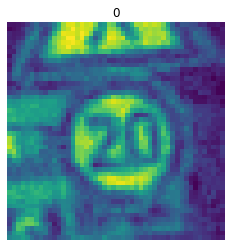

In [31]:
#see_x_image(numpy_raw_test_2[0],y_test[0])
see_x_image(numpy_raw_test_3[0],y_test[0])
#numpy_raw_test_3[0] ==numpy_raw_test[0]

In [300]:
save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/images_test_1.npy"
with open(save_dir, 'wb') as f:
    np.save(f, numpy_raw_test)

save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/labels_test_1.npy"
    
with open(save_dir, 'wb') as f:
    np.save(f, numpy_labels_test)

In [133]:
save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/images_fgsm_5000.npy"
with open(save_dir, 'wb') as f:
    np.save(f, numpy_raw)

save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/labels_fgsm_5000.npy"
    
with open(save_dir, 'wb') as f:
    np.save(f, numpy_labels)

In [29]:
def see_x_image(x,y):
    '''# (48,48,1) show image, y - (43,)
    '''
    plt.figure()
    
    plt.imshow((x.reshape((48,48))*255).astype("uint8"))
    plt.title(str(np.argmax(y)))
    plt.axis("off")


In [92]:
labels_to_adv
labels_to_adv_onehot =np_utils.to_categorical(labels_to_adv, 43)

In [301]:
labels_test_to_adv_oneshot = np_utils.to_categorical(labels_test_to_adv, 43)

In [35]:
labels_test_to_adv_oneshot3 = np_utils.to_categorical(labels_test_to_adv3, 43)

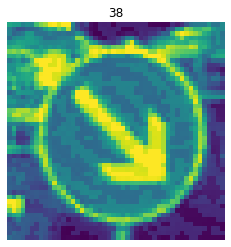

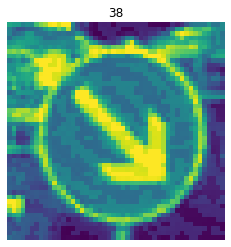

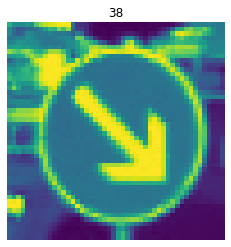

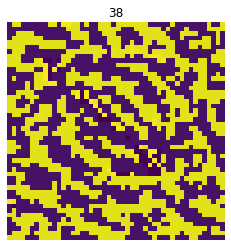

In [115]:
from keras import backend as K

numpy_raw = K.eval(raw)
numpy_x_test=K.eval(x_train)
numpy_clipped = K.eval(clipped)
see_x_image(numpy_raw[1],labels_to_adv_onehot[1])
see_x_image(numpy_clipped[1],labels_to_adv_onehot[1])

see_x_image(numpy_x_test[29160],y_train[29160])
see_x_image(numpy_x_test[29160]-numpy_raw[1],y_train[29160])

In [99]:
predictions = model_1.predict(raw)

In [105]:
predictions
for i in range(5):
    print(np.argmax(predictions[i]))

4
38
1
40
2


In [135]:
# Adding original + fgsm adv images
type(x_train)

numpy.ndarray

In [141]:
images_to_adv

<tf.Tensor: shape=(5000, 48, 48, 1), dtype=float32, numpy=
array([[[[0.23529412],
         [0.21960784],
         [0.23529412],
         ...,
         [0.12941177],
         [0.12156863],
         [0.12156863]],

        [[0.2509804 ],
         [0.2627451 ],
         [0.2784314 ],
         ...,
         [0.12941177],
         [0.11764706],
         [0.11764706]],

        [[0.2901961 ],
         [0.3137255 ],
         [0.32156864],
         ...,
         [0.13333334],
         [0.11764706],
         [0.10980392]],

        ...,

        [[0.24705882],
         [0.24705882],
         [0.23921569],
         ...,
         [0.09411765],
         [0.10196079],
         [0.11764706]],

        [[0.25490198],
         [0.2509804 ],
         [0.23921569],
         ...,
         [0.09411765],
         [0.10196079],
         [0.11764706]],

        [[0.25882354],
         [0.25490198],
         [0.23921569],
         ...,
         [0.09803922],
         [0.10196079],
         [0.11764706]]],


 

In [144]:
print(type(x_train))
print(type(numpy_raw))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [146]:
labels_to_adv_onehot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [147]:
print(x_train.shape)
print(numpy_raw.shape)
x_train_and_adversary = np.concatenate((x_train,numpy_raw),axis=0)
print(x_train_and_adversary.shape)

print(y_train.shape)
print(labels_to_adv_onehot.shape)
y_train_and_adversary= np.concatenate((y_train,labels_to_adv_onehot),axis=0)
print(y_train_and_adversary.shape)


(31366, 48, 48, 1)
(5000, 48, 48, 1)
(36366, 48, 48, 1)
(31366, 43)
(5000, 43)
(36366, 43)


In [303]:
print(x_test.shape)
print(numpy_raw_test.shape)
x_test_and_adversary = np.concatenate((x_test,numpy_raw_test),axis=0)
print(x_test_and_adversary.shape)

print(y_test.shape)
print(labels_test_to_adv_oneshot.shape)
y_test_and_adversary= np.concatenate((y_test,labels_test_to_adv_oneshot),axis=0)
print(y_test_and_adversary.shape)


(3923, 48, 48, 1)
(3923, 48, 48, 1)
(7846, 48, 48, 1)
(3923, 43)
(3923, 43)
(7846, 43)


In [36]:
print(x_test.shape)
print(numpy_raw_test_3.shape)
x_test_and_adversary_jsma = np.concatenate((x_test,numpy_raw_test_3),axis=0)
print(x_test_and_adversary_jsma.shape)

print(y_test.shape)
print(labels_test_to_adv_oneshot3.shape)
y_test_and_adversary_jsma= np.concatenate((y_test,labels_test_to_adv_oneshot3),axis=0)
print(y_test_and_adversary_jsma.shape)


(3923, 48, 48, 1)
(3923, 48, 48, 1)
(7846, 48, 48, 1)
(3923, 43)
(3923, 43)
(7846, 43)


In [174]:
save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/train_and_images_fgsm_5000.npy"
with open(save_dir, 'wb') as f:
    np.save(f, x_train_and_adversary)

save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/train_and_labels_fgsm_5000.npy"
    
with open(save_dir, 'wb') as f:
    np.save(f, y_train_and_adversary)

In [ ]:
save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/test_and_images_fgsm.npy"
with open(save_dir, 'wb') as f:
    np.save(f, x_test_and_adversary)

save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/test_and_labels_fgsm.npy"
    
with open(save_dir, 'wb') as f:
    np.save(f, y_test_and_adversary)

In [37]:
save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/test_and_images_jsma.npy"
with open(save_dir, 'wb') as f:
    np.save(f, x_test_and_adversary_jsma)

save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/adv_examples/test_and_labels_jsma.npy"
    
with open(save_dir, 'wb') as f:
    np.save(f, y_test_and_adversary_jsma)